# CNN을 통해 Feature 분석을 위한 Candlestick Chart 생성
- 기존에 보유하고있던 Open, Close, High, Low 데이터를 Candlestick Chart를 만들어서 데이터에 반영

In [2]:
import mpl_finance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

## Data Read

In [8]:
nasdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nasdaq.csv', index_col=0, parse_dates=True)
snp = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/snp500.csv', index_col=0, parse_dates=True)
ftse = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/ftse.csv', index_col=0, parse_dates=True)
dax = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/dax.csv', index_col=0, parse_dates=True)
nikkei = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nikkei.csv', index_col=1, parse_dates=True)
hangseng = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/hang.csv', index_col=0, parse_dates=True)
sanghai = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/sanghai.csv', index_col=0, parse_dates=True)
vix = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/vix.csv', index_col=0, parse_dates=True)
kospi = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kospi.csv', index_col=0, parse_dates=True)
kosdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kosdaq.csv', index_col=0, parse_dates=True)

In [9]:
nasdaq.sort_index(inplace=True)
snp.sort_index(inplace=True)
ftse.sort_index(inplace=True)
dax.sort_index(inplace=True)
nikkei.sort_index(inplace=True)
hangseng.sort_index(inplace=True)
sanghai.sort_index(inplace=True)
vix.sort_index(inplace=True)
kospi.sort_index(inplace=True)
kosdaq.sort_index(inplace=True)

In [10]:
nasdaq['Close'] = nasdaq.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Close'] = dax.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Close'] = nikkei['종가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Close'] = hangseng.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Open'] = nasdaq.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Open'] = dax.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Open'] = nikkei['오픈'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Open'] = hangseng.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['High'] = nasdaq.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['High'] = dax.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['High'] = nikkei['고가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['High'] = hangseng.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Low'] = nasdaq.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Low'] = dax.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Low'] = nikkei['저가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Low'] = hangseng.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))

In [12]:
df_list = [nasdaq, snp, ftse, dax, nikkei, hangseng, sanghai]

## 캔들차트 만들기

In [13]:
open_list = []
close_list = []
high_list = []
low_list = []

for stock in df_list :
    open_list.append(stock['Open'])
    close_list.append(stock['Close'])
    high_list.append(stock['High'])
    low_list.append(stock['Low'])

In [14]:
open_df = pd.concat(open_list, axis=1, join='outer')
close_df = pd.concat(close_list, axis=1, join='outer')
high_df = pd.concat(high_list, axis=1, join='outer')
low_df = pd.concat(low_list, axis=1, join='outer')

In [15]:
col_name = ['NASDAQ', 'S&P500', 'FTSE', 'DAX', 'NIKKEI', 'HANGSENG', 'SANGHAI']
open_df.columns = col_name
close_df.columns = col_name
high_df.columns = col_name
low_df.columns = col_name

In [16]:
open_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0), open_df, how='outer', left_index=True, right_index=True)
close_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0), close_df, how='outer', left_index=True, right_index=True)
high_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0), high_df, how='outer', left_index=True, right_index=True)
low_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0), low_df, how='outer', left_index=True, right_index=True)

In [17]:
open_df.ffill(inplace=True)
close_df.ffill(inplace=True)
high_df.ffill(inplace=True)
low_df.ffill(inplace=True)

In [18]:
kospi['KOSPI_v'] = (kospi.Open - kospi.Close.shift(1)) / kospi.Close.shift(1)
kospi['KOSPI_u'] = (kospi.Close - kospi.Open) / kospi.Open

In [19]:
kospi = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0), kospi, how='outer', left_index=True, right_index=True)

In [20]:
kospi = kospi.loc['2001-01-05':]

In [21]:
holiday_index = kospi.Close[kospi.Close.isnull()].index

In [22]:
from datetime import timedelta

In [23]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = holiday_index[0]

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [24]:
one_day = timedelta(days=1)

In [25]:
open_df.loc[holiday_list[0][0] - one_day : holiday_list[0][1]]

NASDAQ   S&P500    FTSE      DAX    NIKKEI  HANGSENG  SANGHAI
2001-01-05  2573.1  1333.34  6185.6  6383.33  13763.22  15354.16  2117.66
2001-01-06  2573.1  1333.34  6185.6  6383.33  13763.22  15354.16  2117.66
2001-01-07  2573.1  1333.34  6185.6  6383.33  13763.22  15354.16  2117.66

/var/folders/fy/f7hm_xxs1bb1k3q0vxk7zc_w0000gn/T/ipykernel_3734/3441950745.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,5))


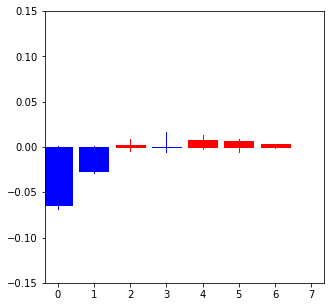

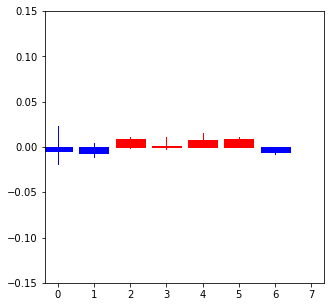

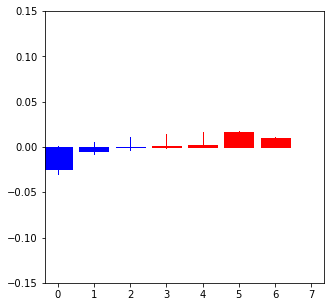

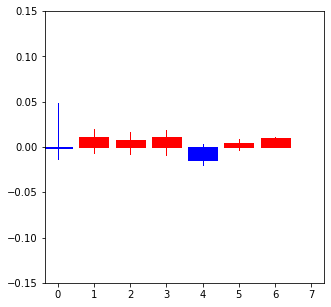

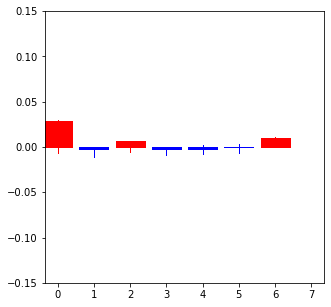

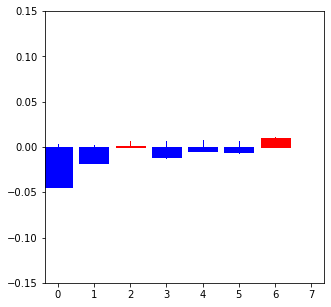

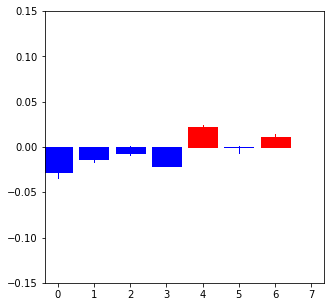

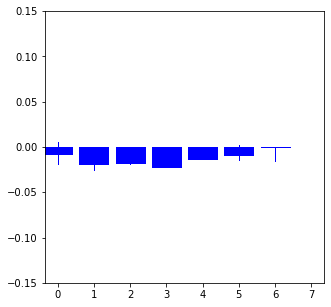

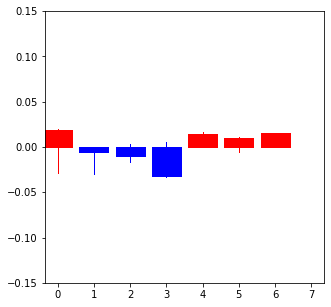

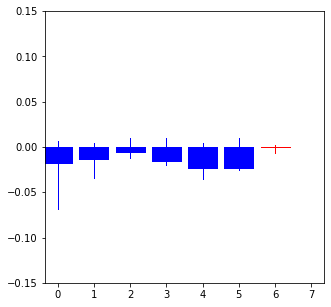

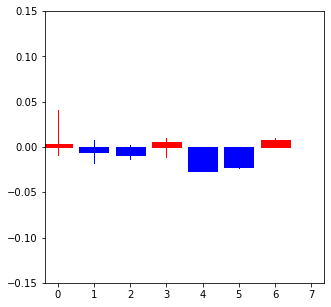

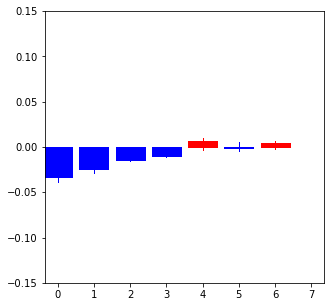

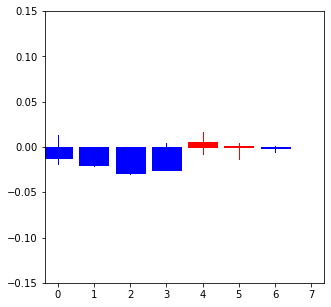

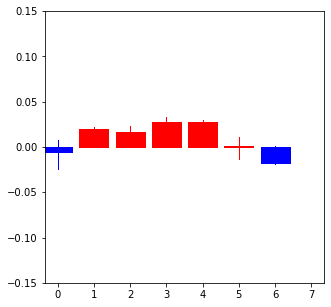

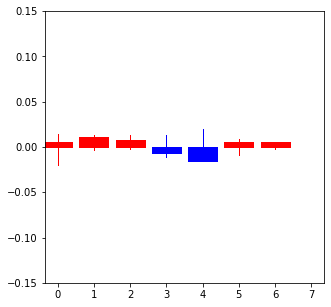

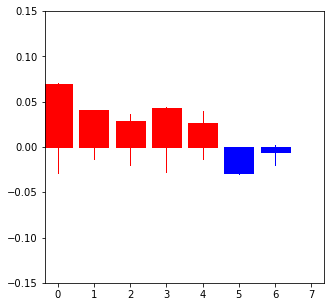

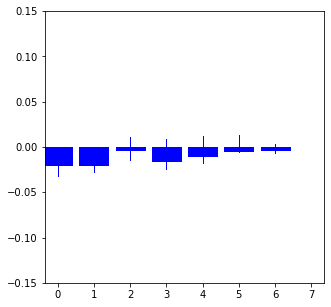

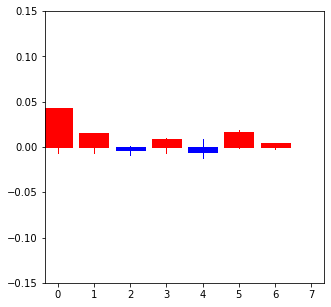

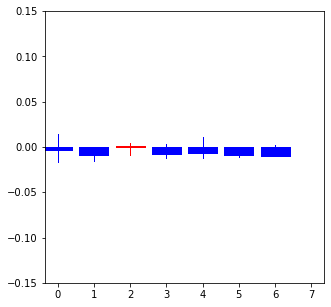

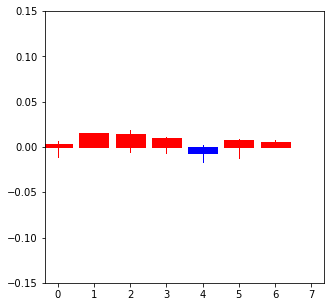

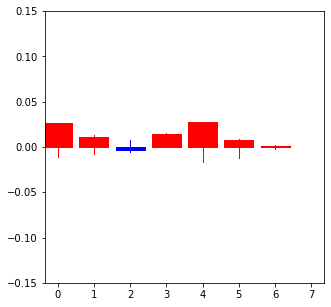

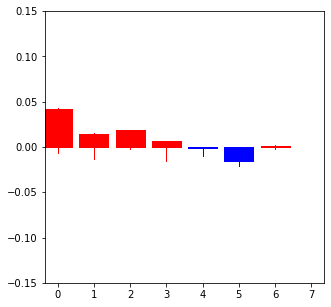

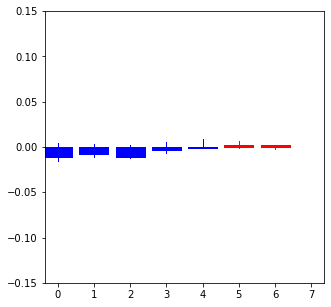

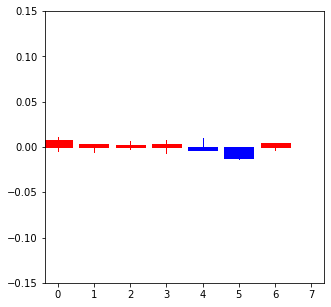

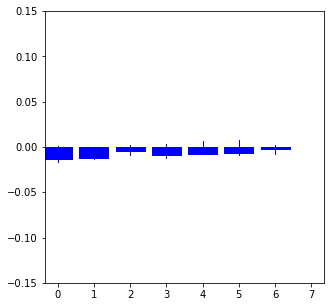

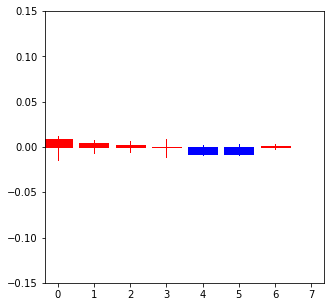

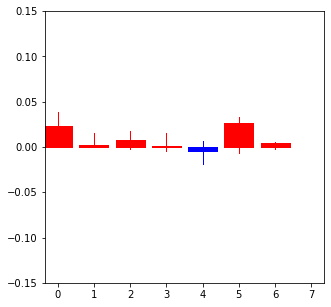

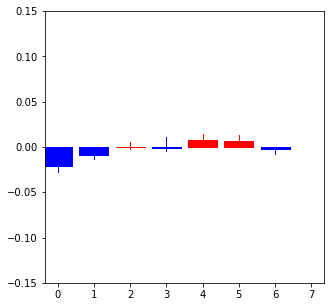

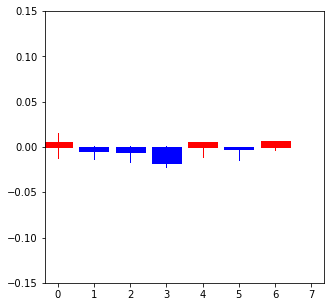

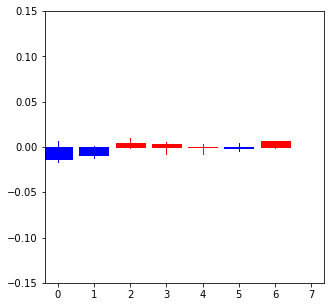

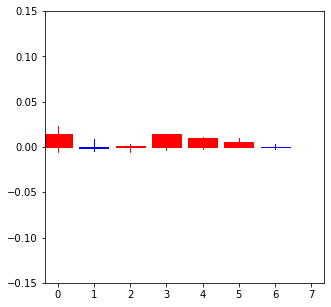

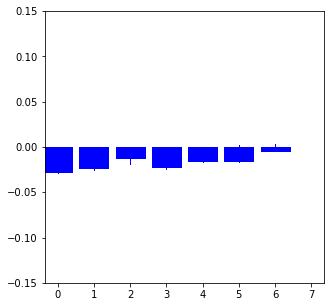

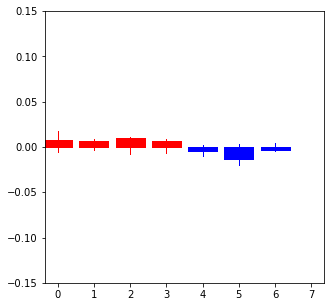

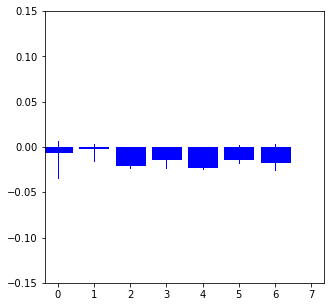

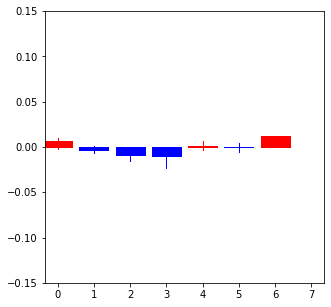

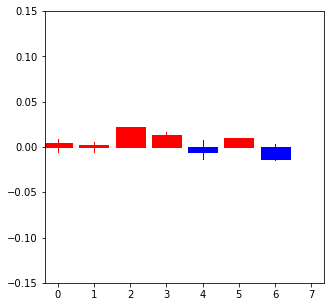

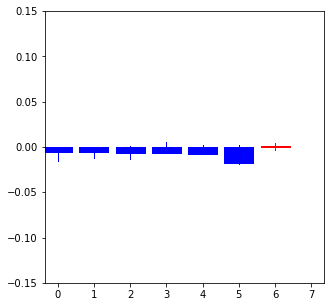

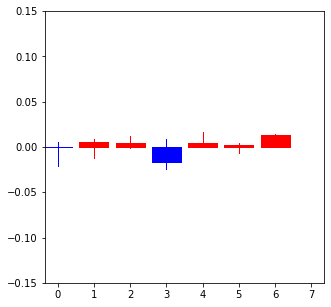

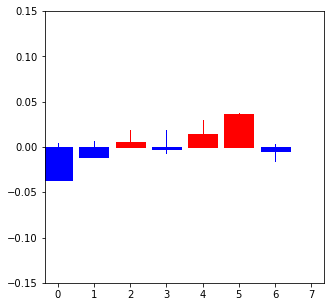

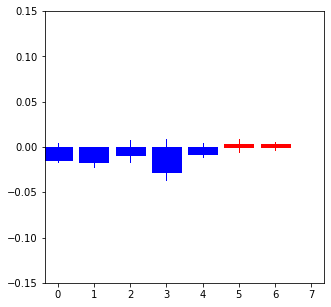

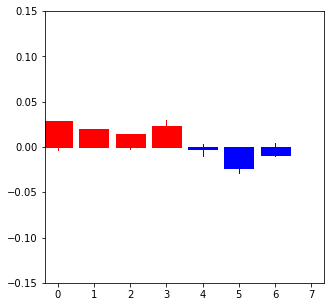

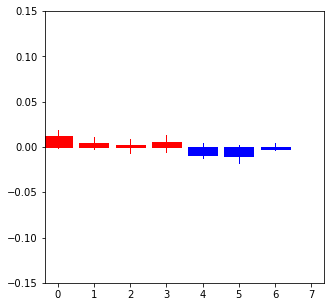

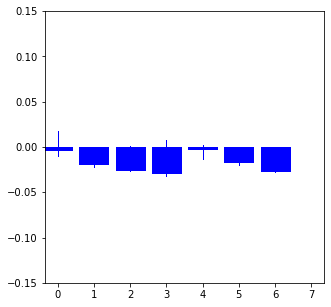

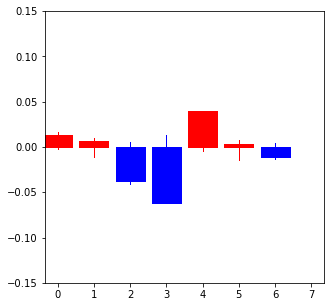

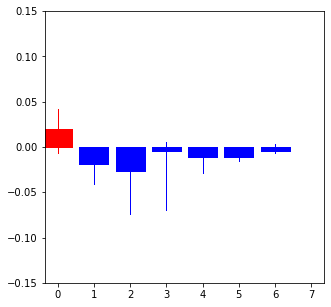

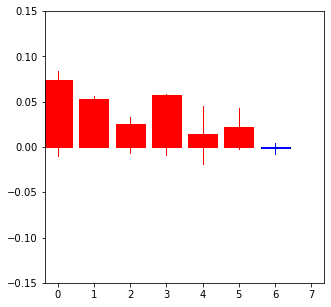

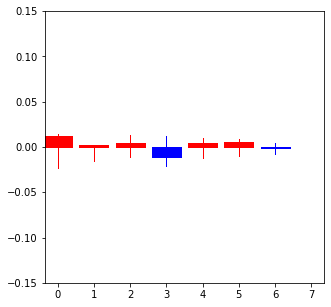

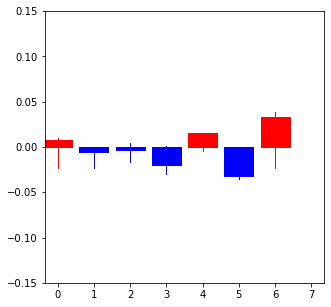

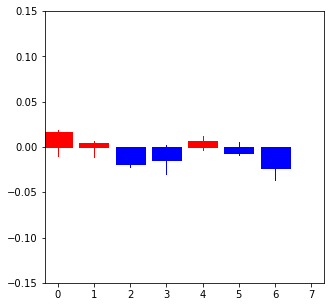

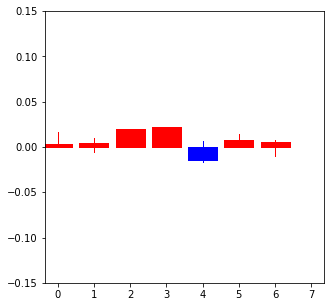

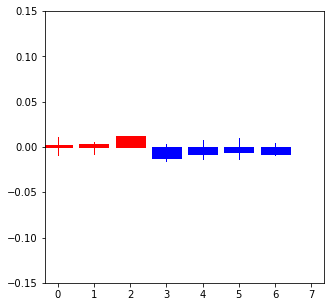

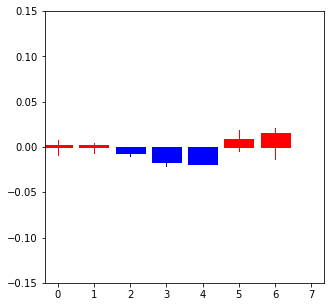

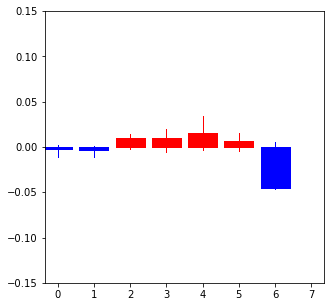

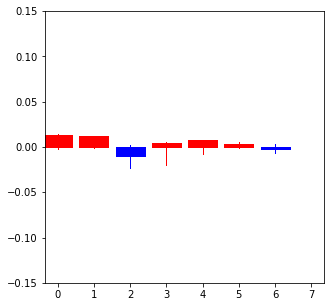

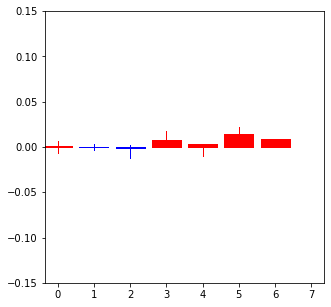

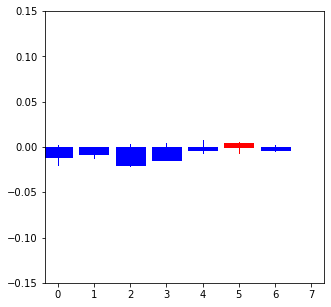

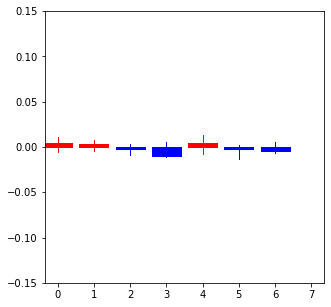

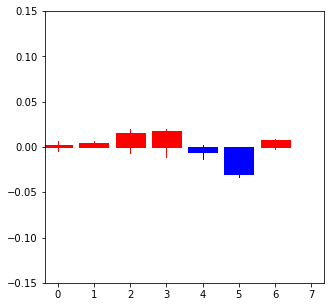

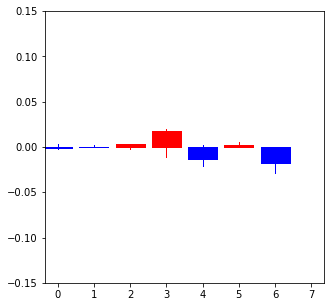

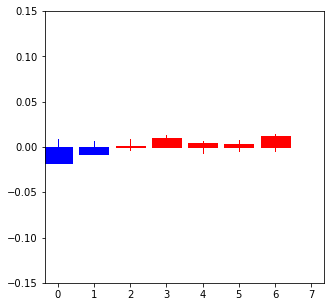

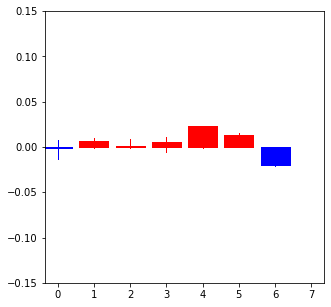

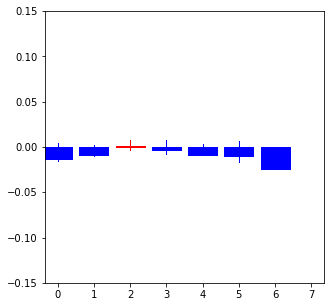

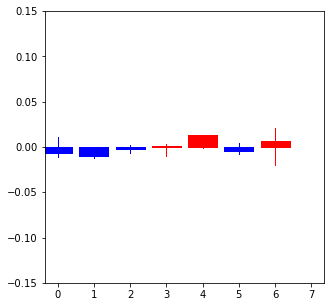

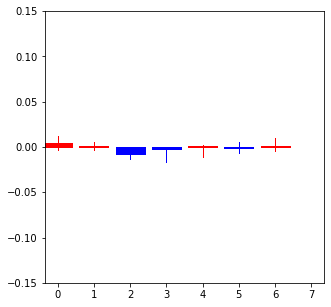

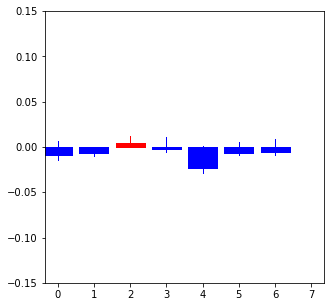

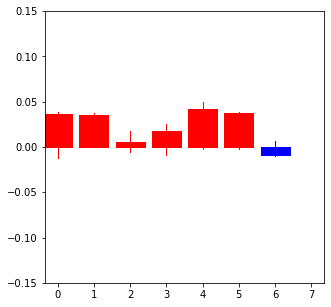

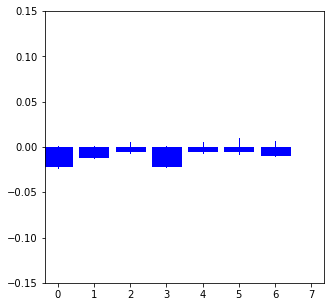

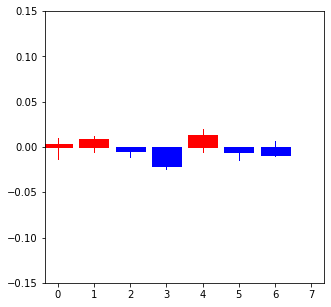

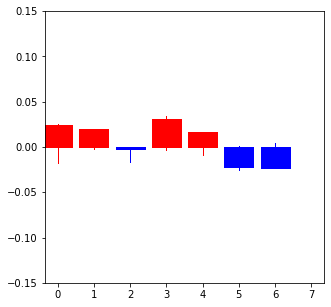

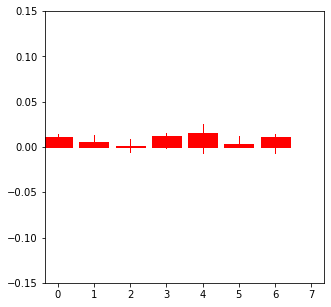

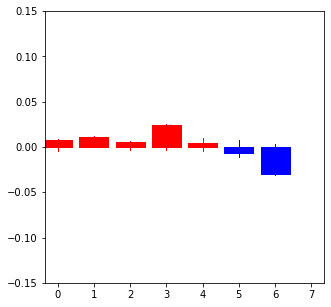

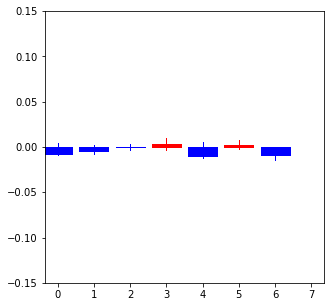

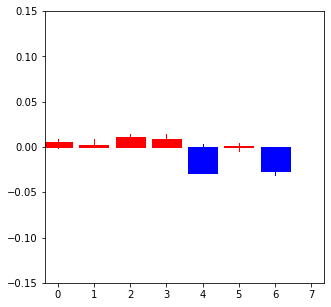

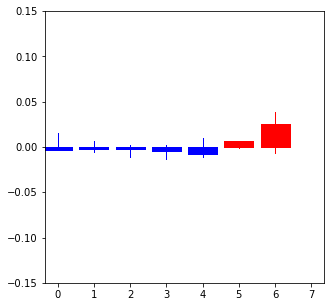

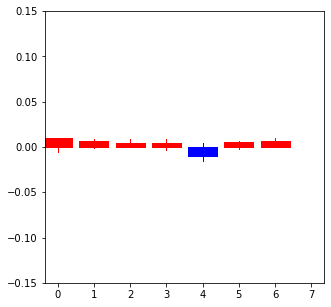

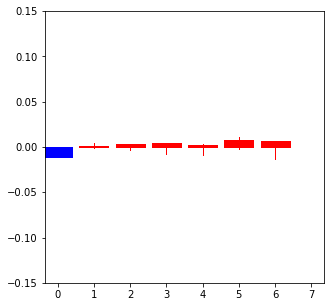

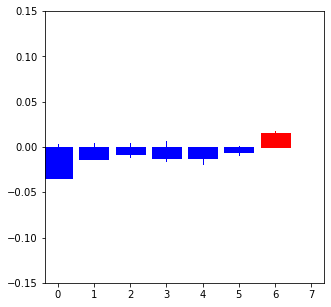

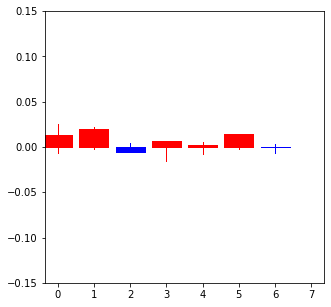

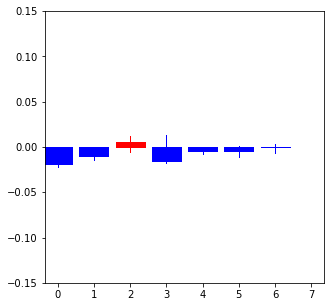

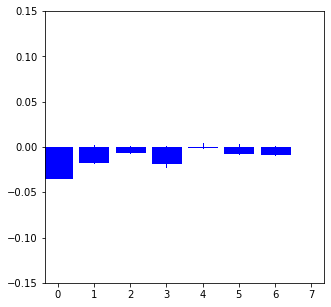

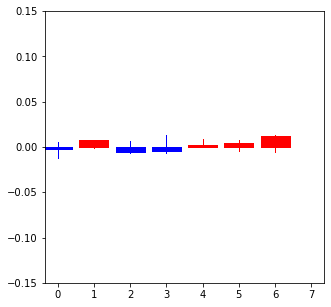

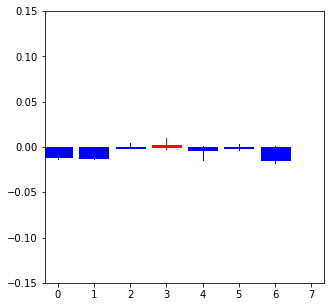

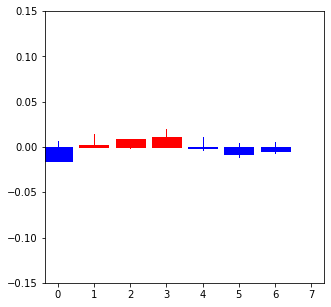

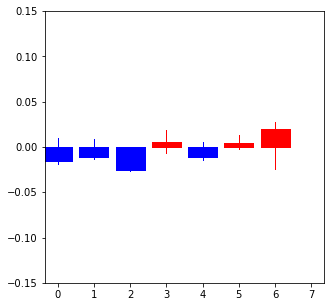

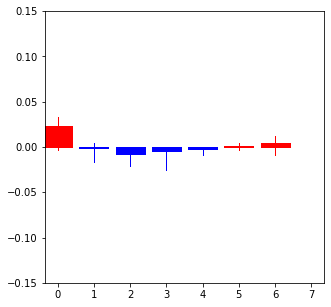

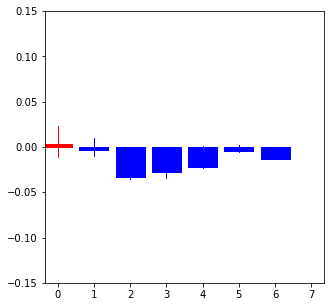

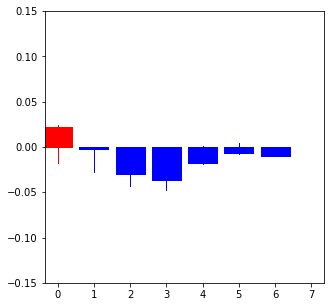

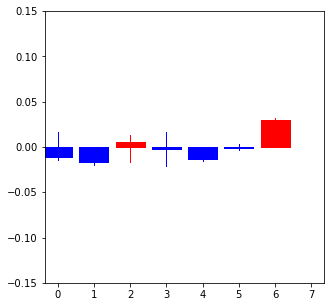

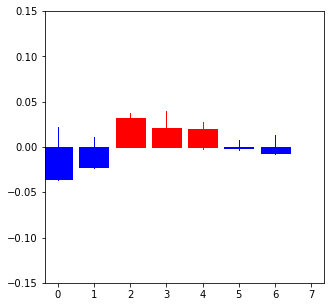

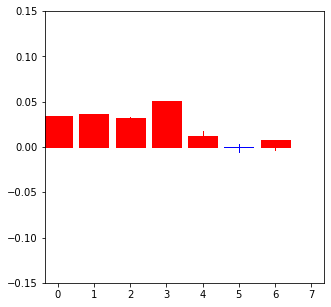

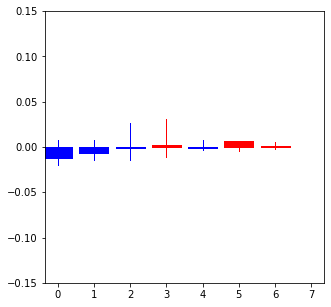

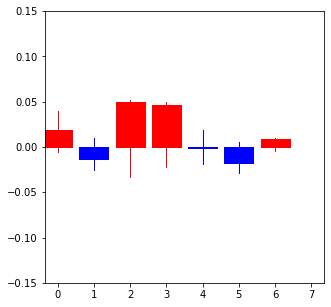

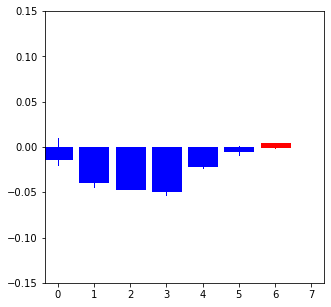

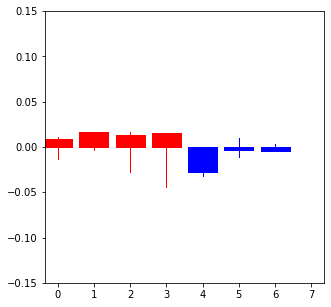

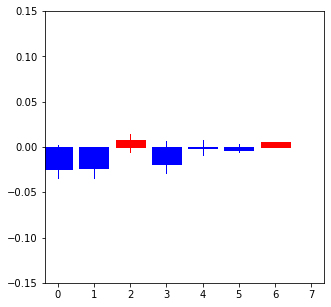

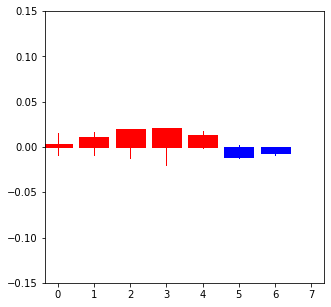

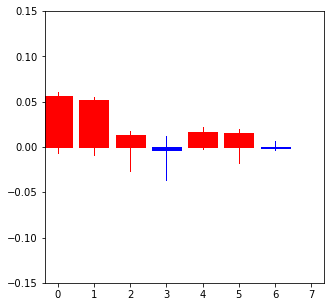

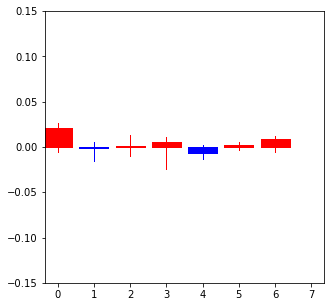

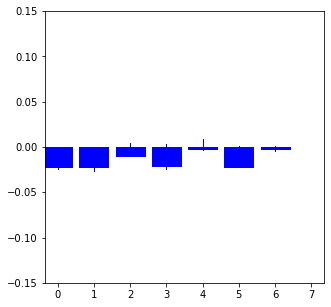

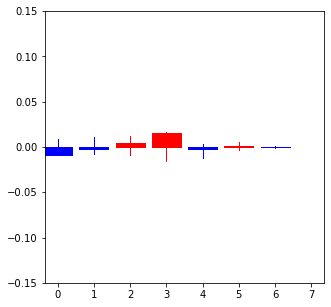

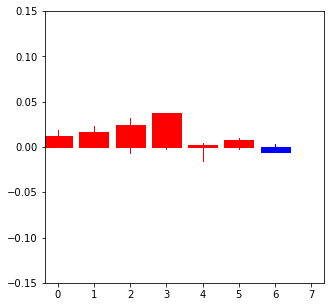

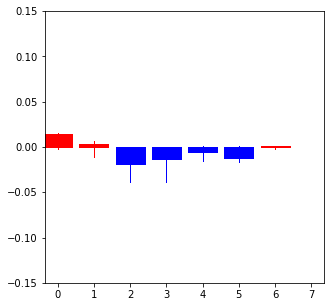

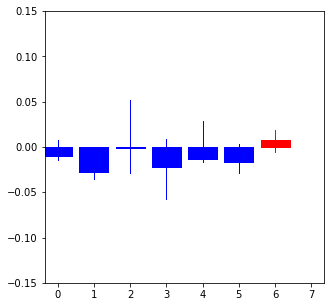

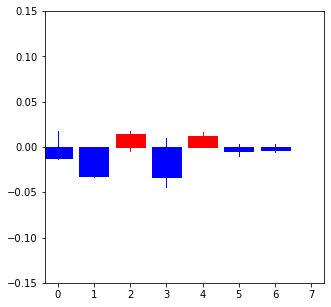

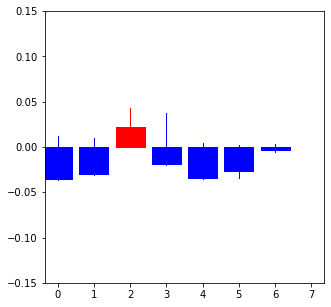

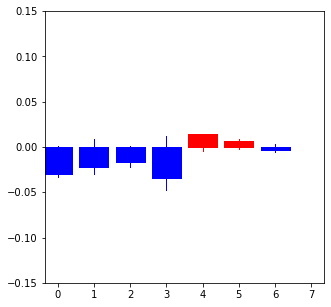

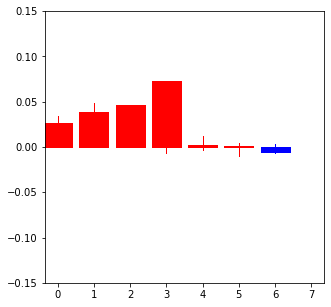

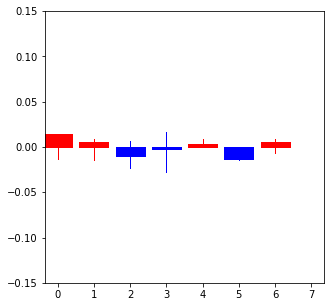

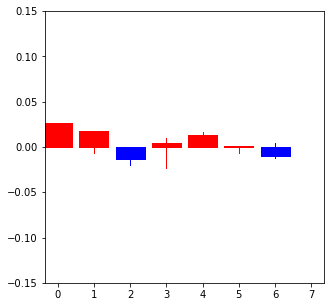

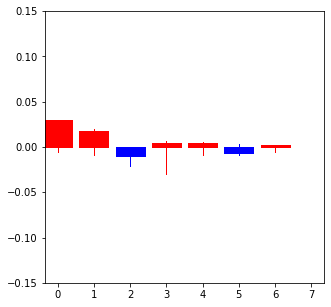

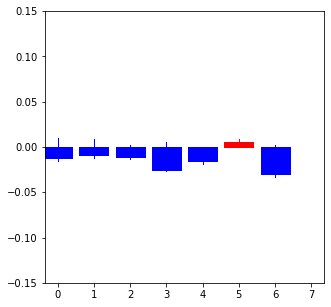

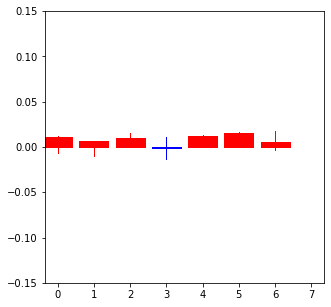

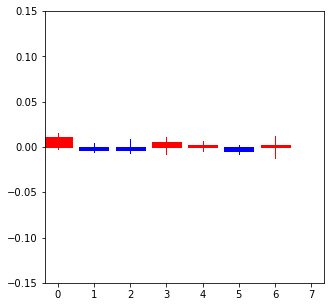

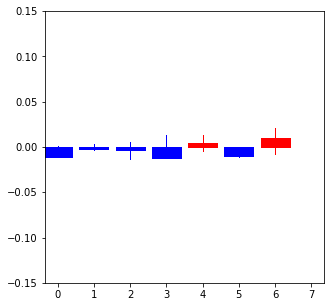

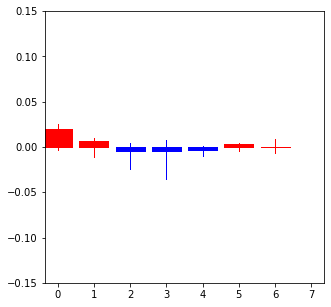

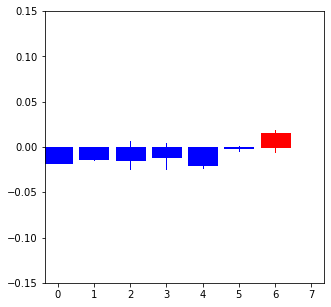

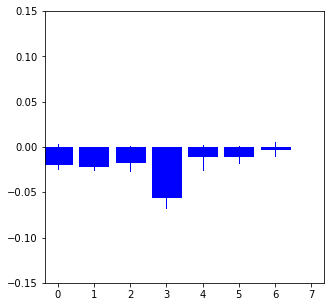

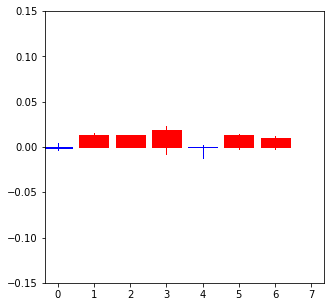

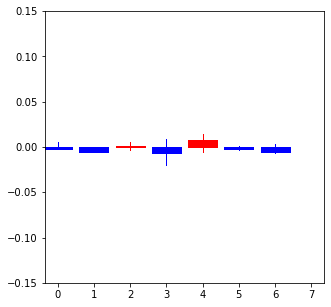

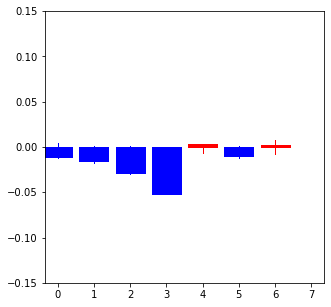

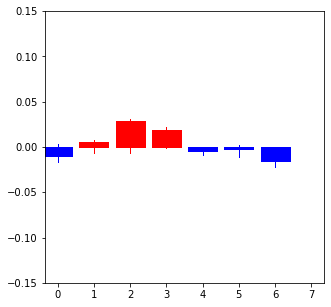

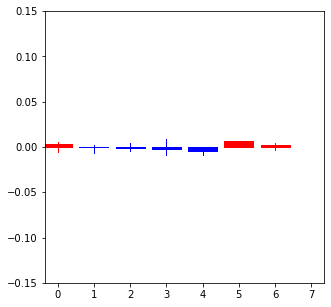

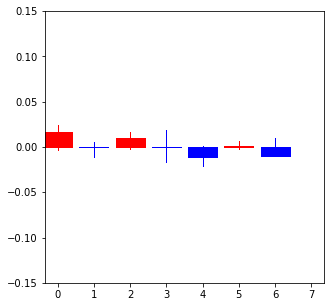

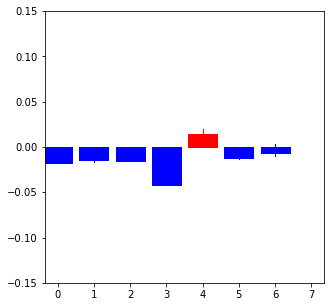

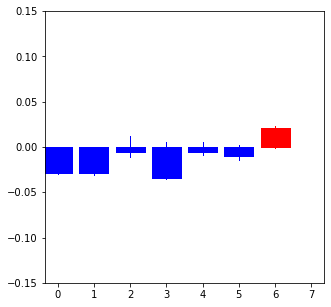

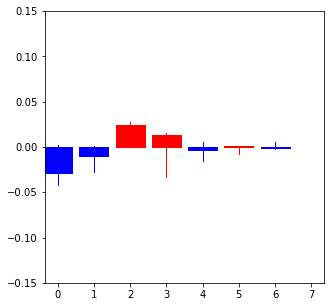

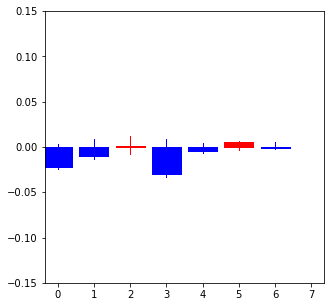

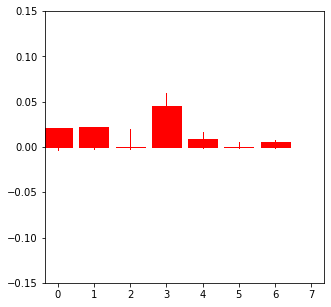

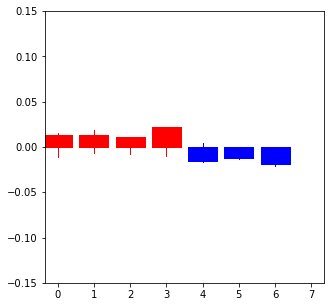

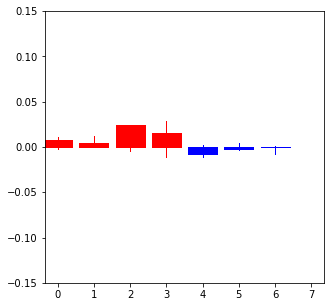

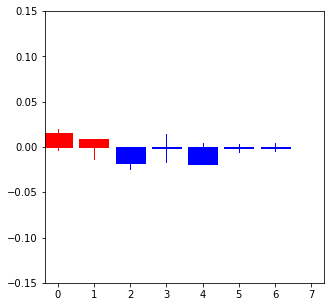

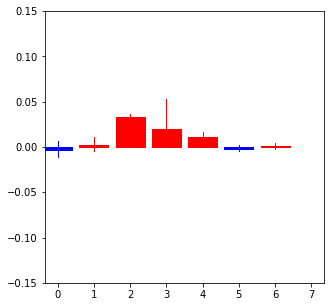

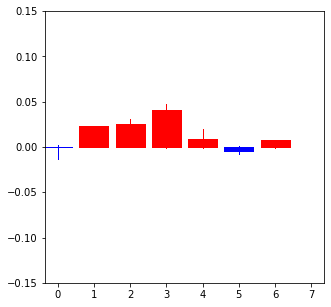

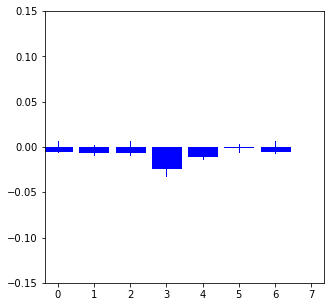

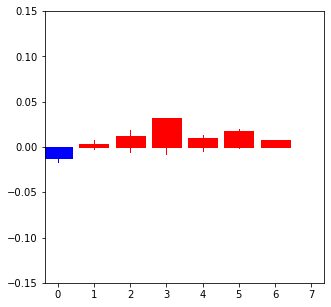

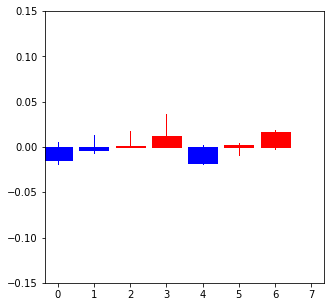

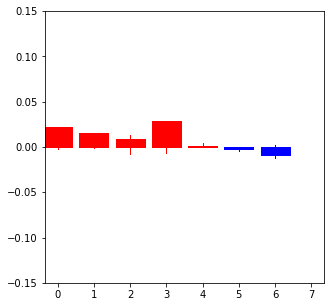

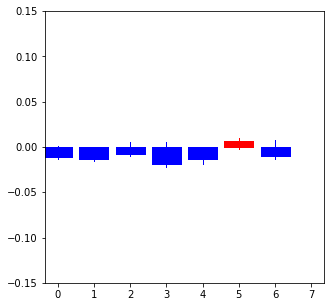

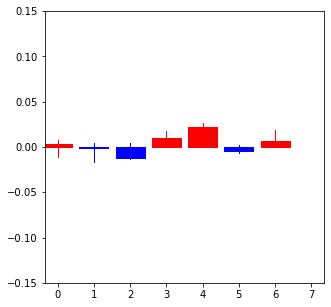

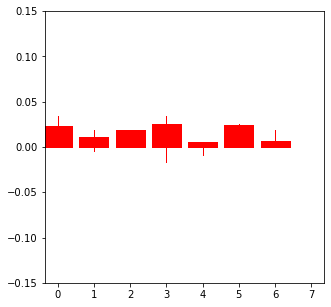

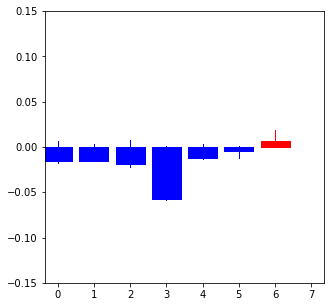

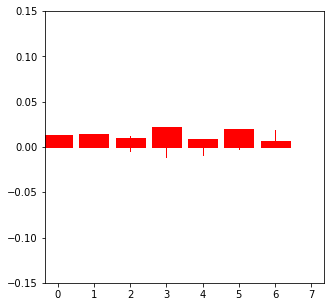

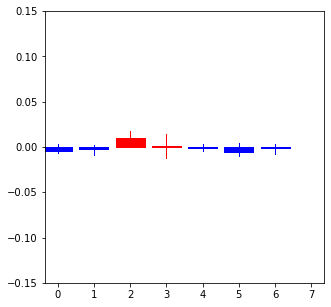

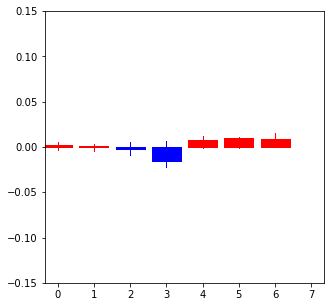

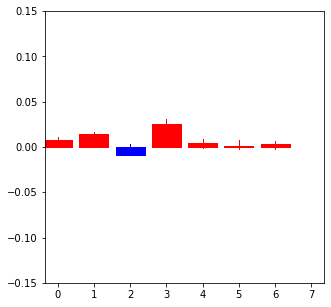

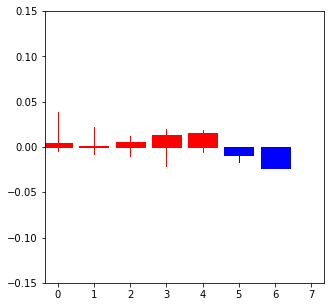

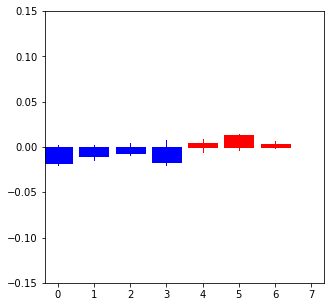

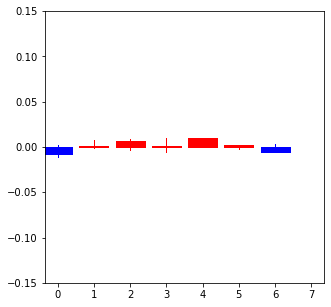

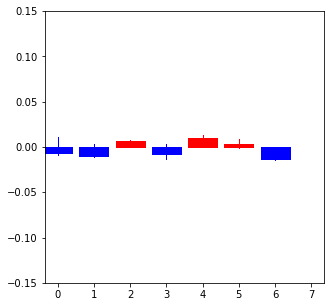

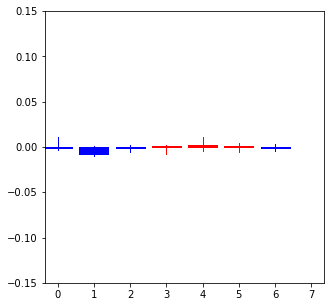

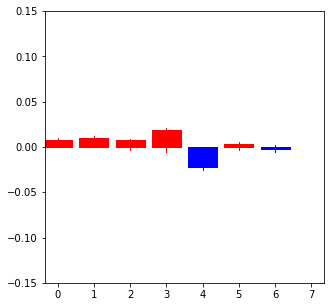

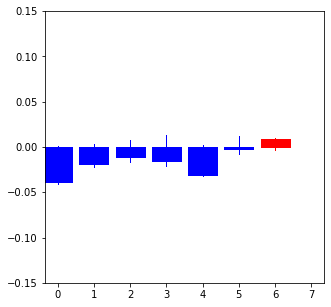

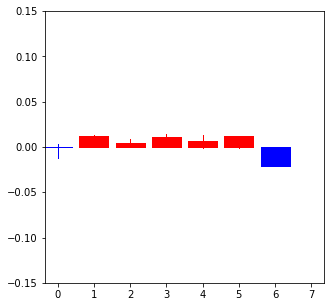

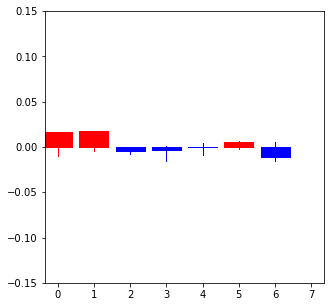

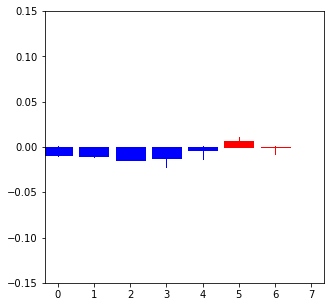

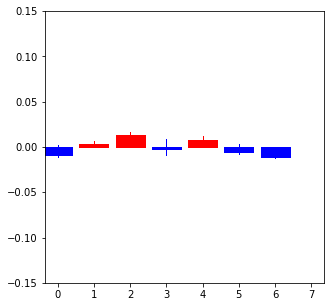

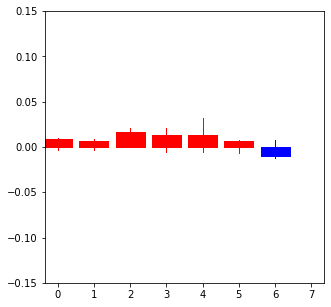

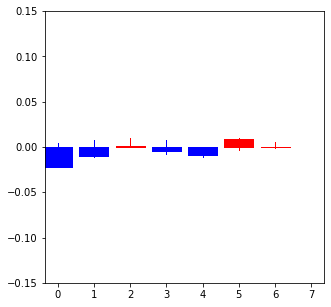

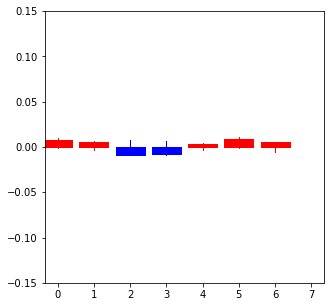

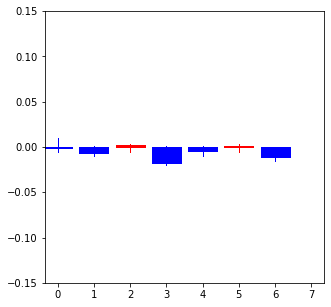

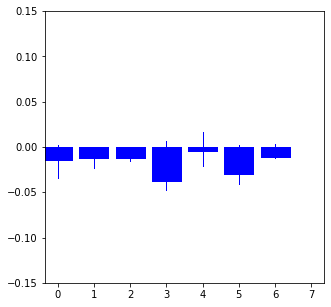

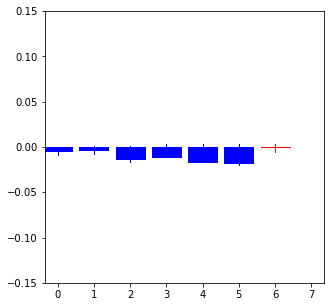

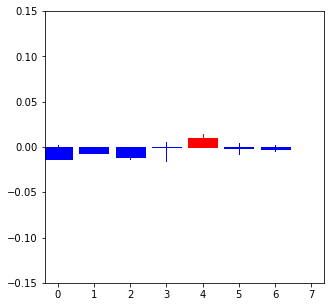

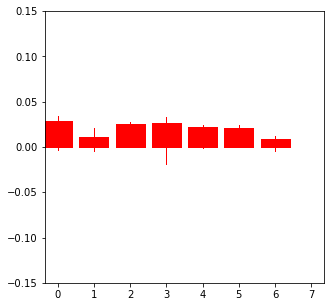

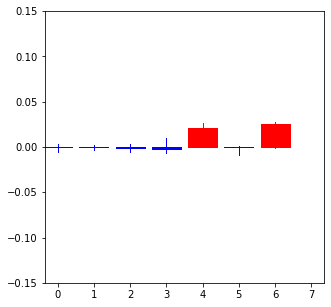

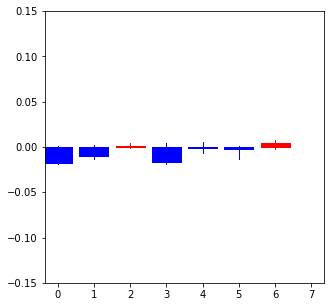

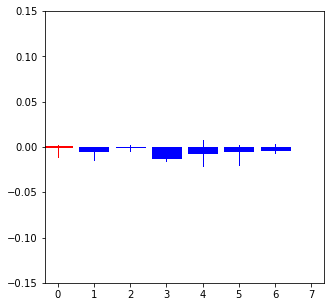

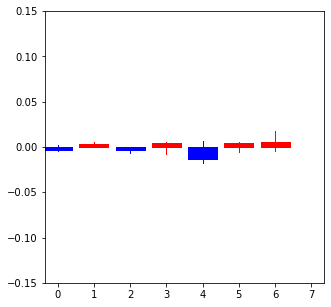

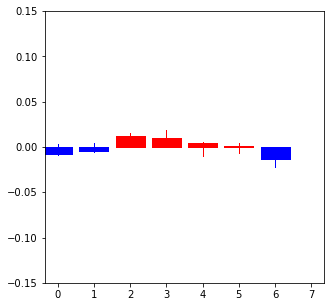

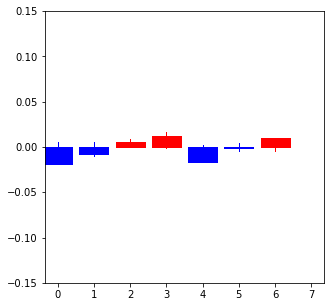

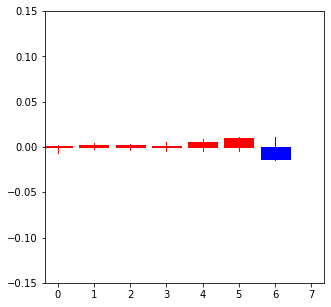

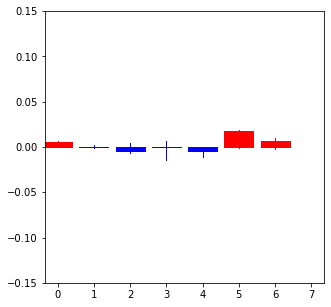

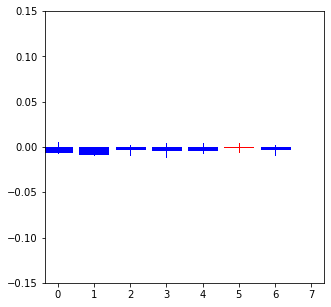

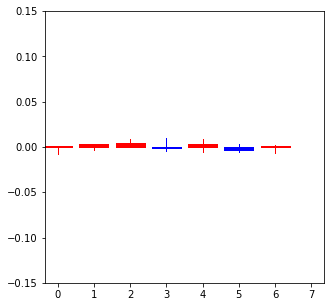

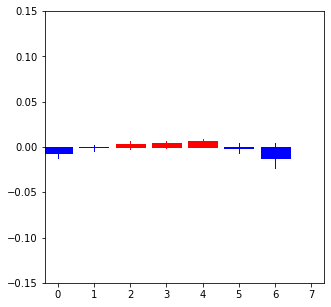

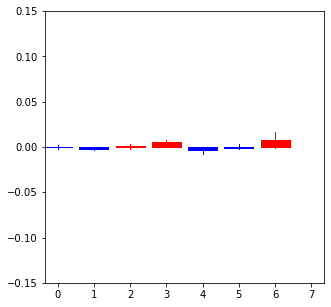

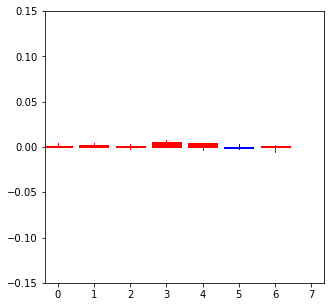

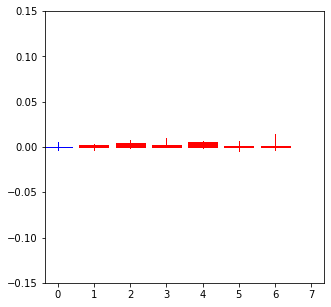

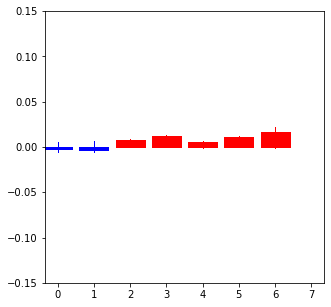

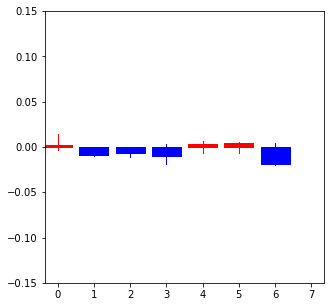

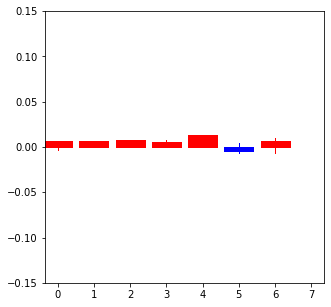

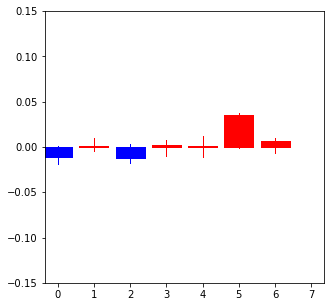

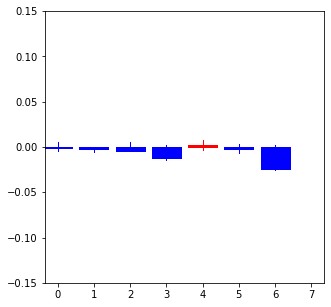

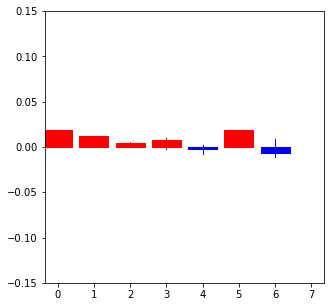

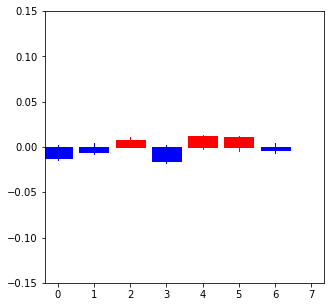

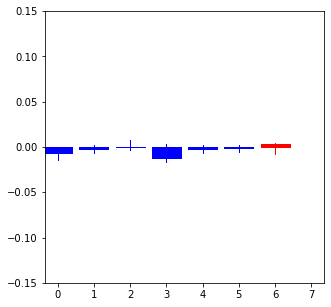

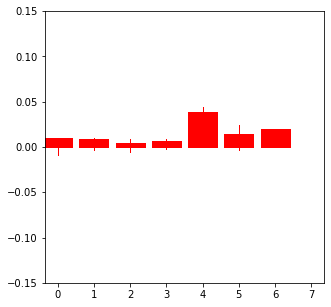

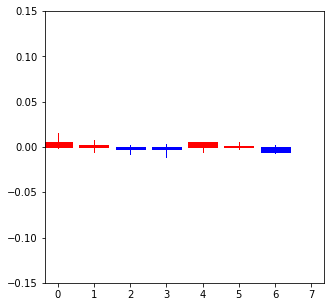

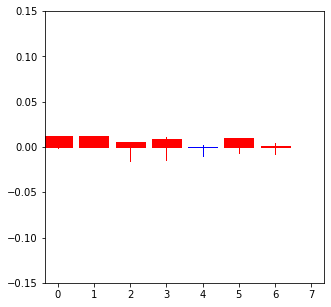

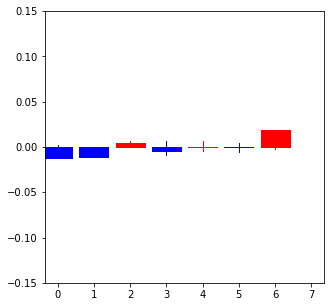

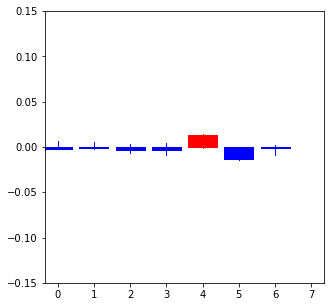

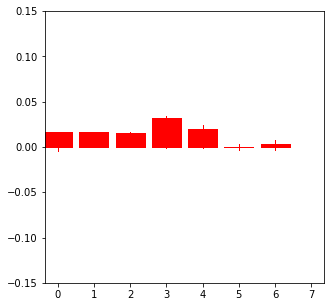

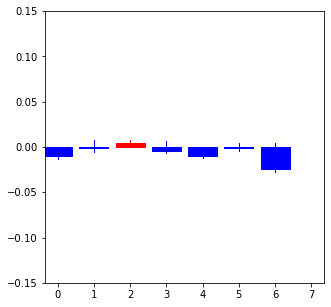

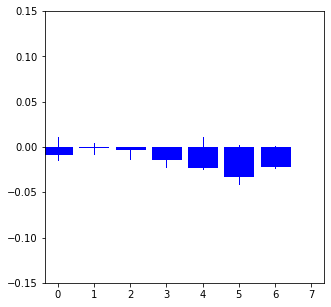

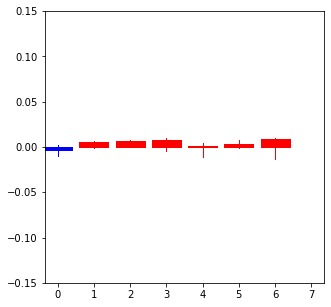

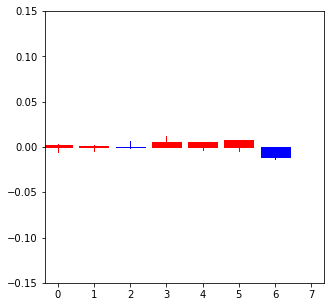

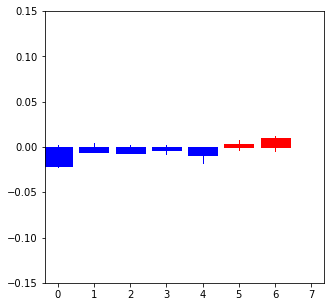

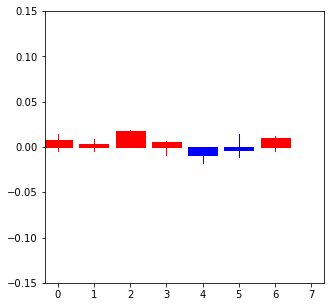

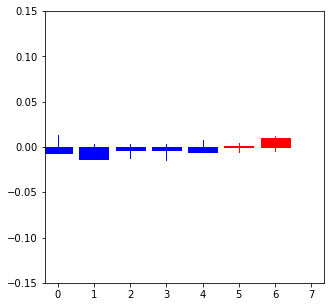

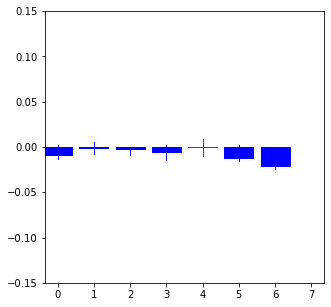

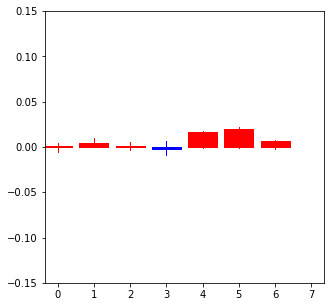

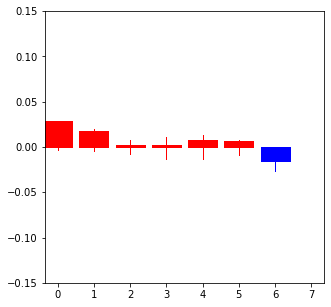

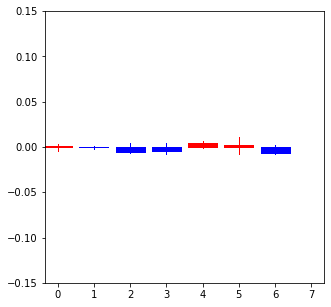

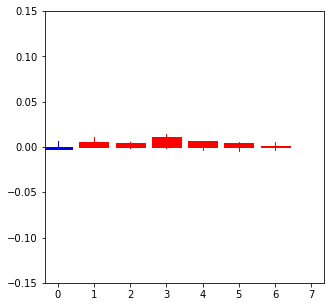

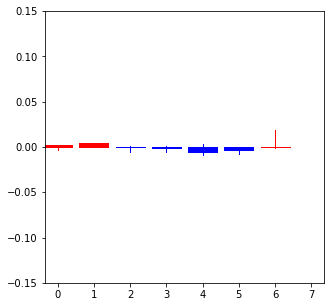

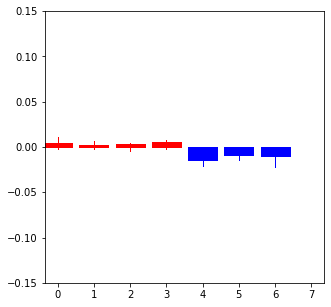

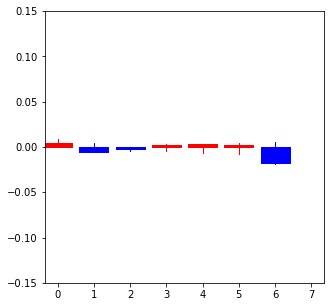

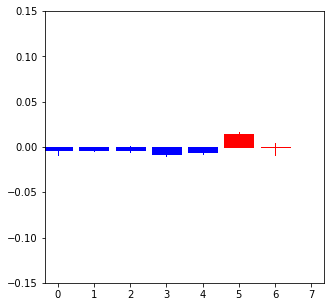

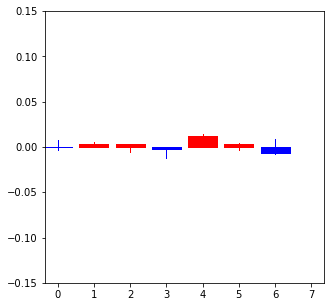

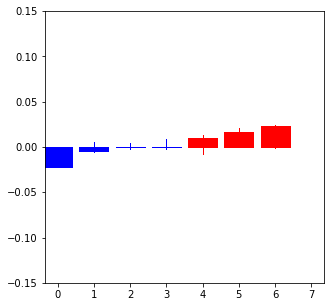

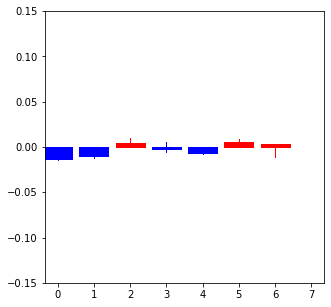

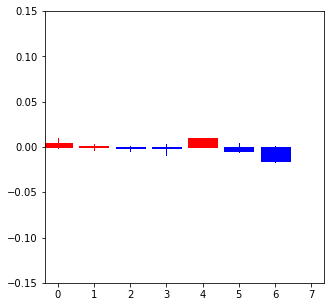

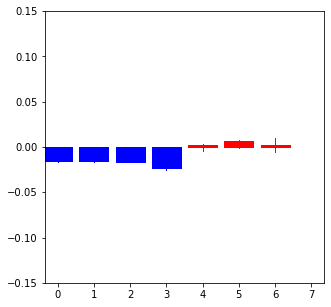

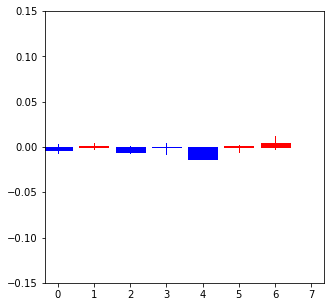

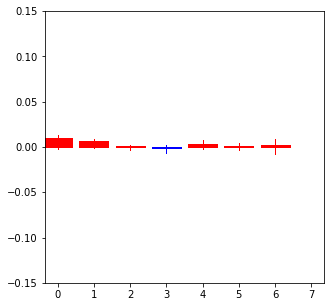

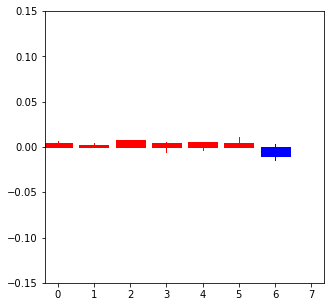

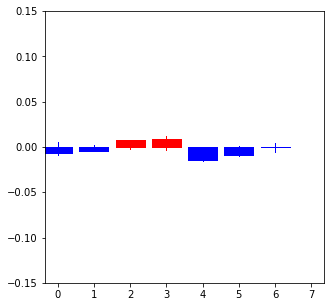

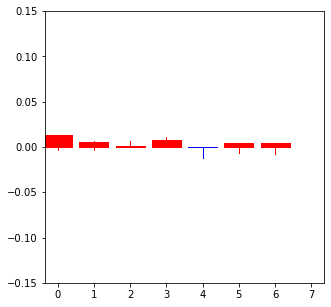

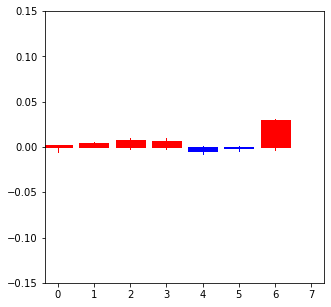

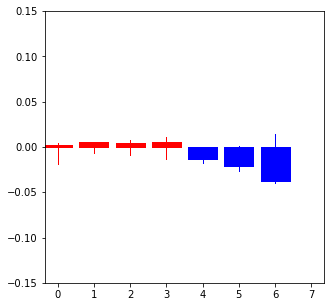

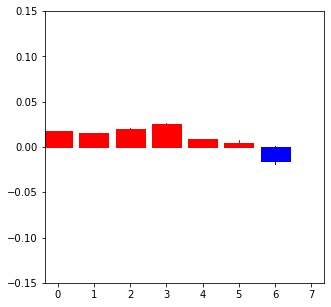

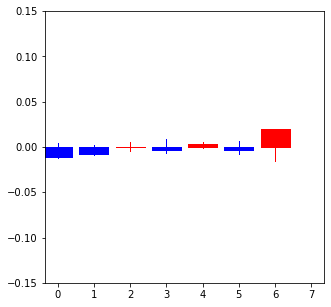

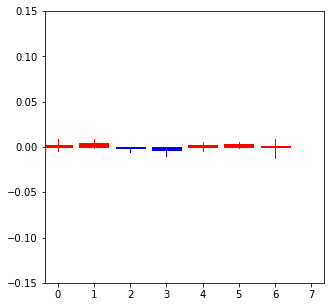

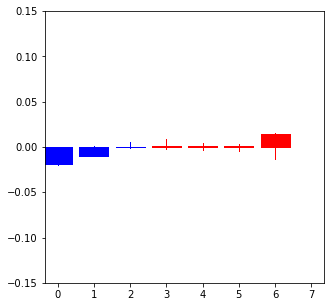

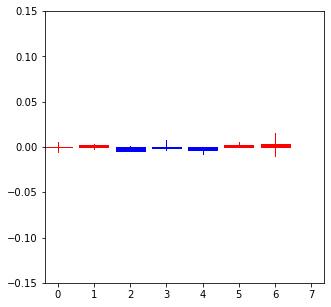

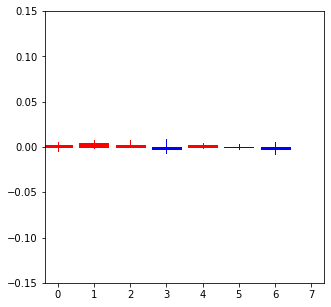

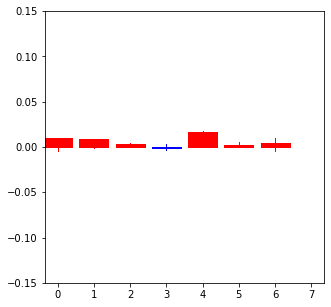

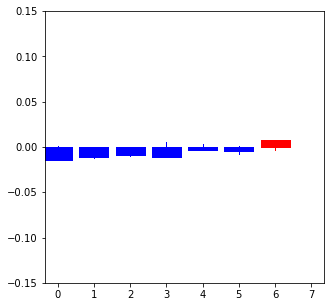

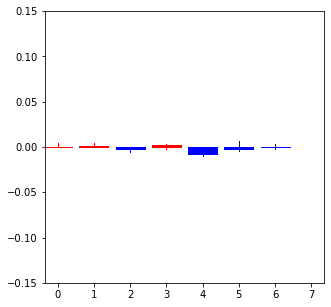

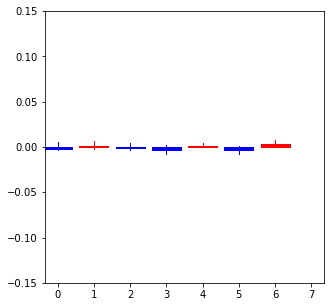

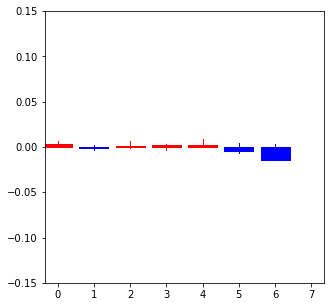

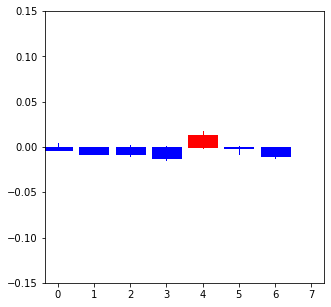

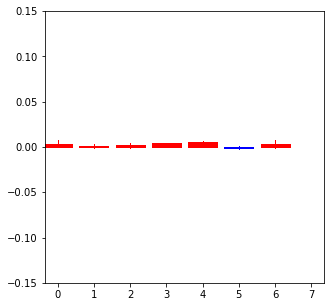

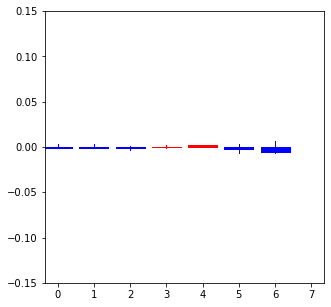

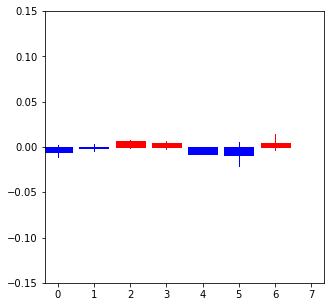

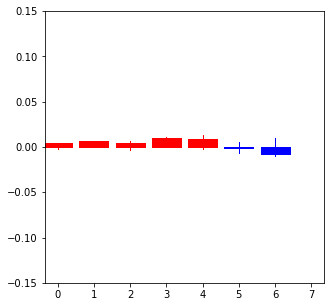

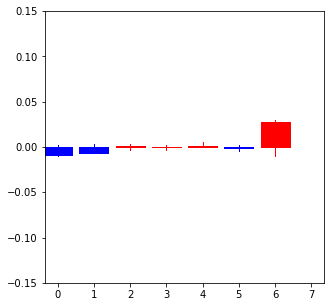

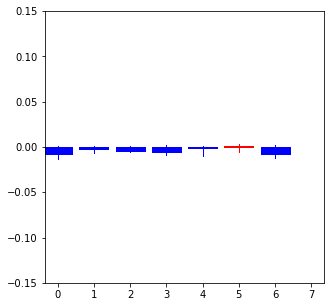

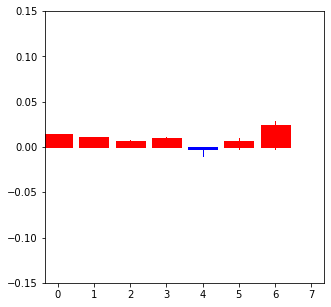

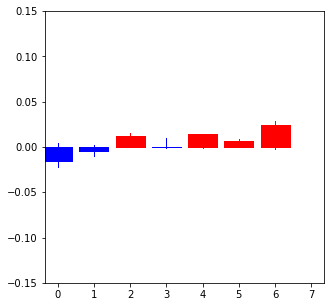

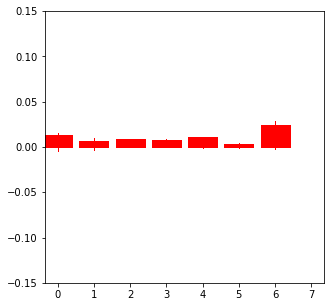

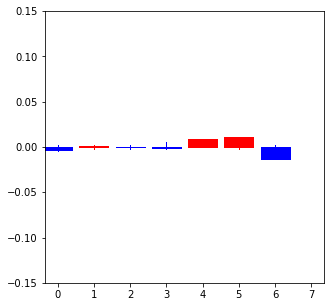

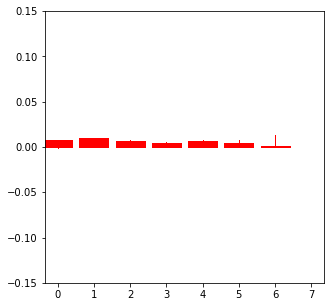

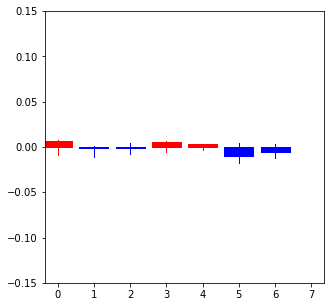

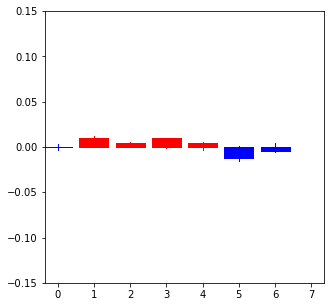

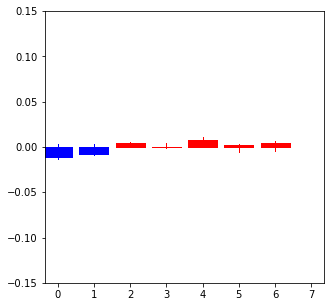

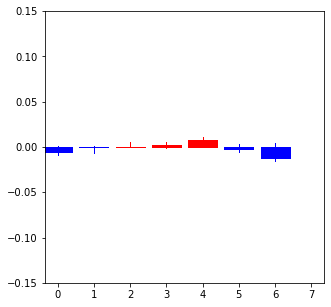

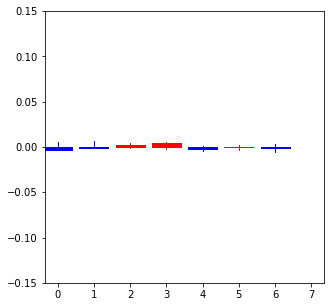

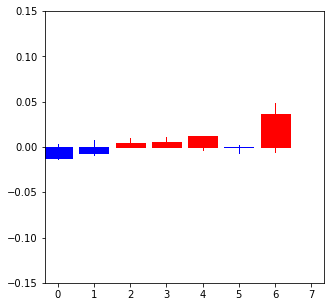

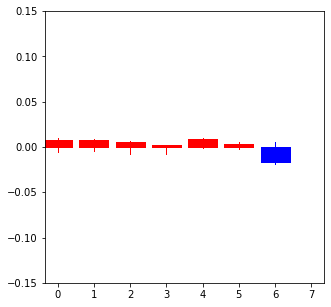

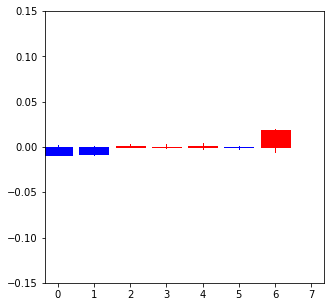

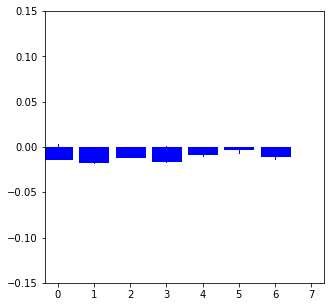

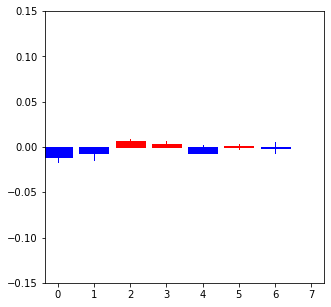

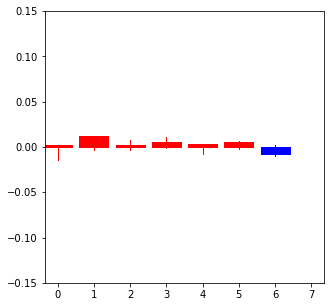

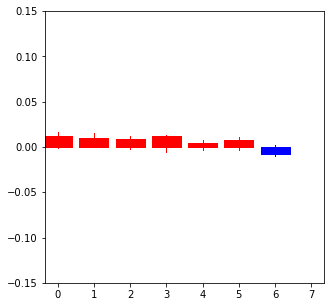

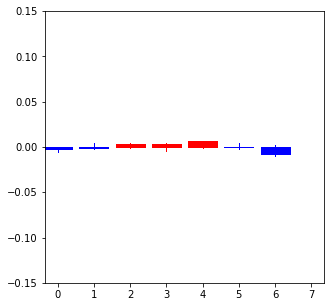

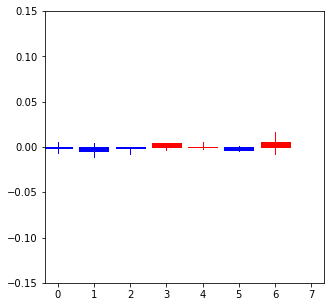

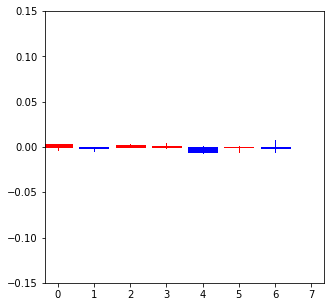

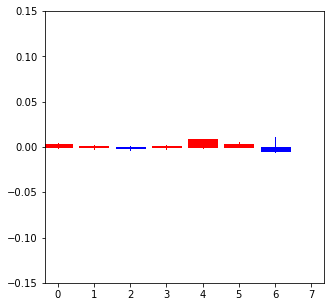

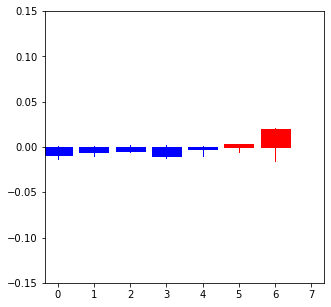

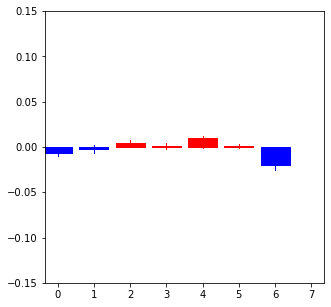

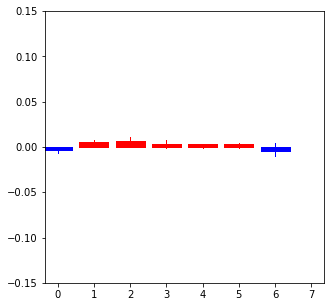

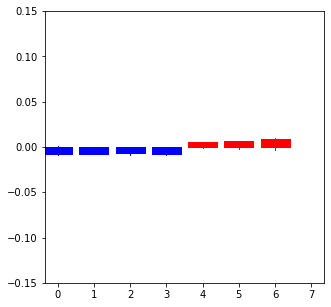

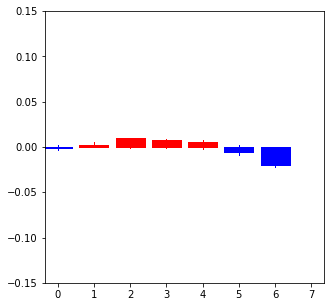

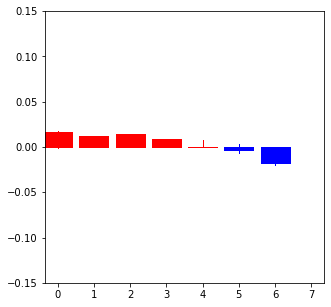

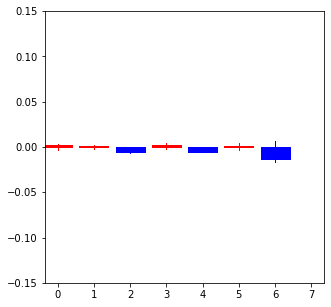

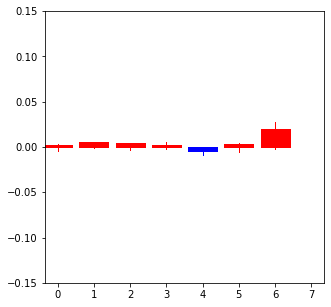

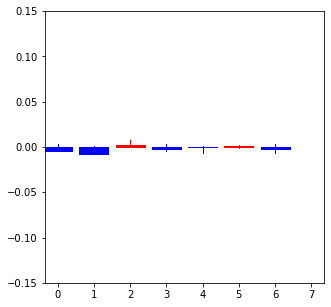

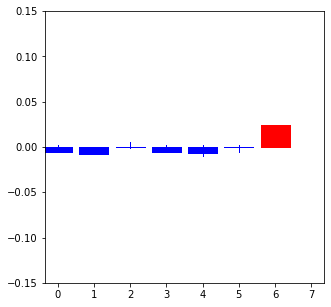

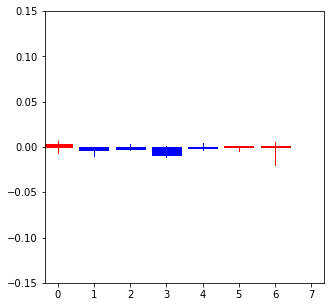

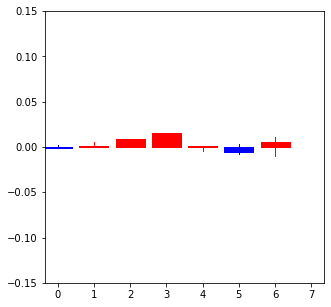

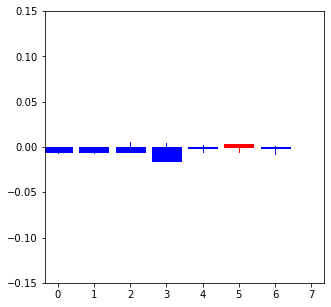

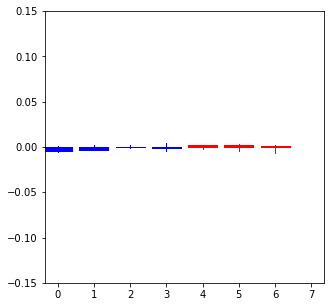

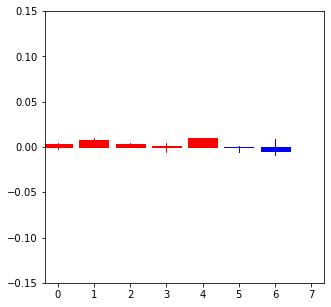

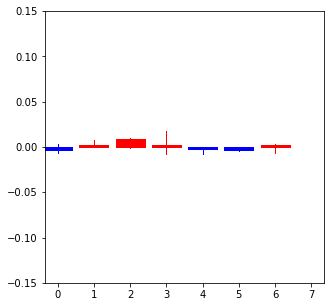

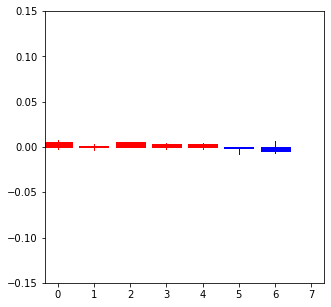

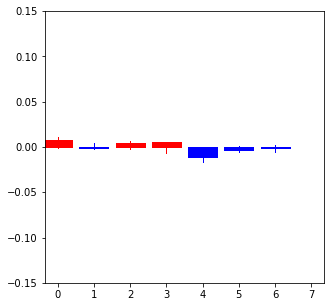

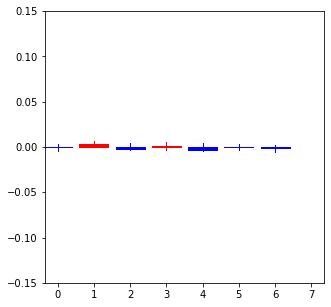

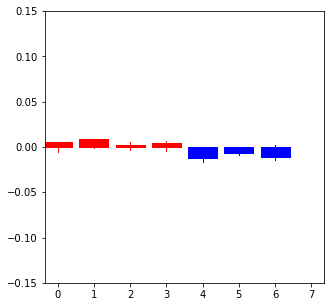

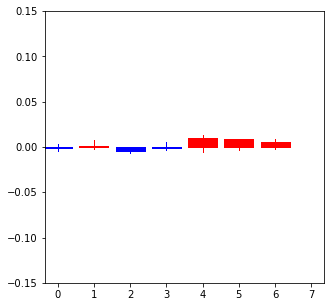

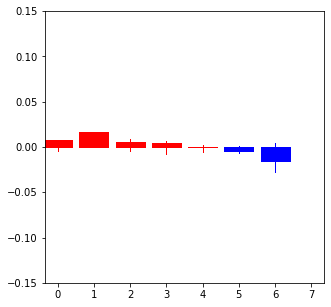

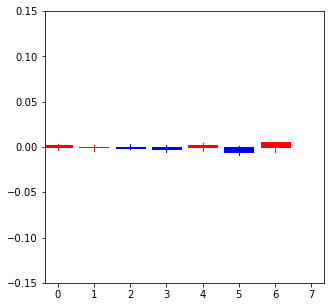

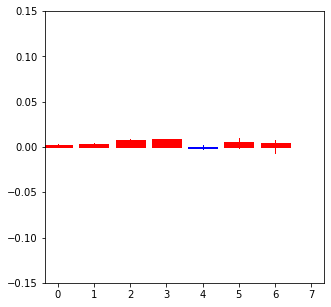

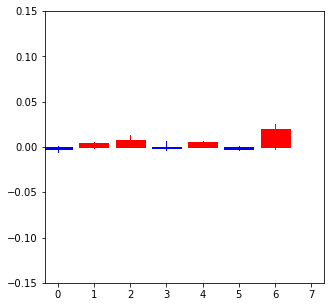

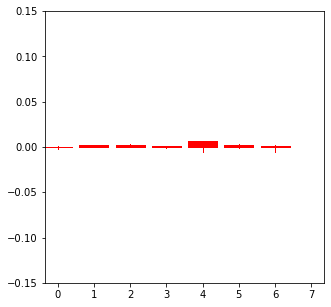

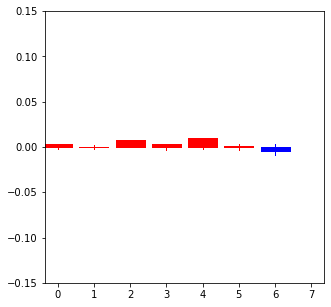

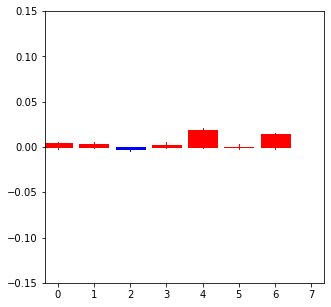

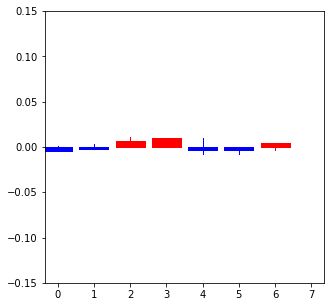

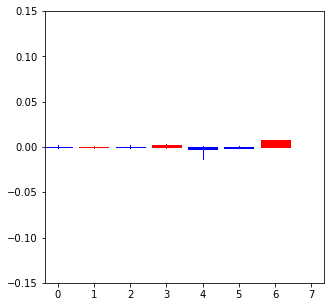

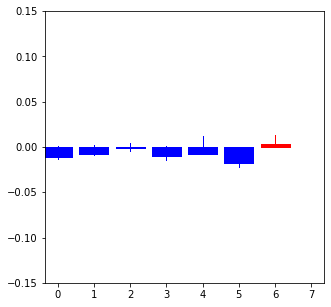

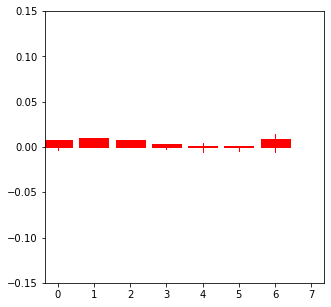

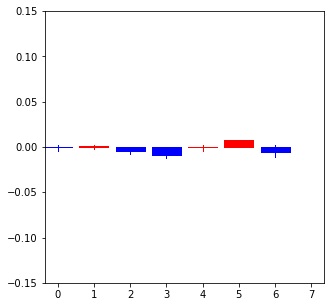

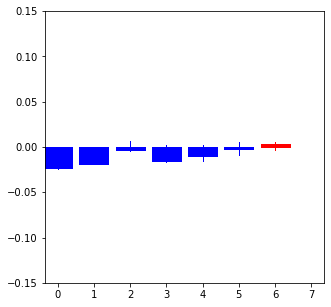

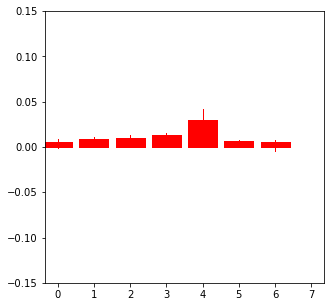

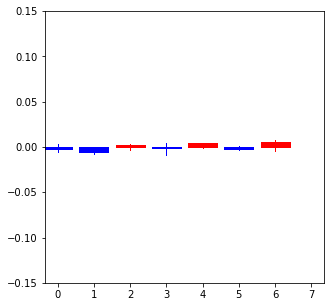

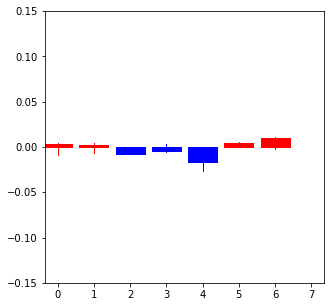

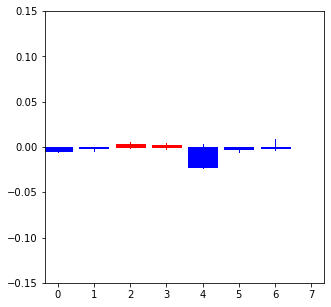

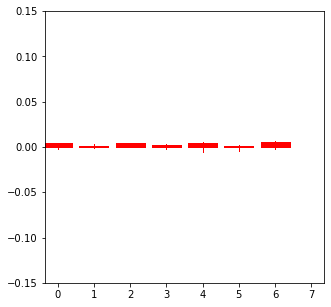

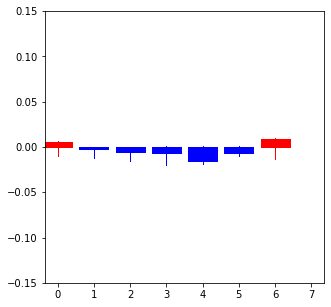

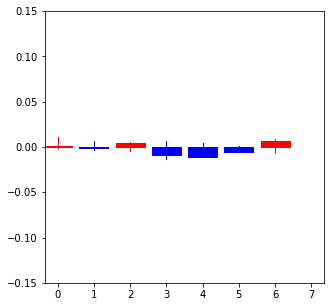

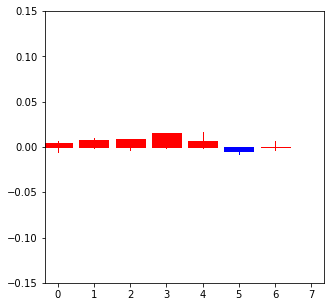

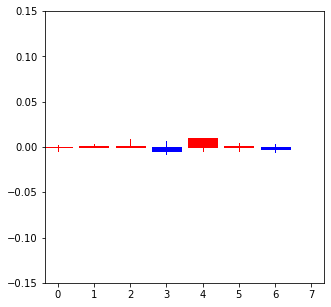

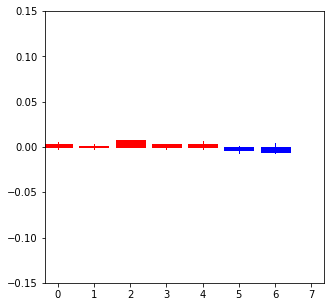

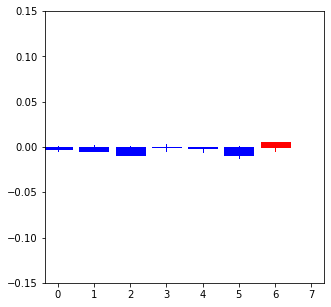

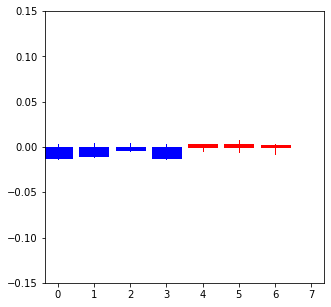

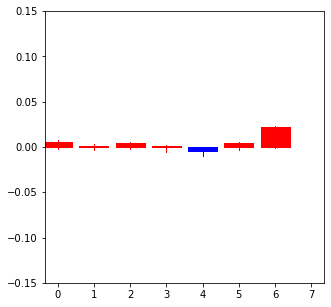

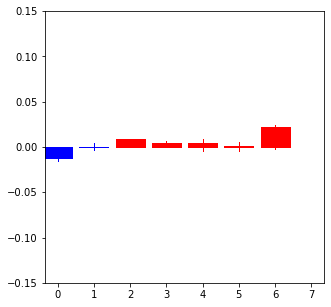

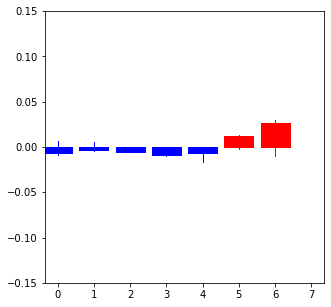

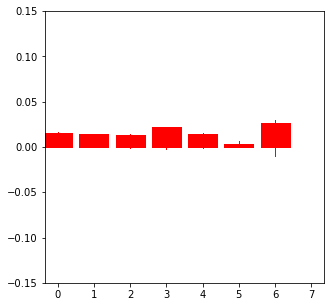

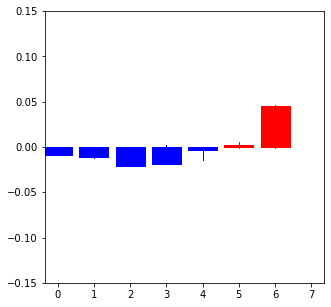

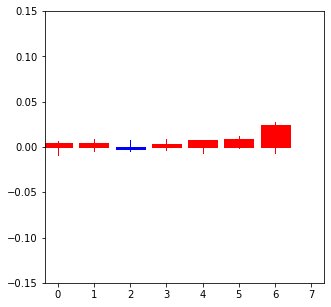

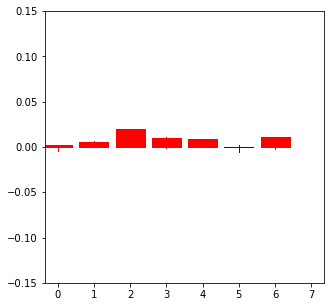

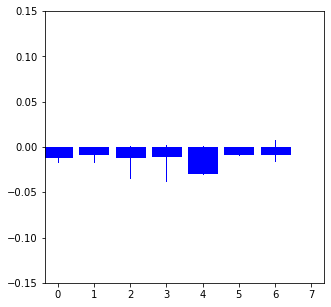

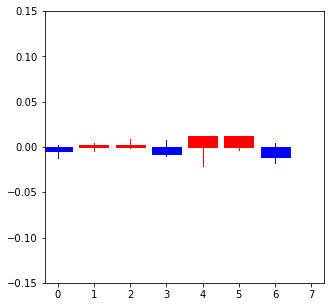

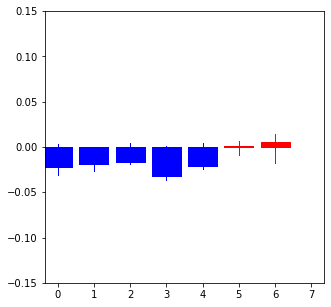

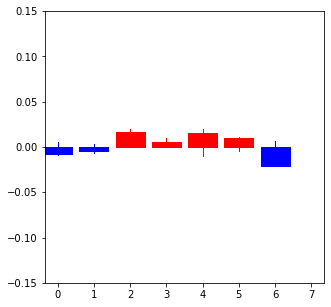

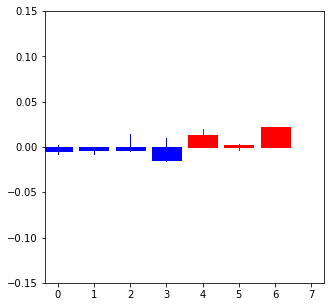

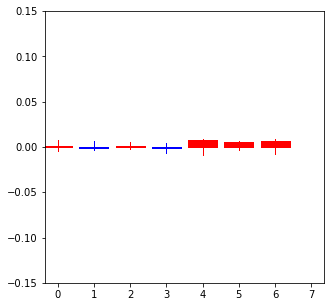

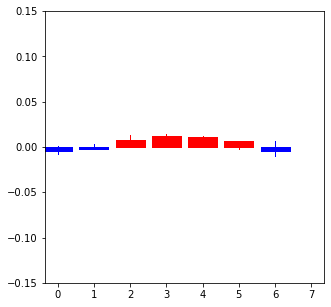

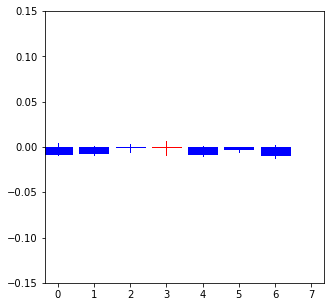

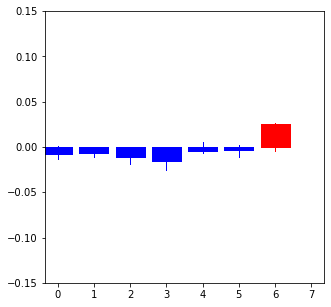

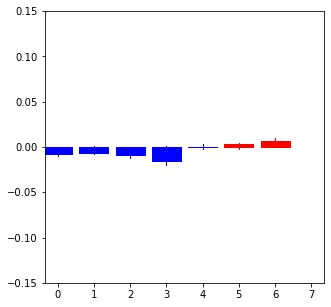

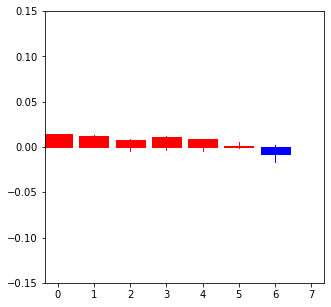

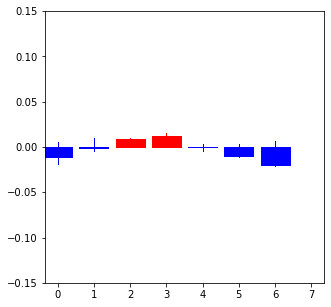

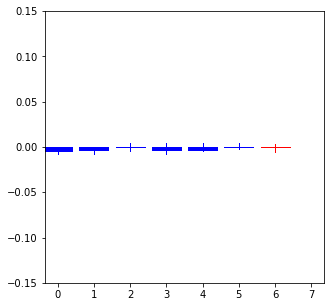

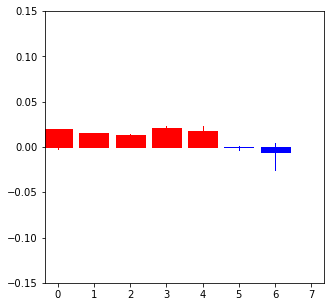

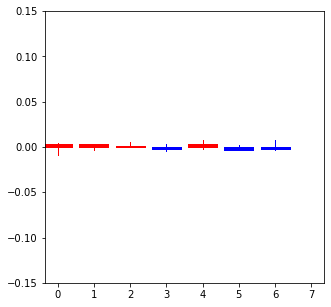

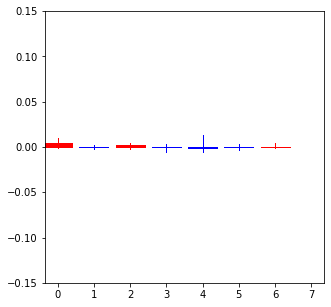

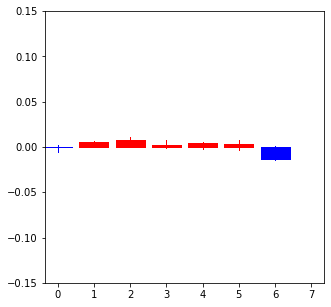

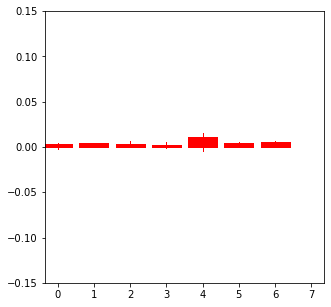

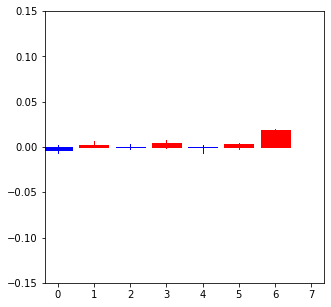

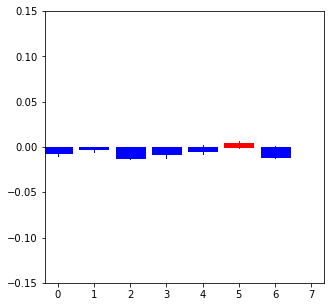

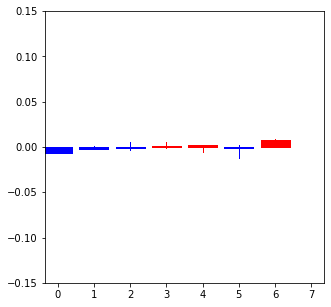

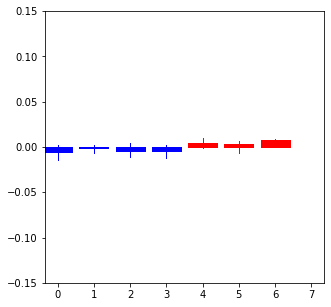

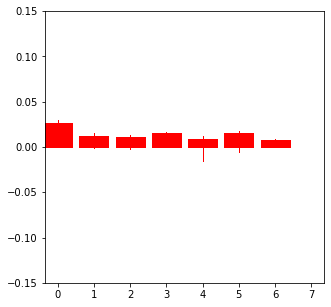

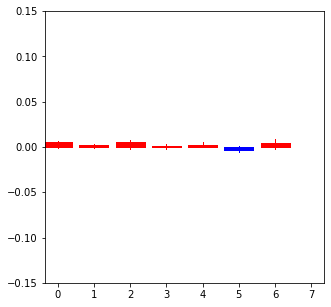

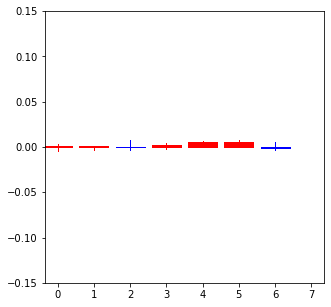

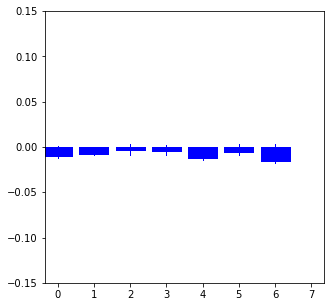

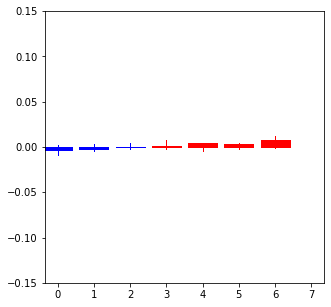

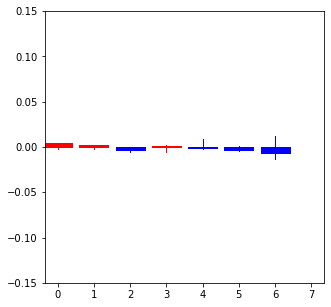

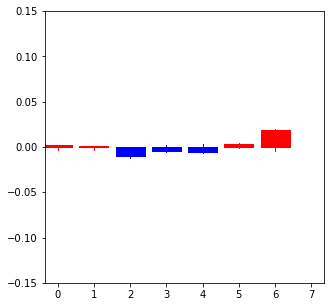

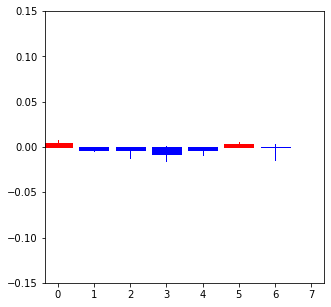

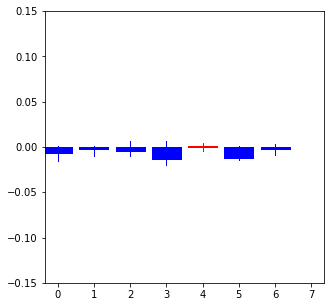

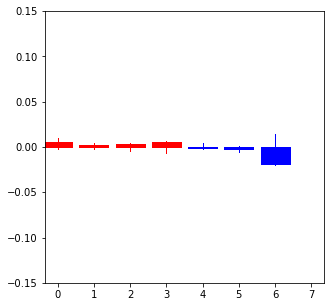

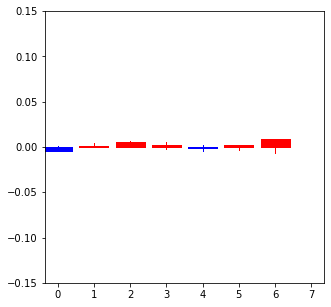

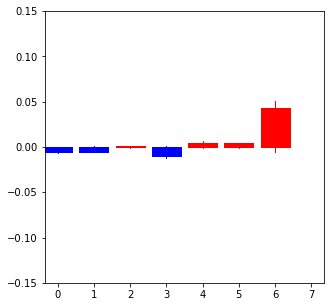

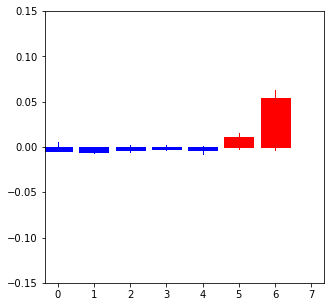

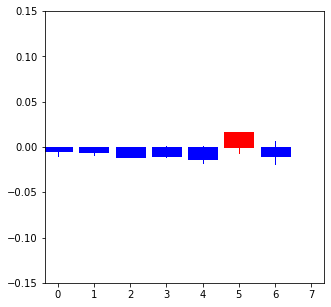

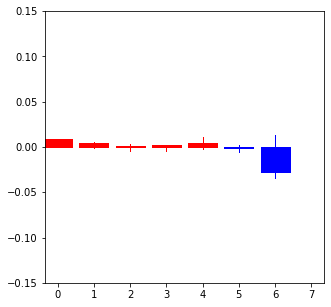

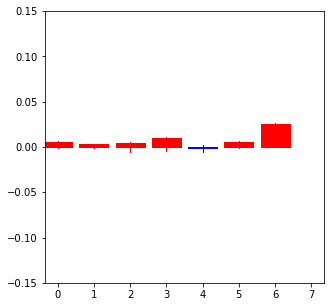

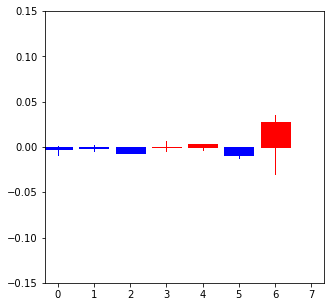

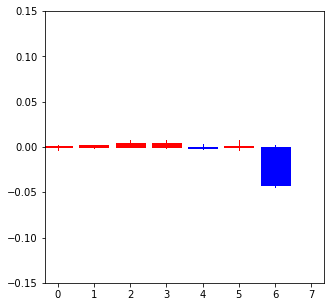

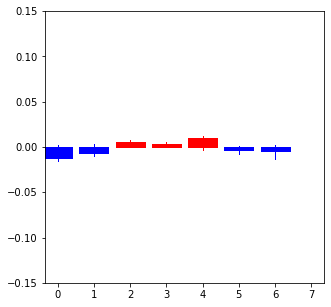

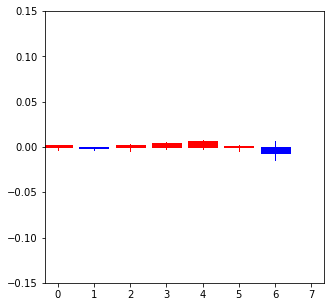

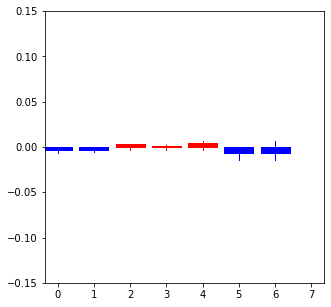

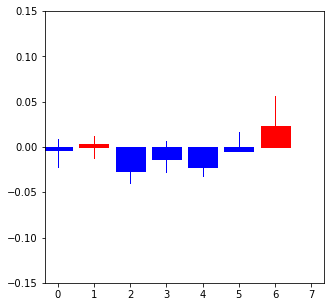

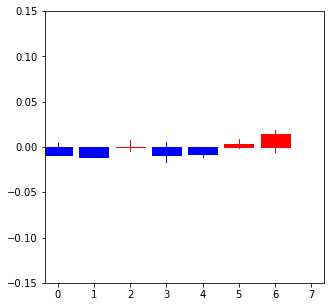

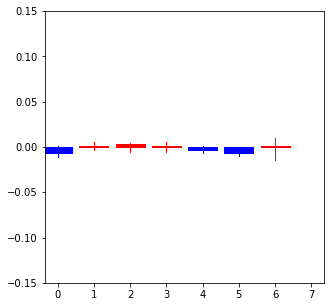

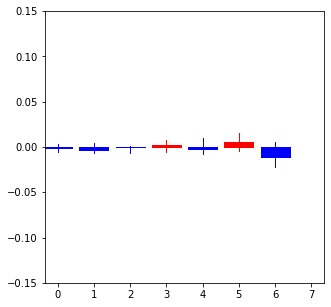

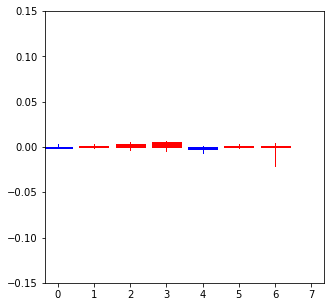

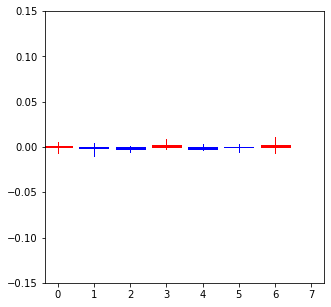

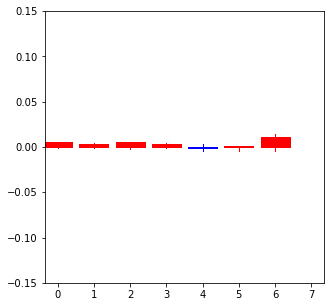

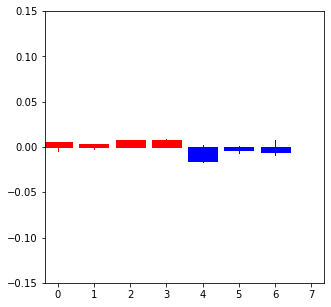

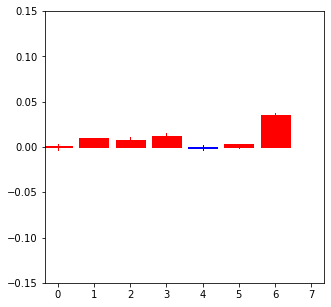

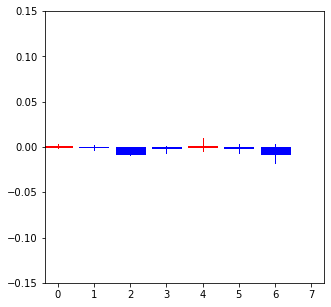

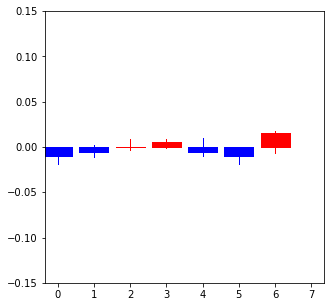

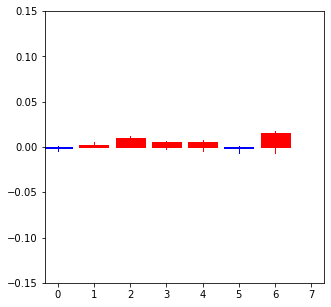

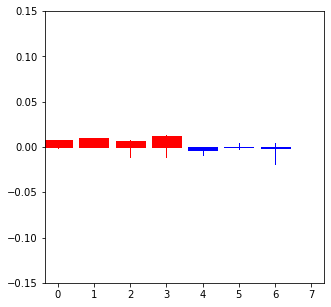

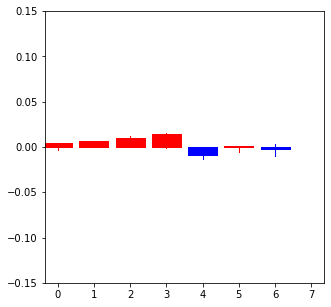

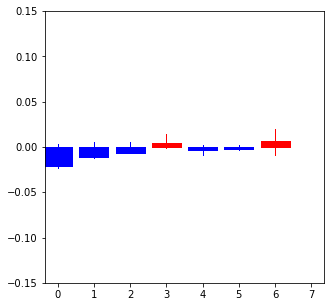

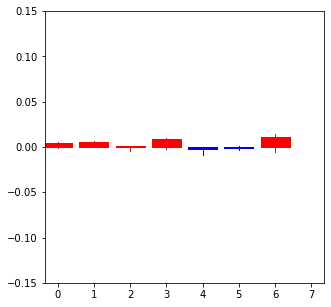

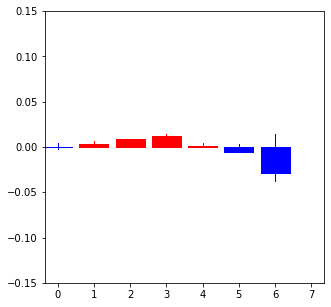

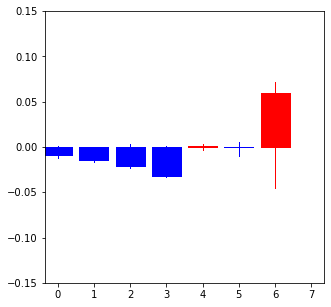

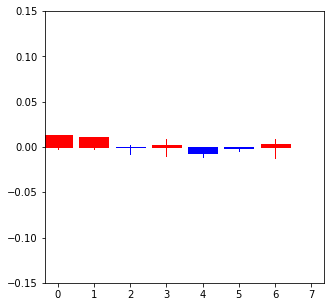

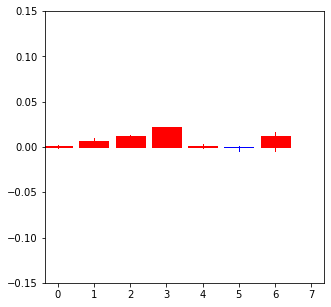

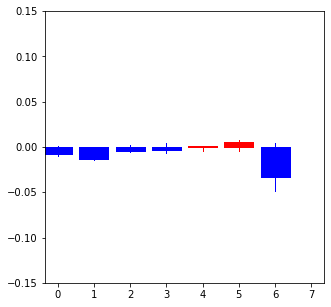

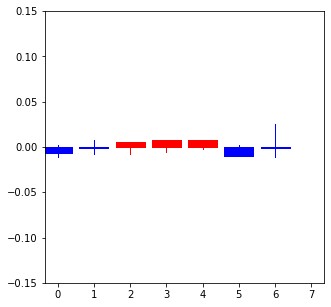

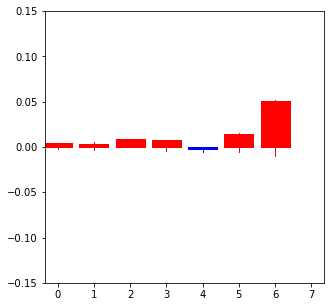

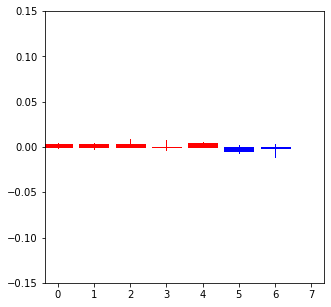

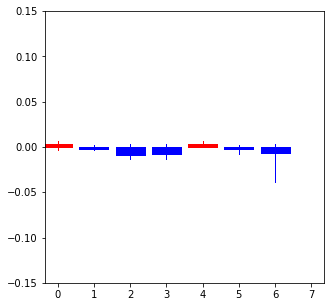

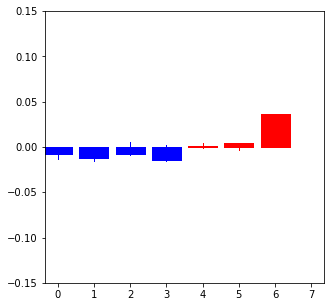

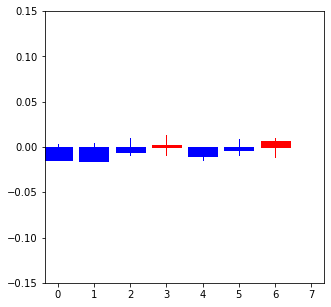

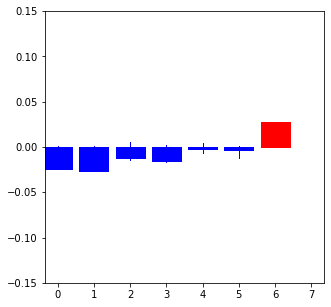

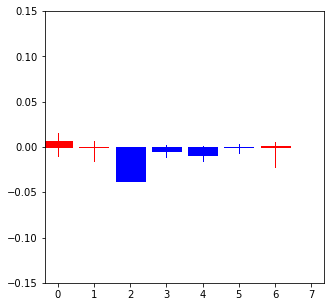

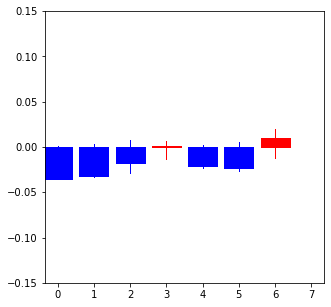

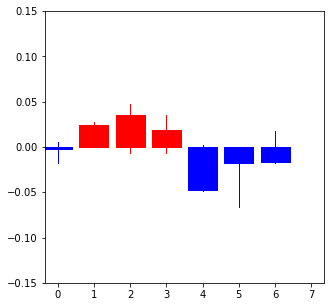

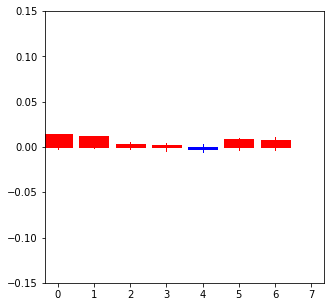

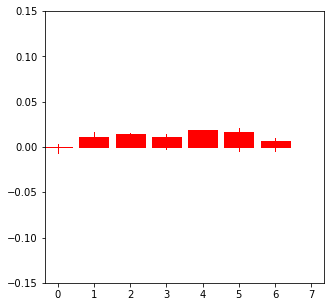

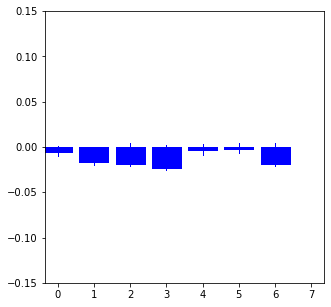

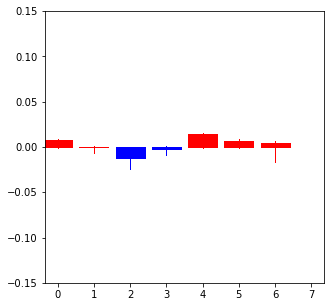

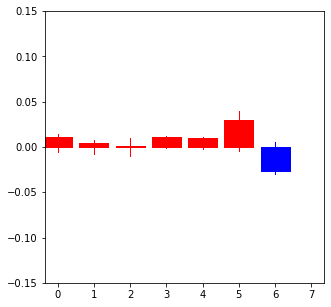

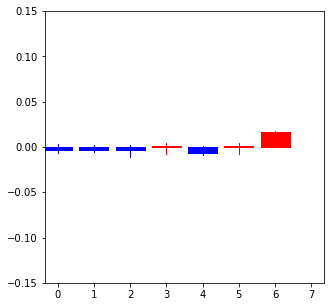

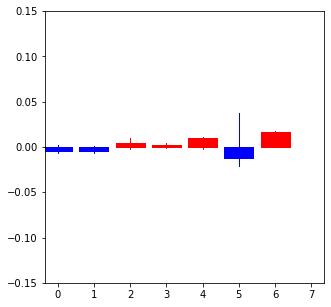

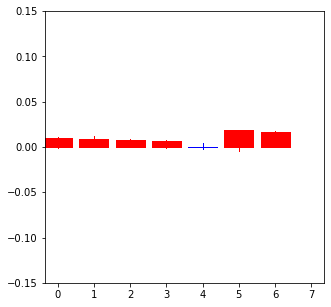

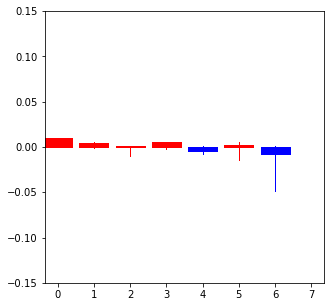

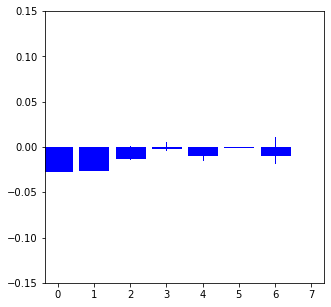

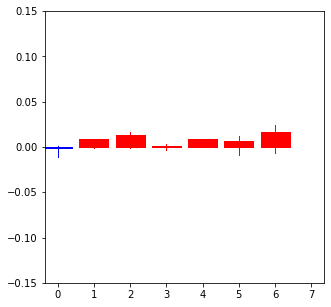

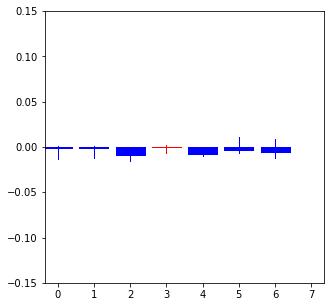

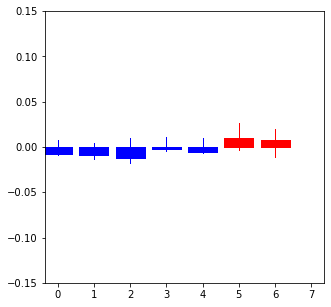

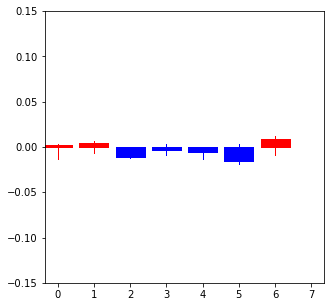

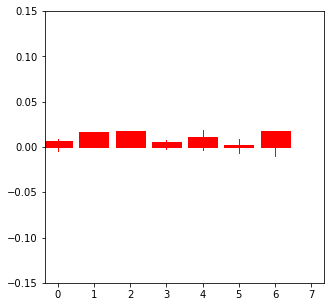

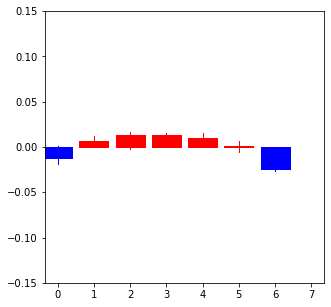

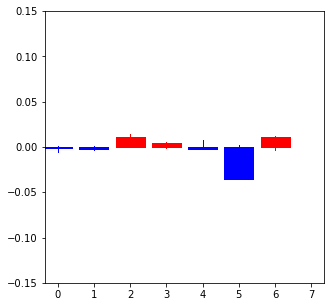

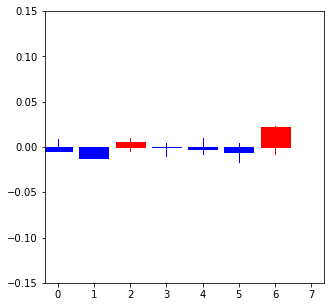

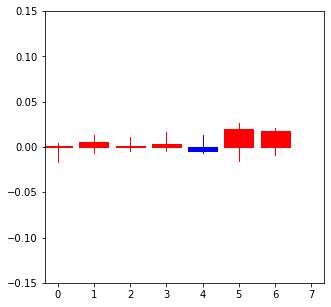

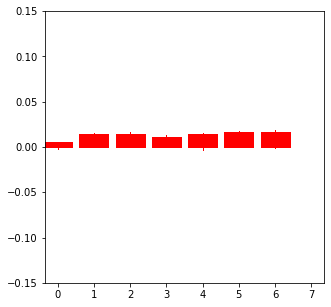

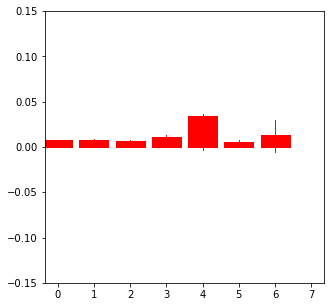

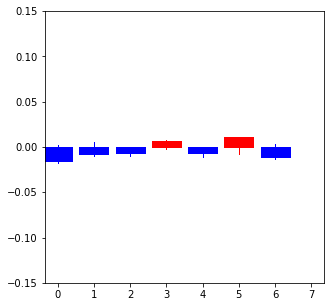

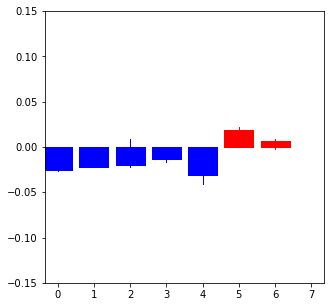

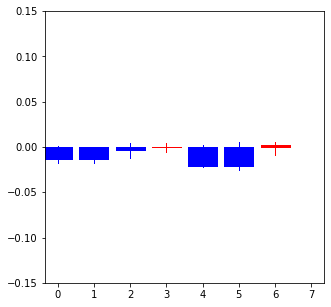

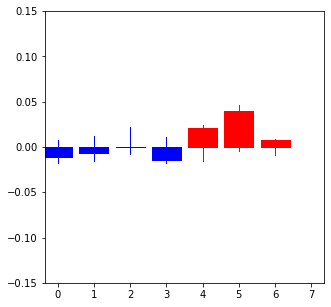

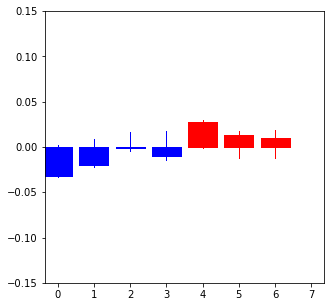

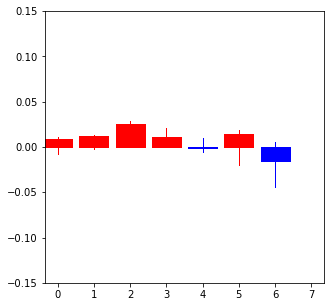

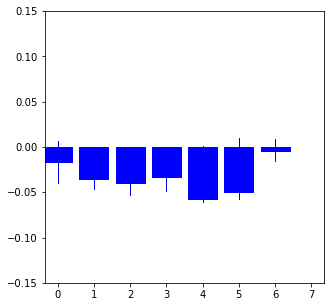

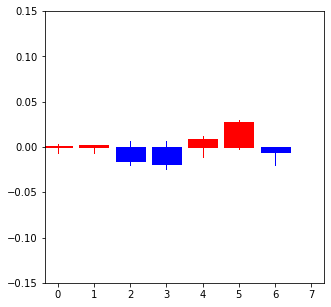

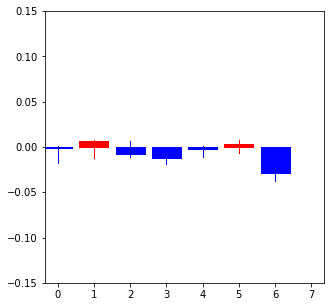

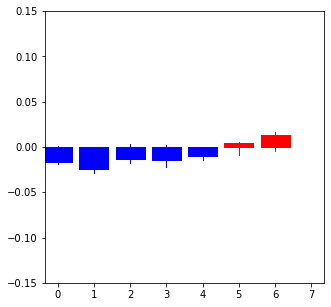

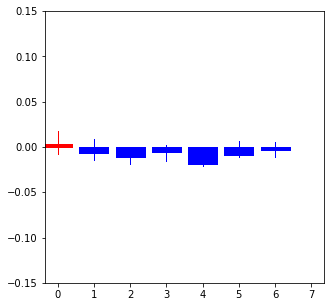

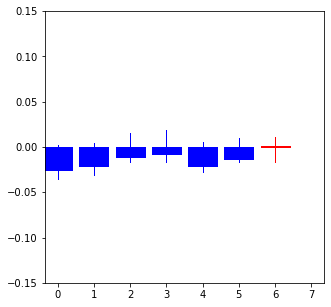

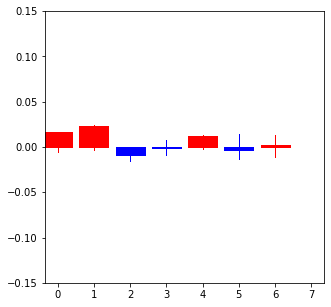

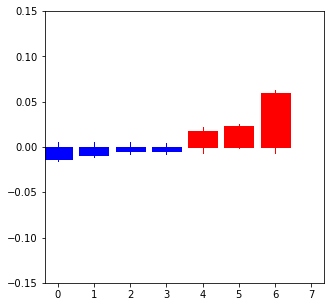

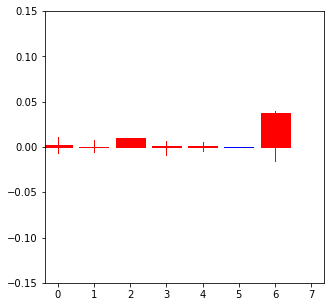

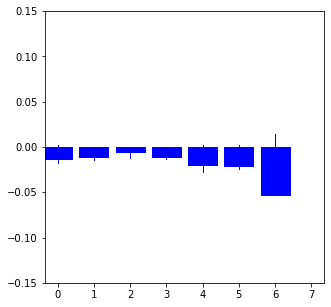

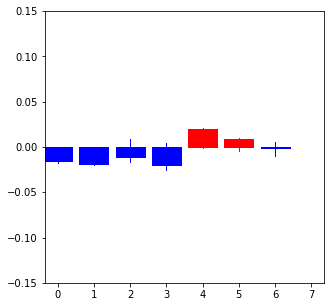

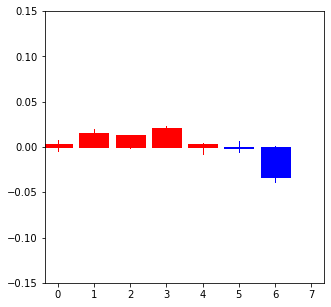

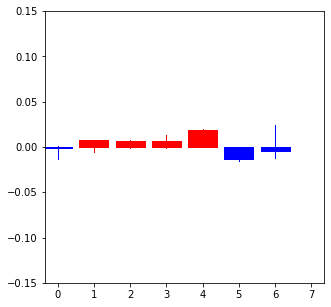

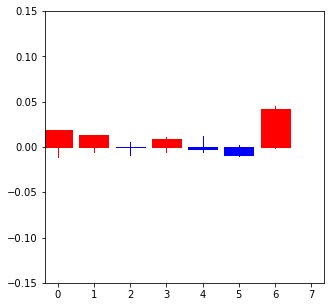

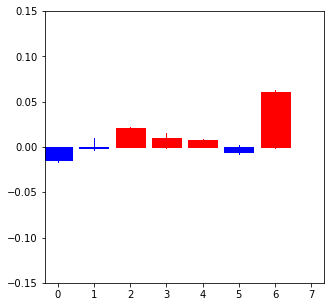

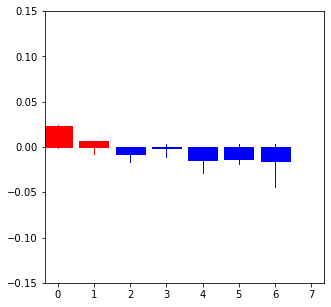

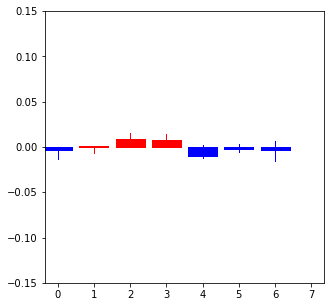

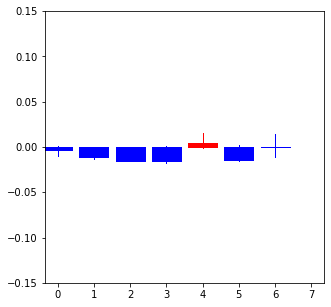

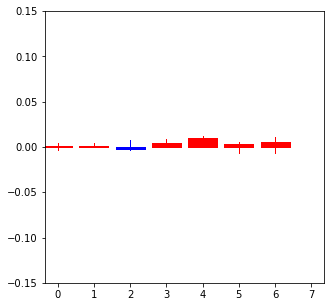

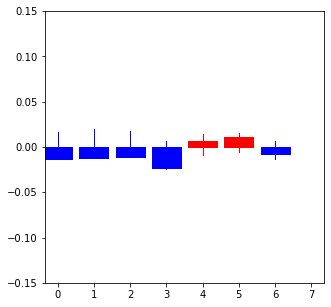

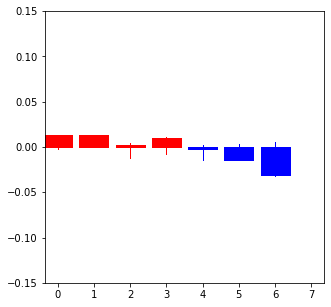

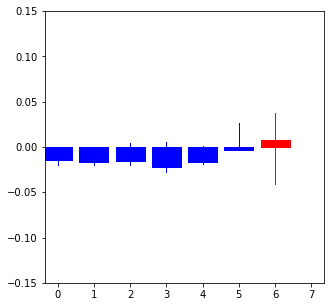

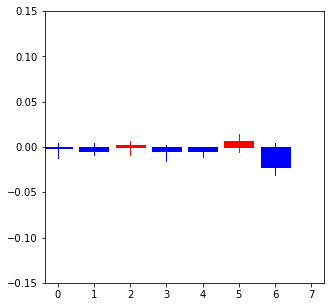

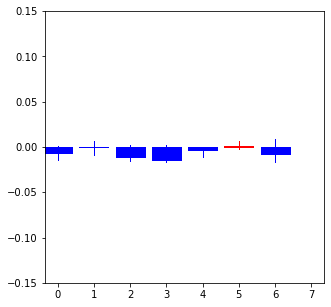

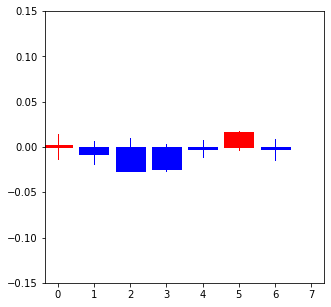

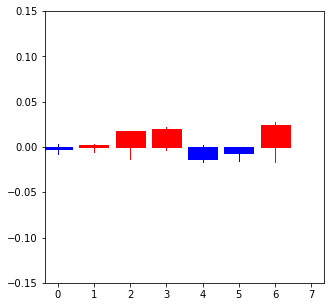

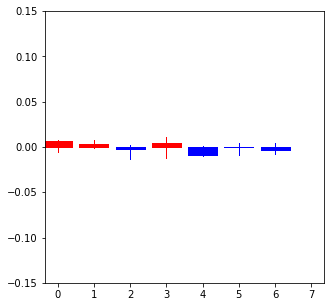

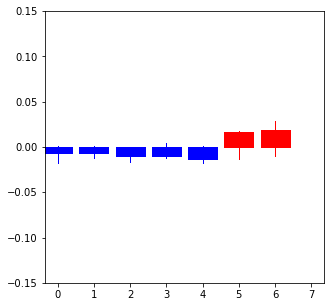

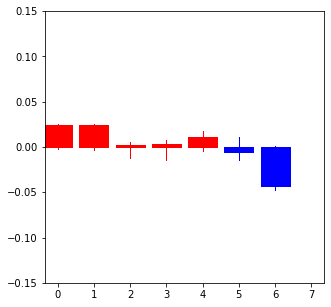

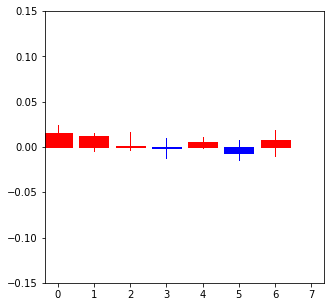

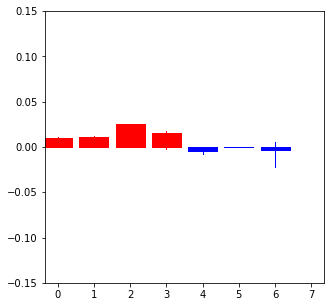

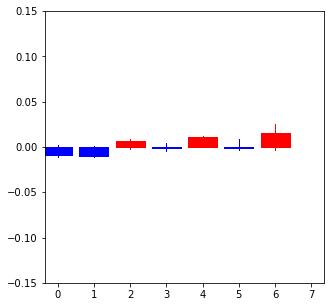

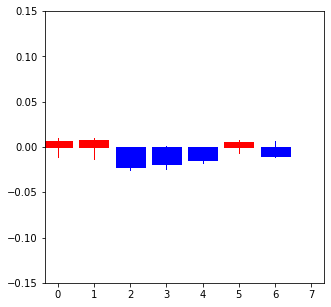

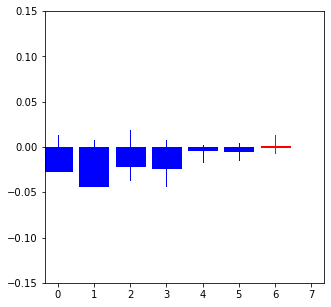

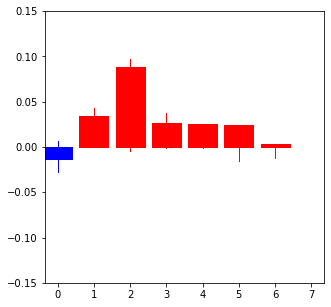

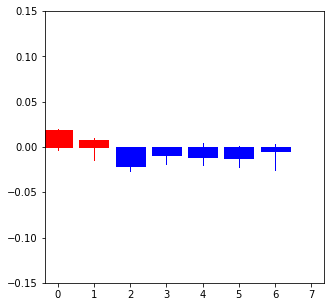

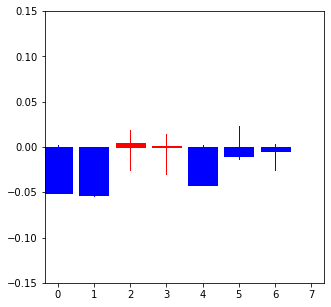

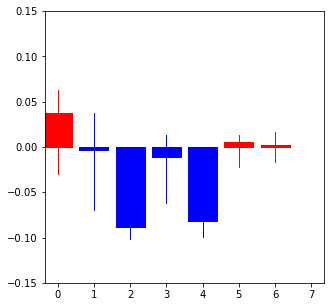

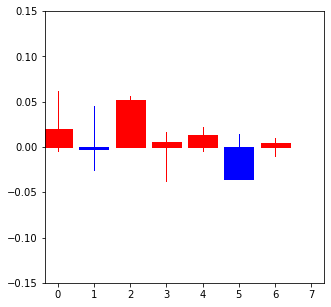

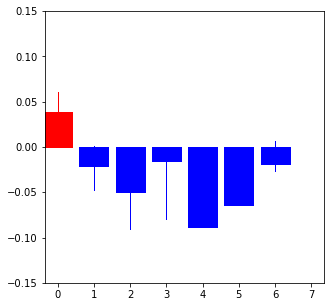

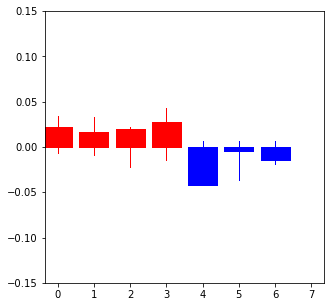

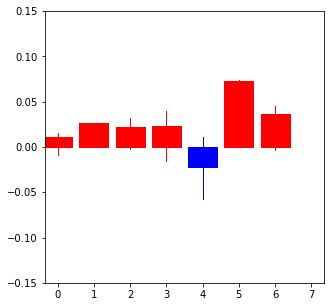

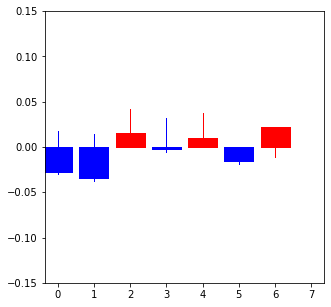

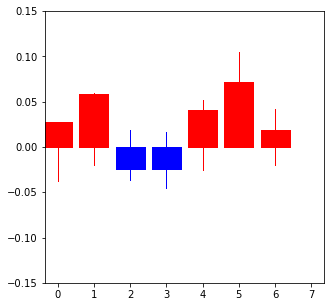

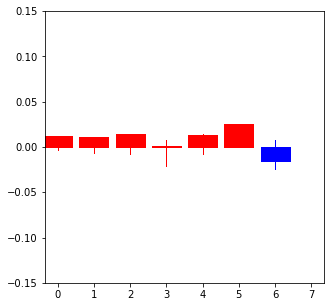

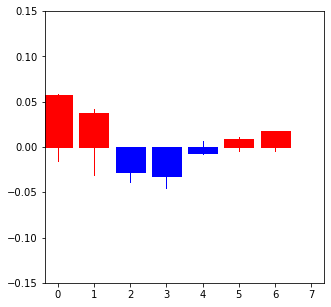

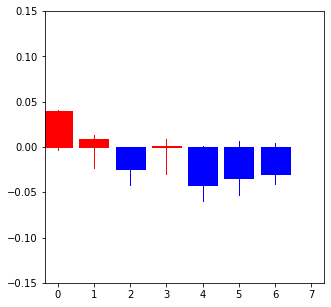

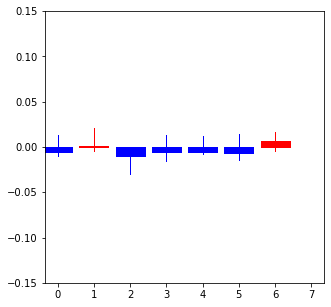

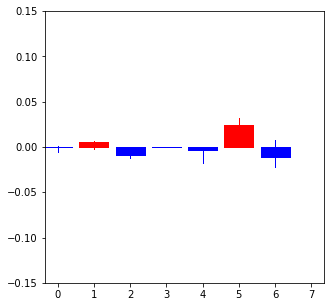

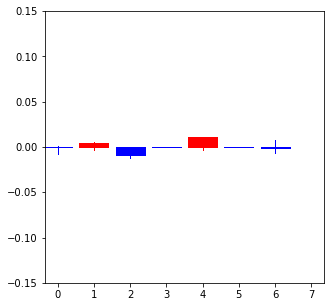

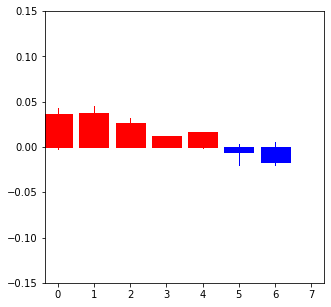

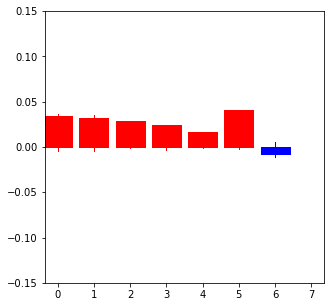

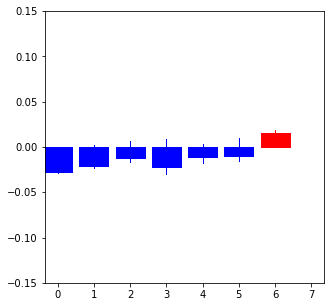

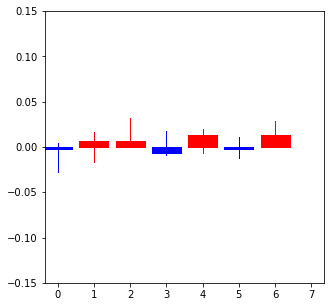

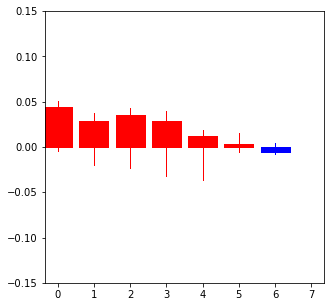

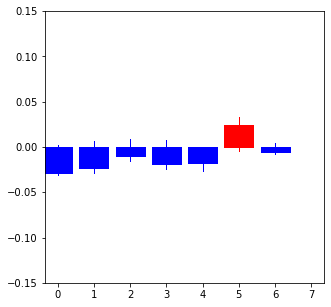

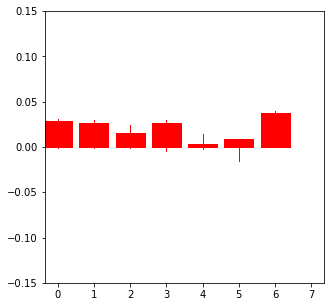

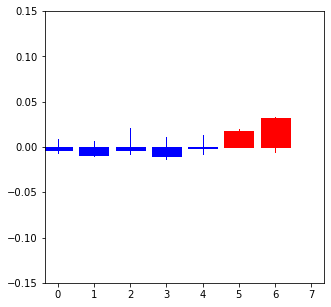

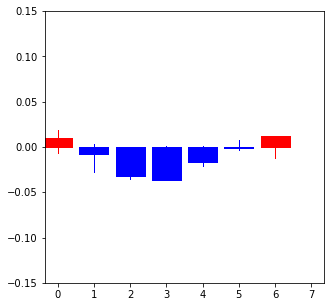

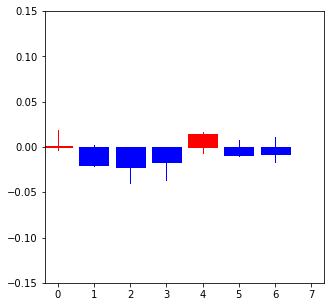

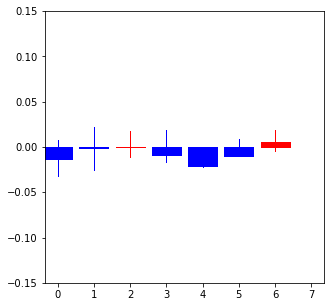

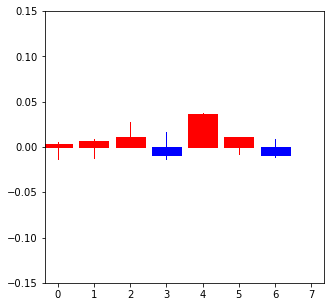

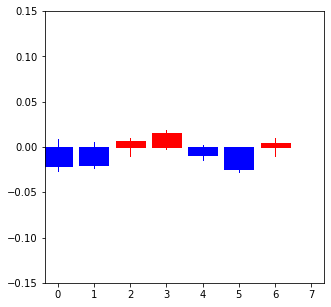

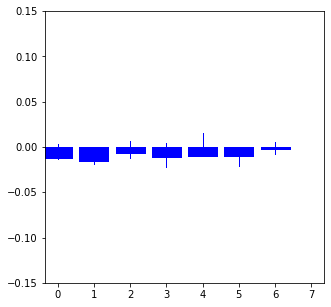

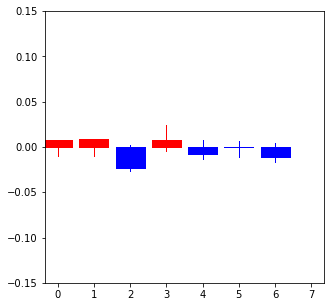

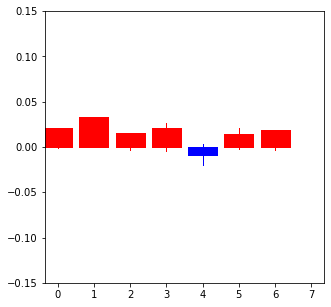

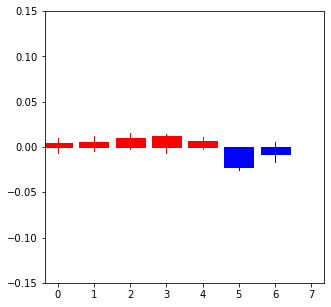

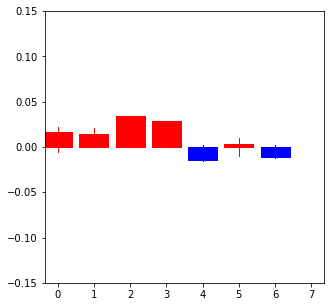

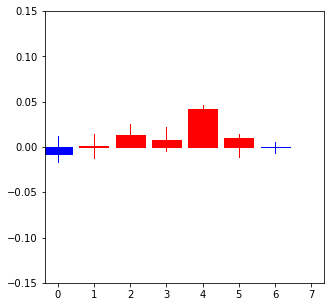

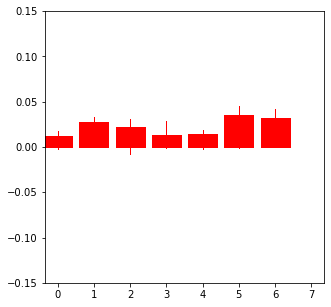

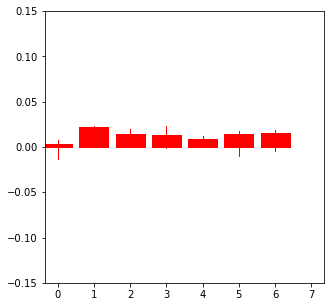

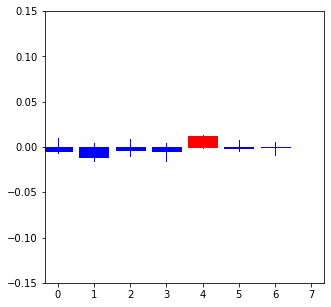

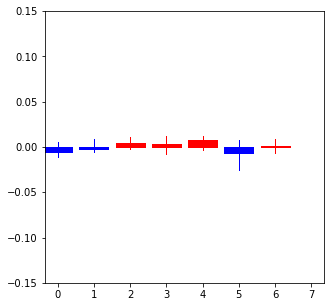

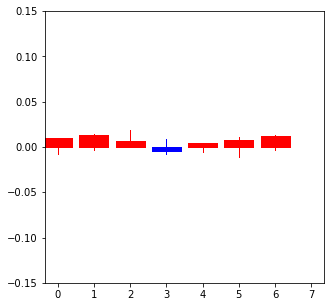

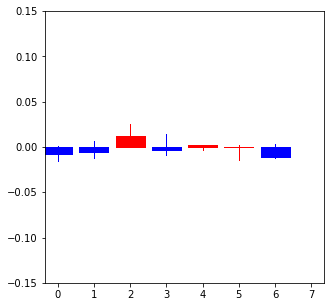

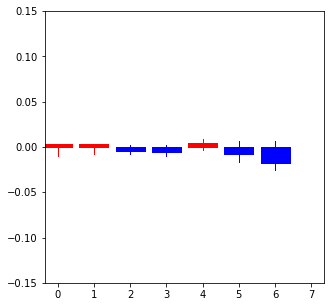

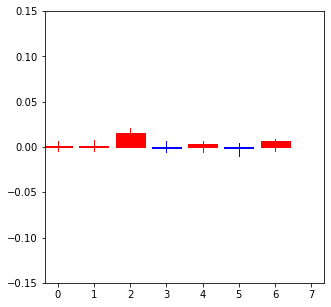

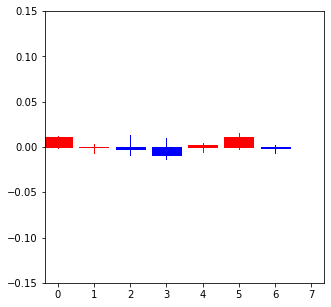

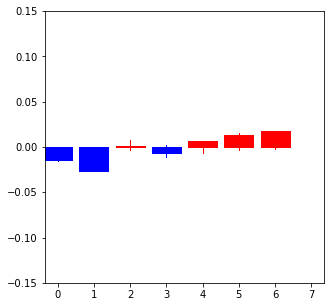

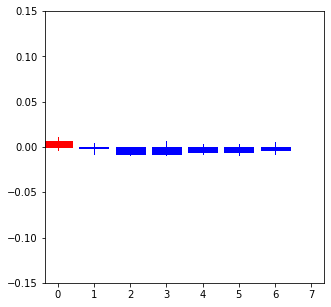

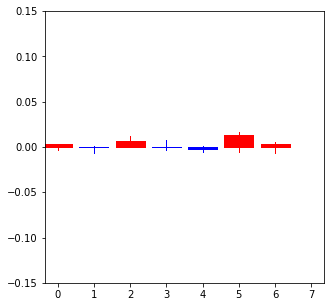

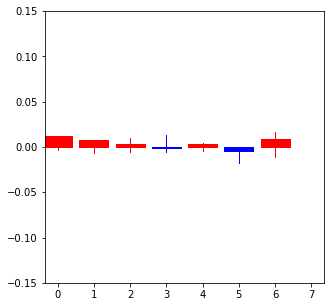

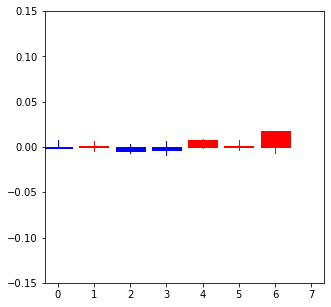

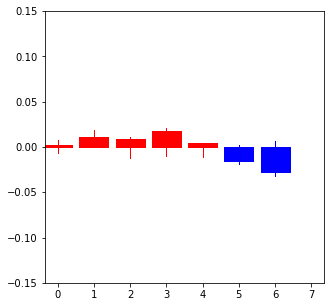

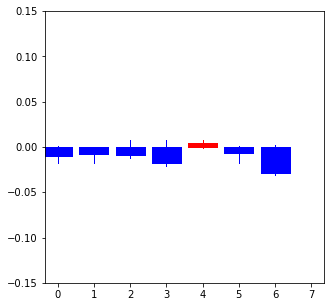

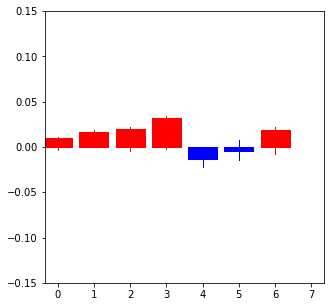

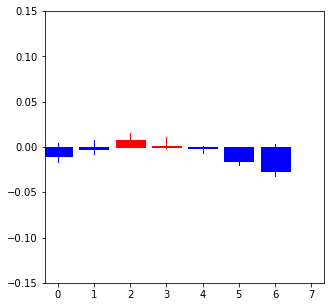

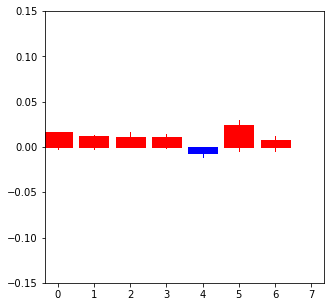

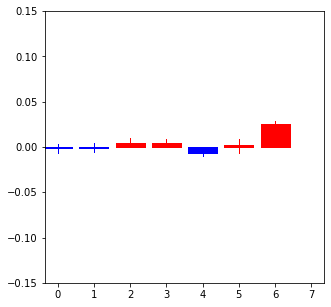

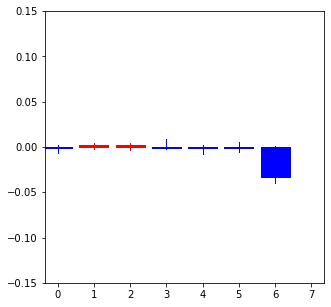

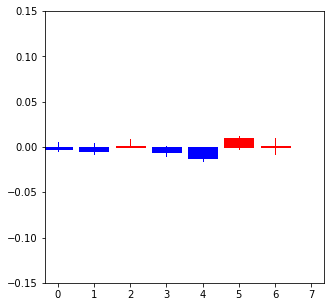

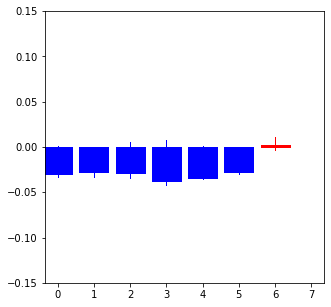

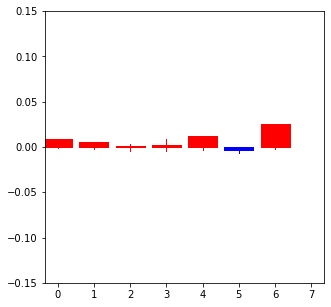

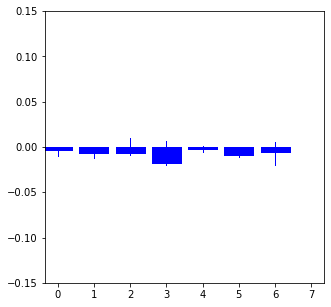

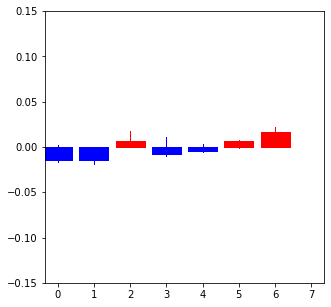

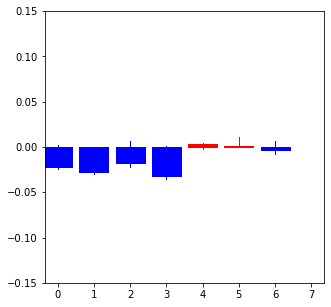

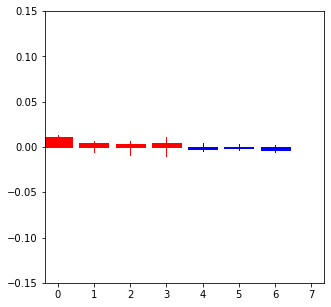

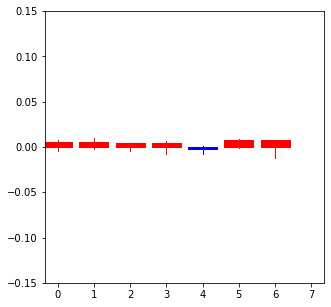

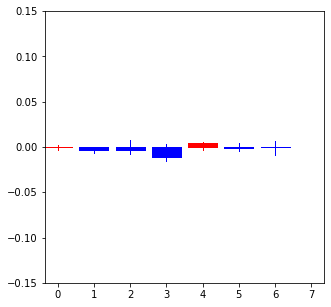

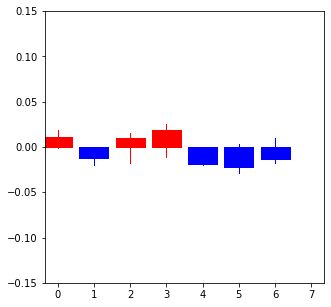

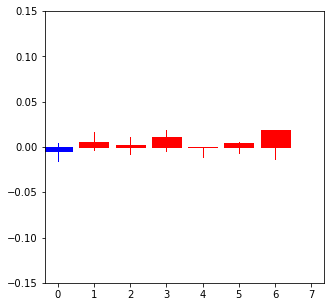

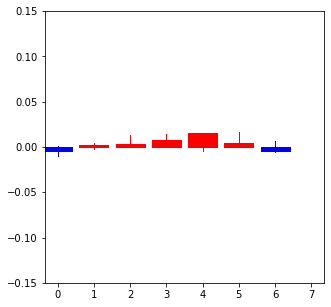

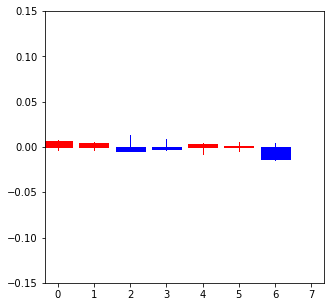

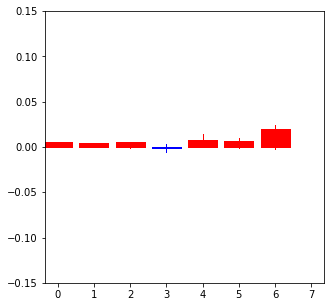

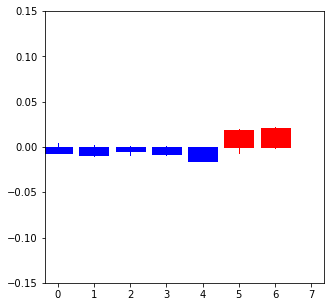

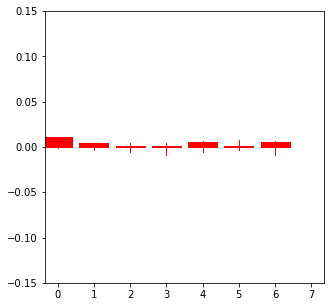

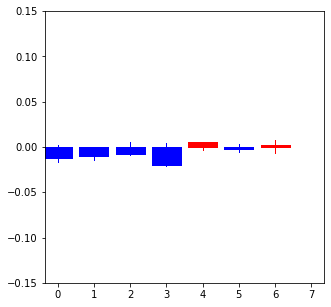

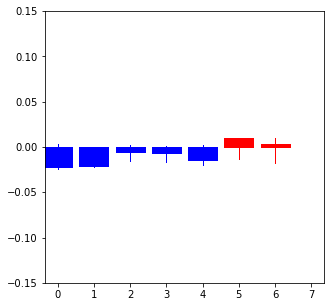

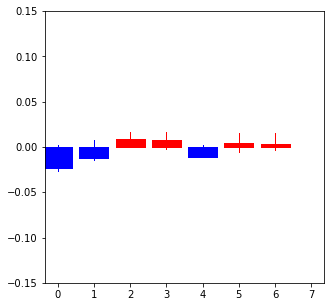

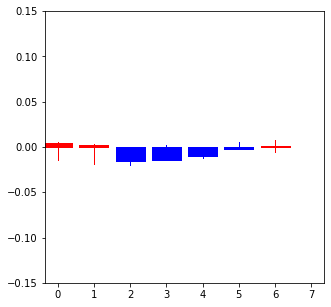

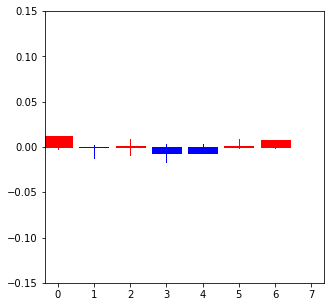

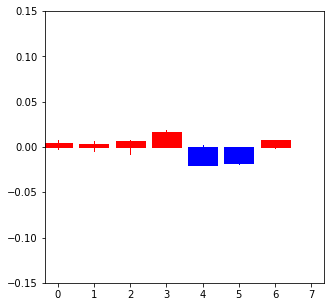

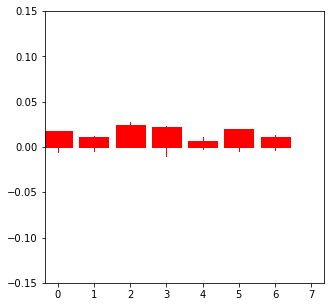

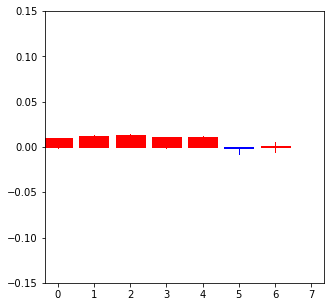

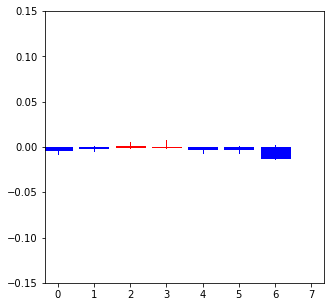

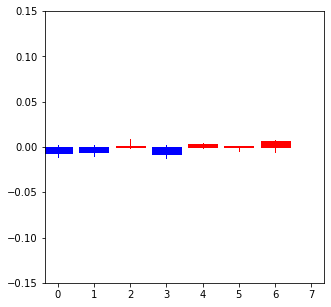

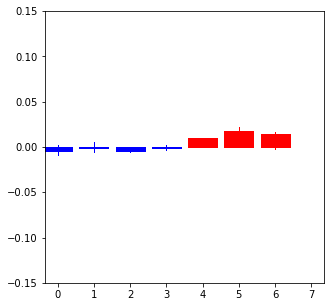

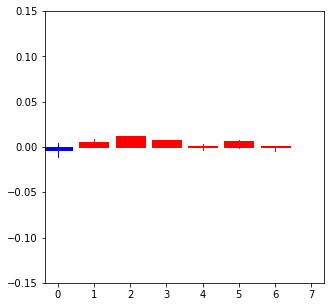

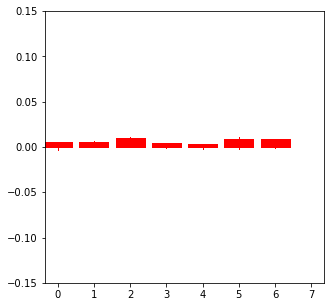

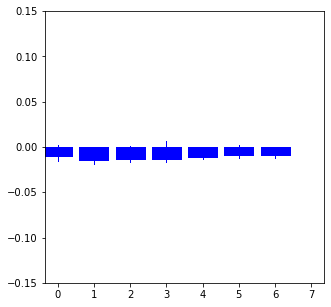

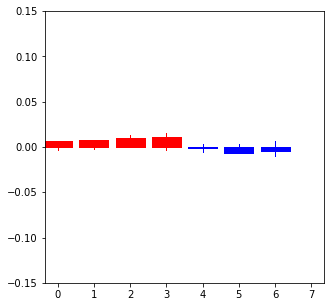

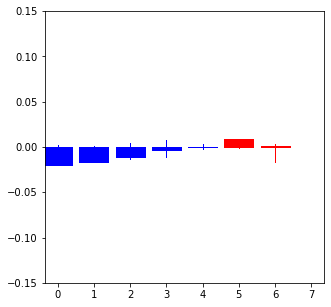

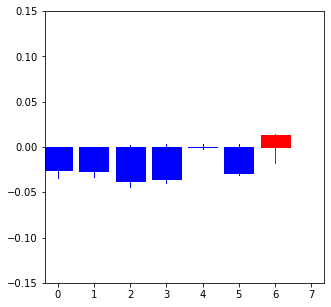

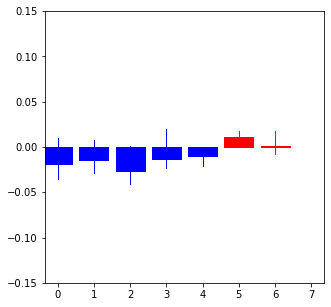

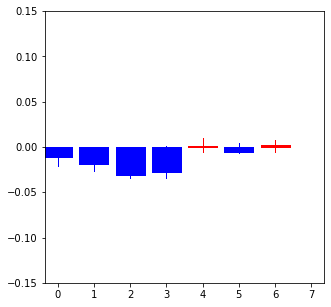

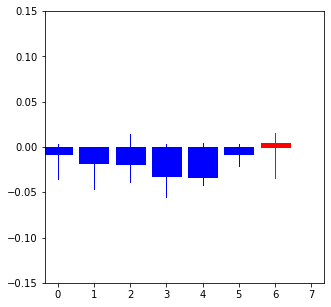

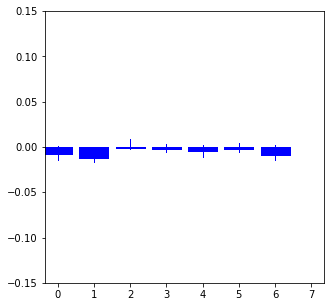

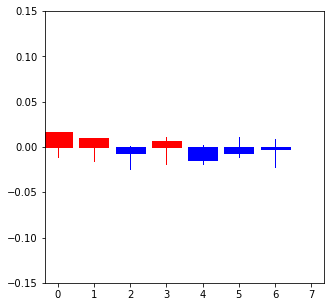

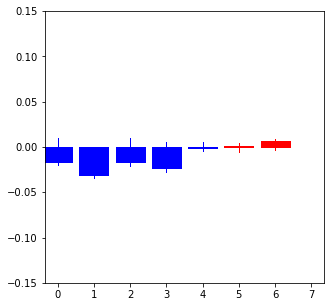

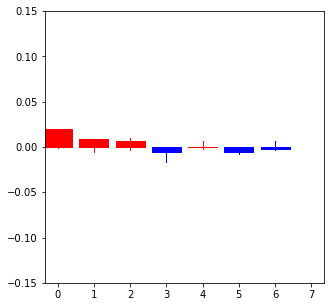

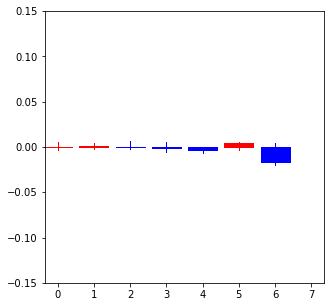

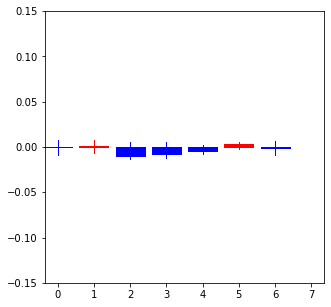

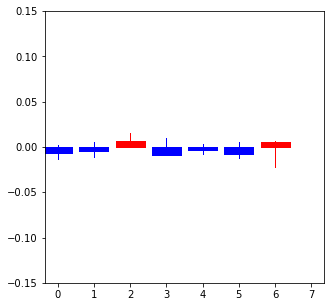

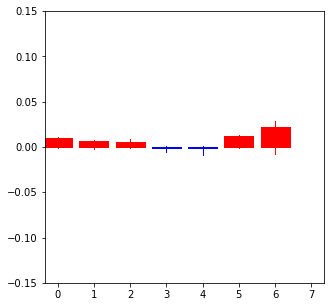

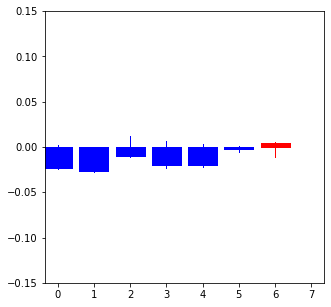

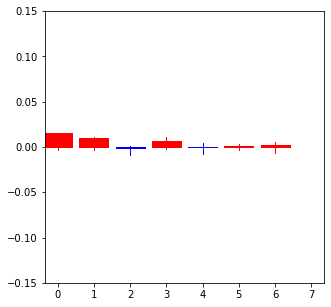

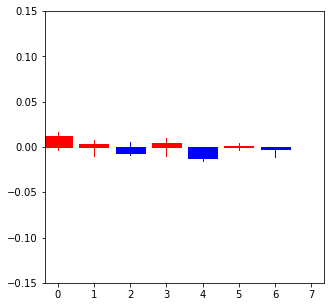

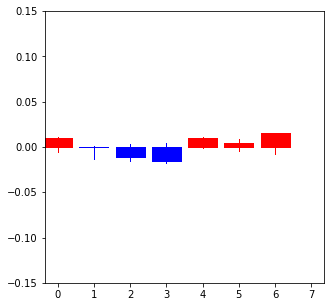

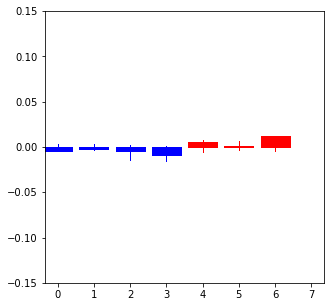

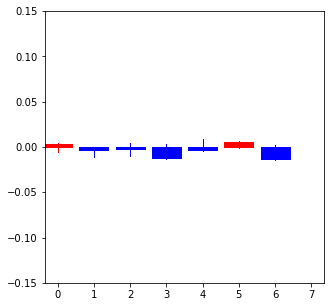

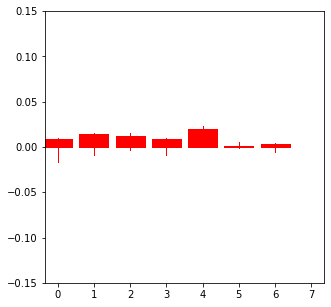

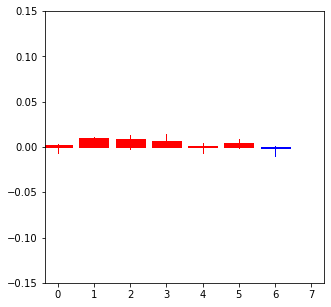

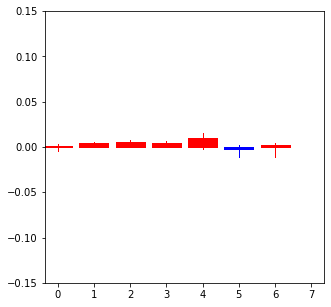

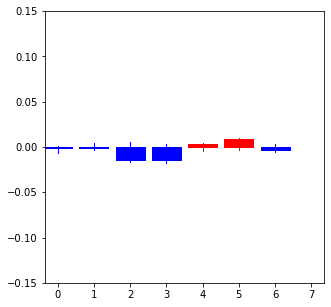

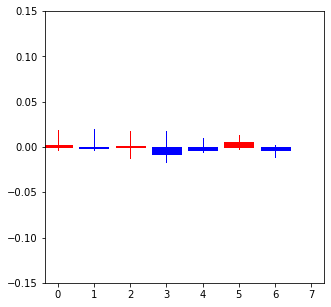

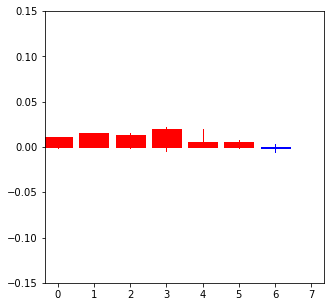

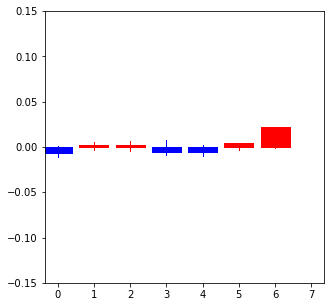

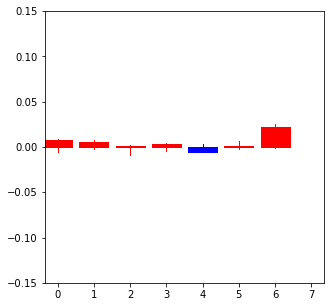

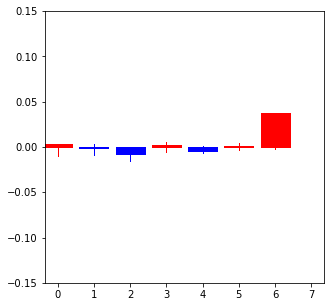

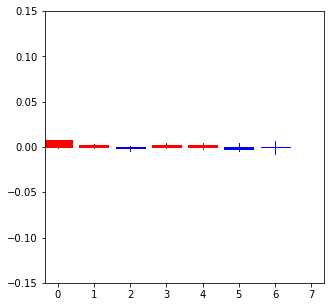

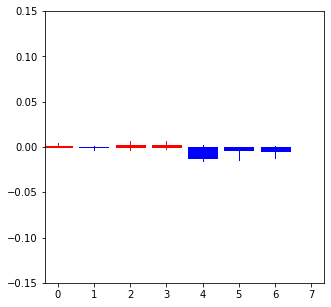

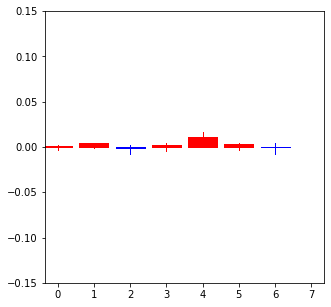

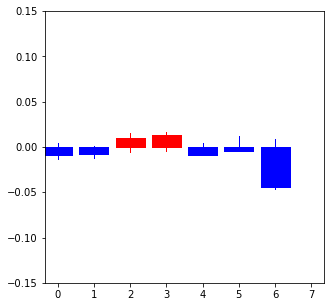

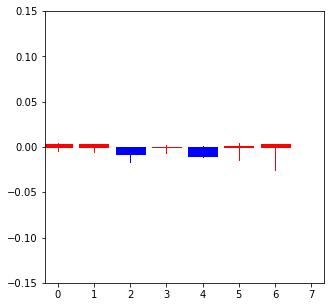

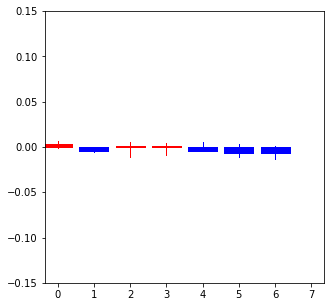

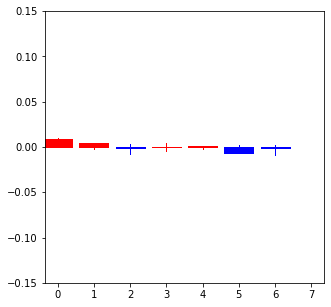

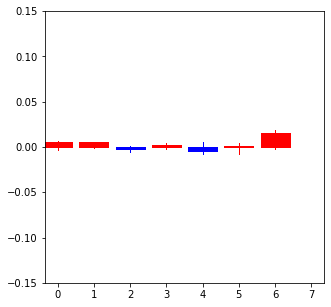

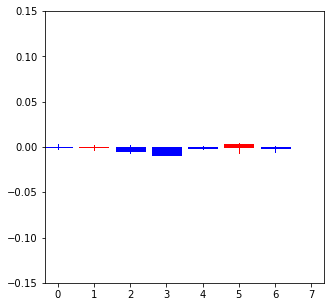

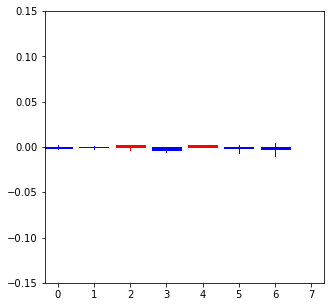

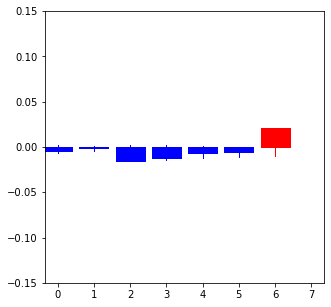

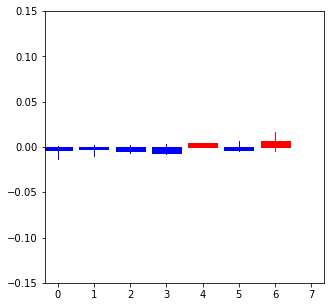

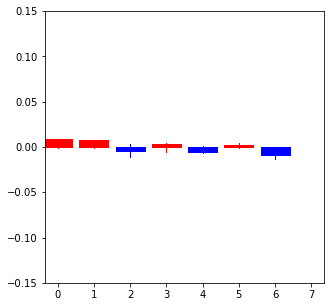

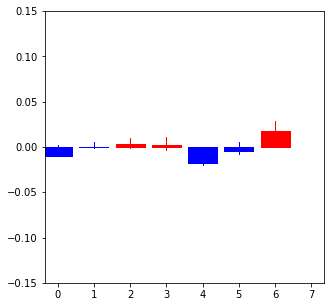

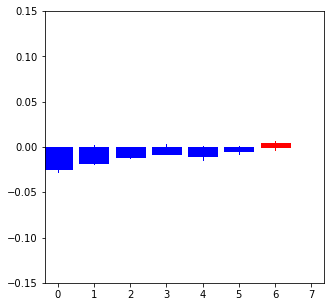

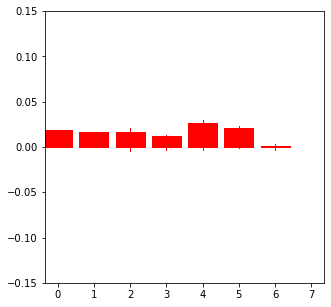

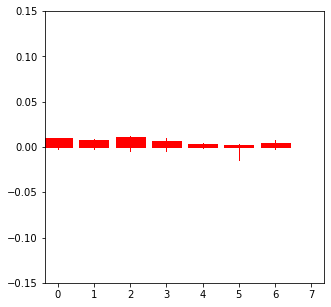

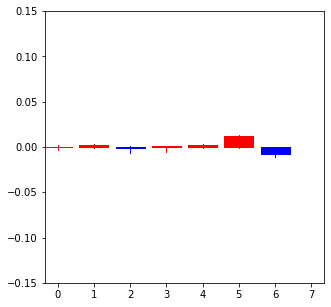

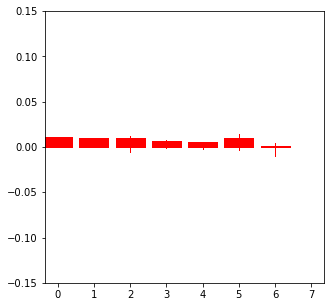

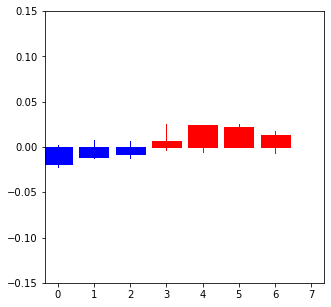

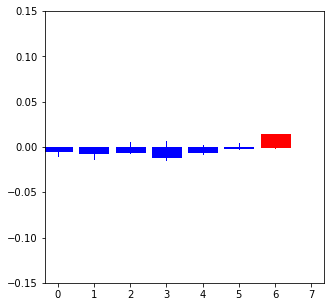

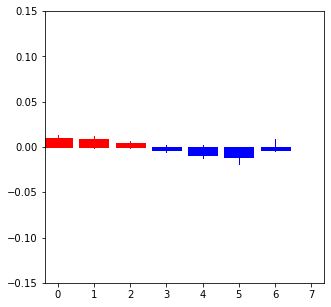

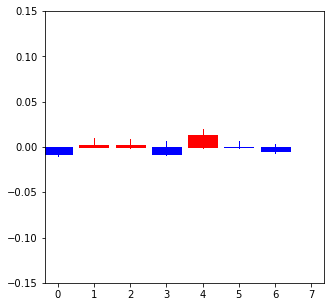

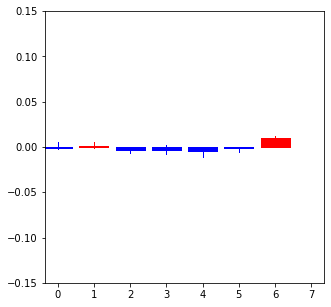

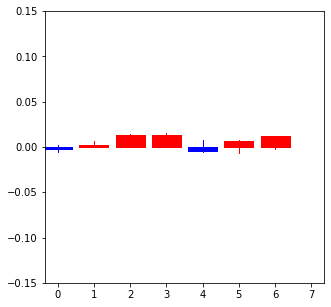

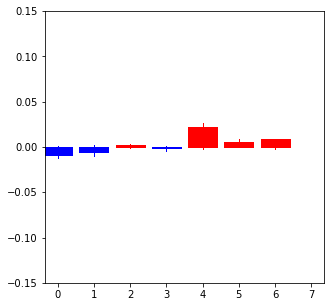

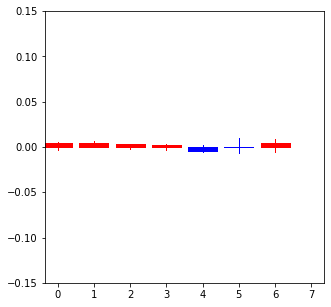

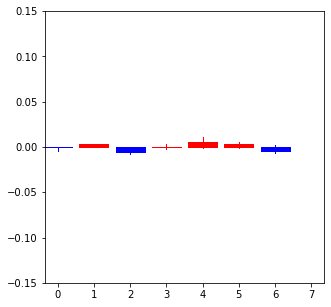

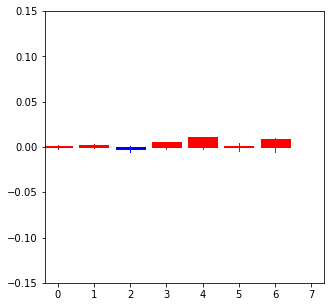

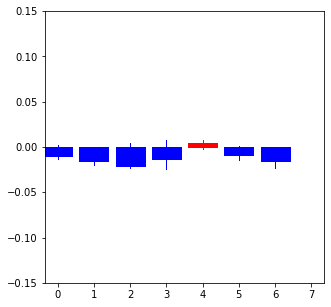

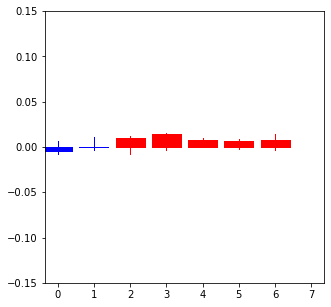

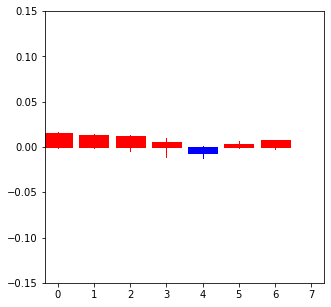

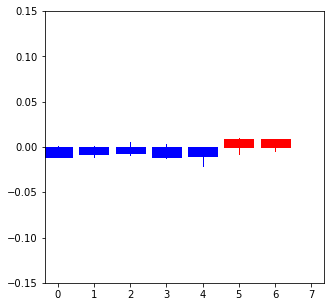

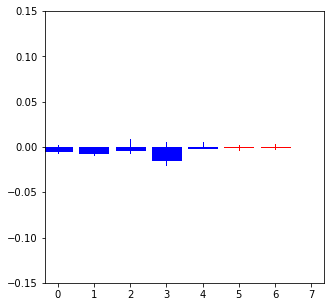

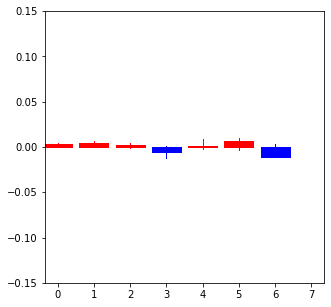

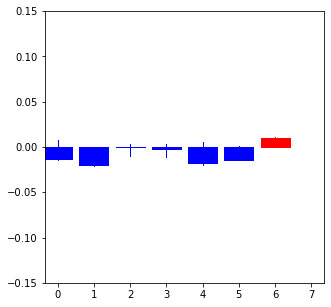

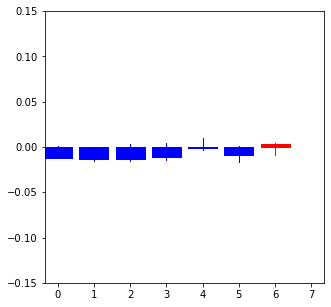

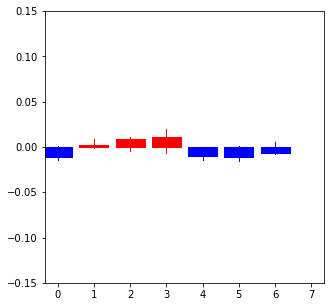

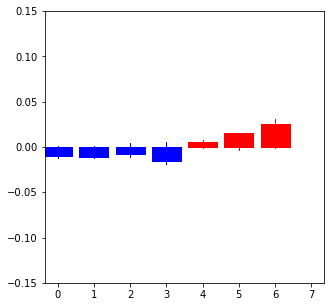

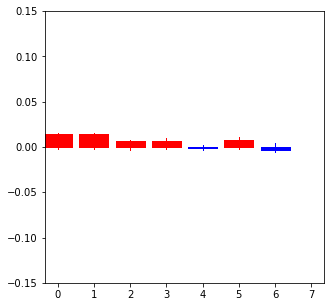

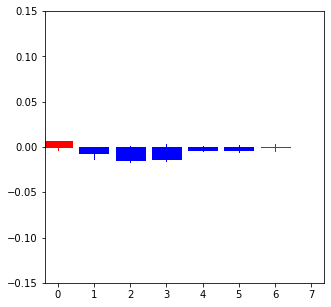

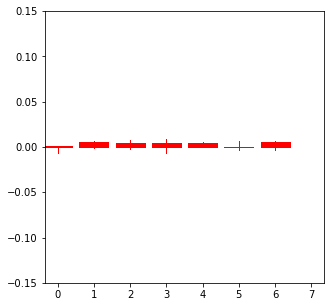

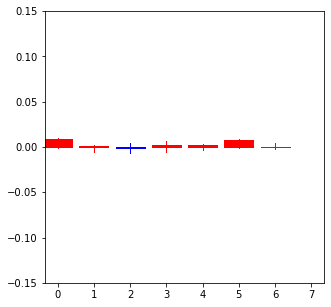

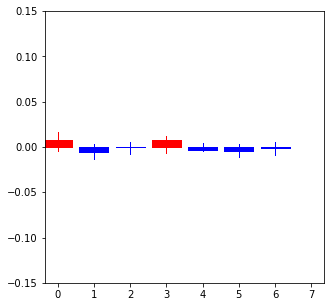

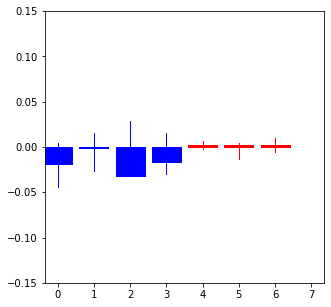

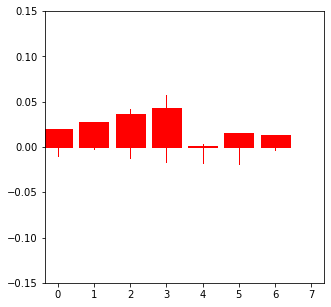

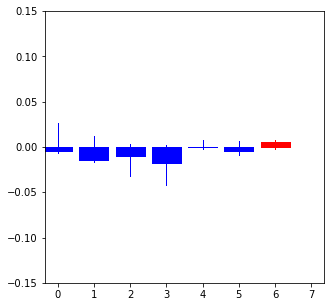

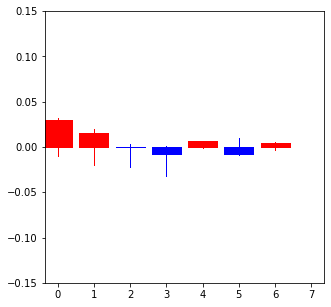

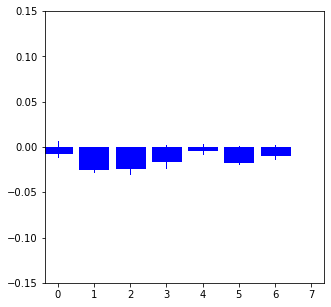

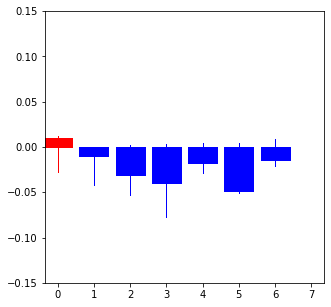

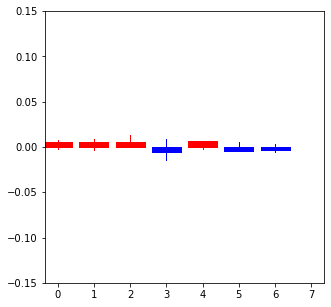

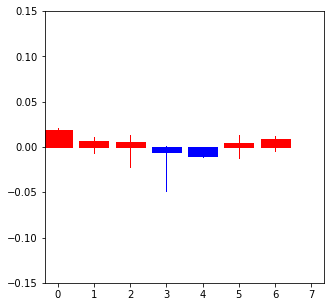

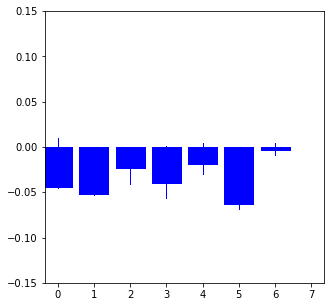

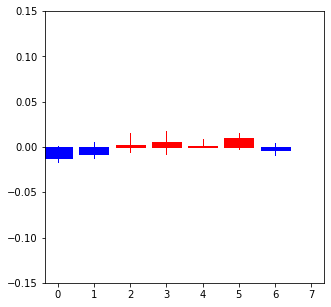

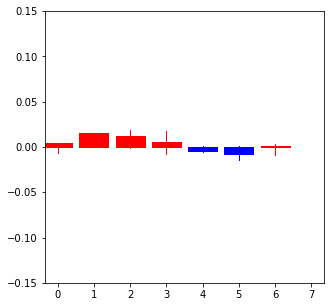

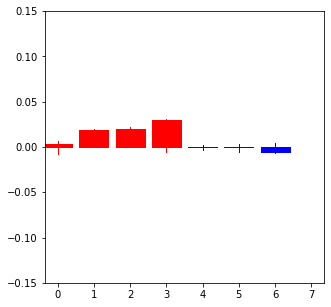

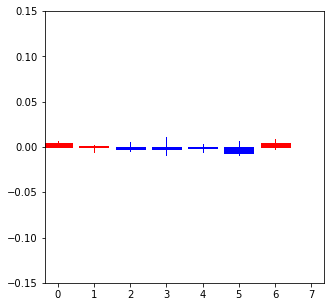

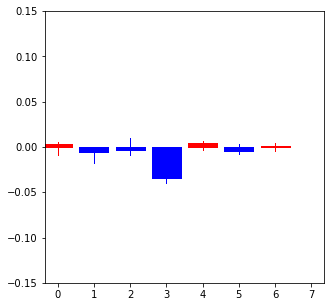

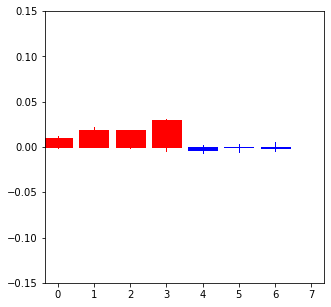

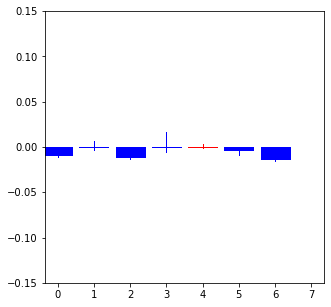

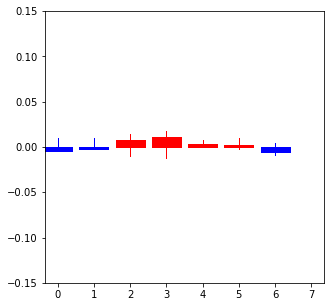

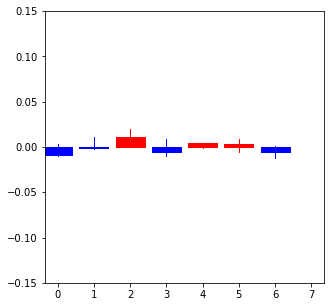

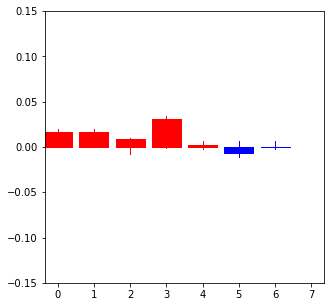

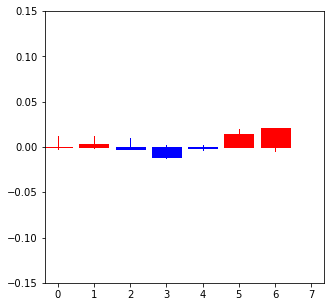

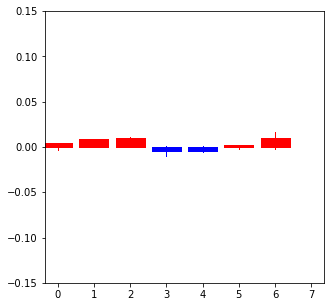

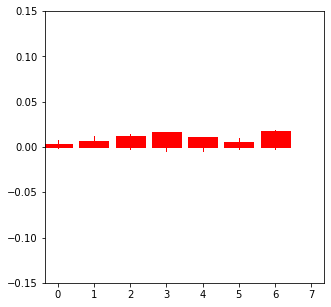

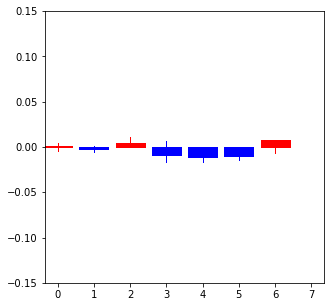

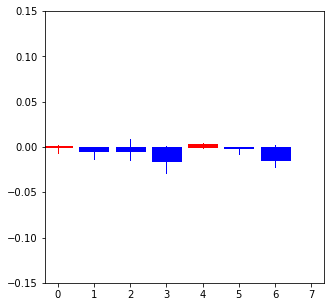

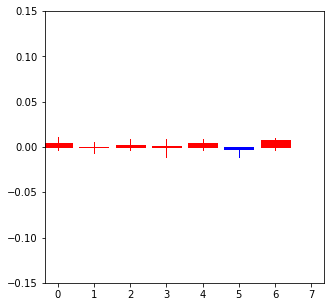

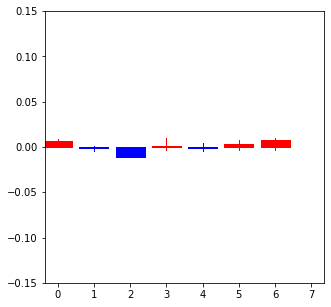

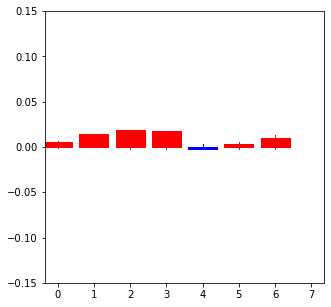

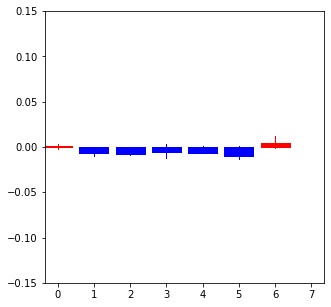

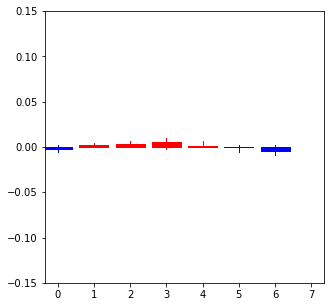

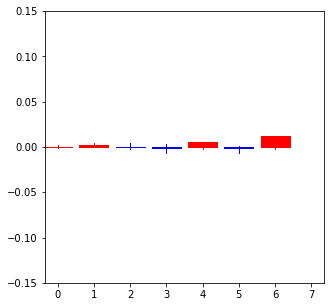

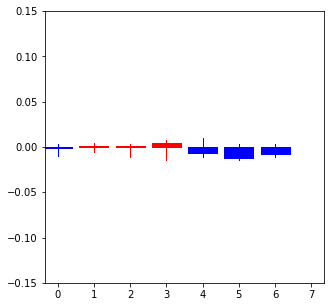

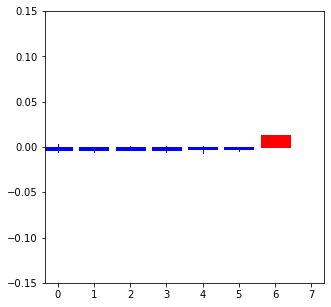

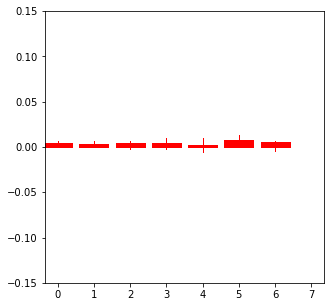

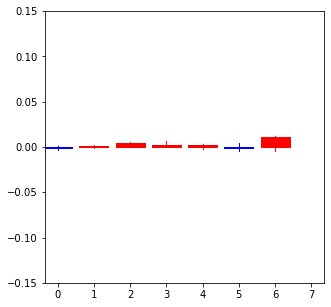

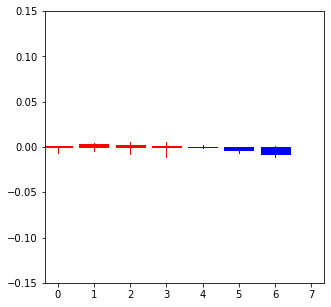

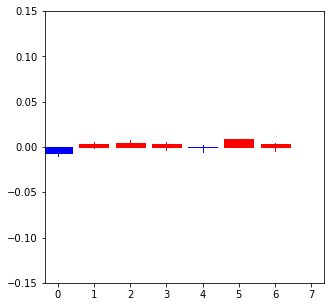

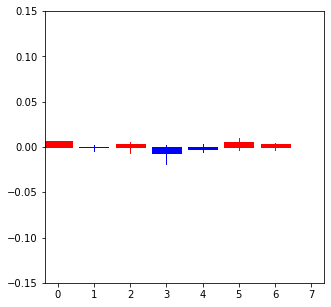

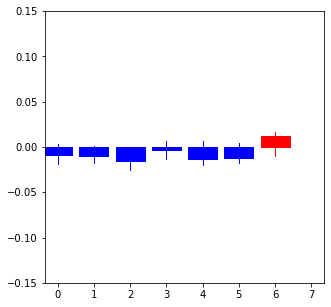

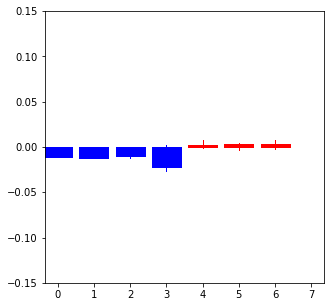

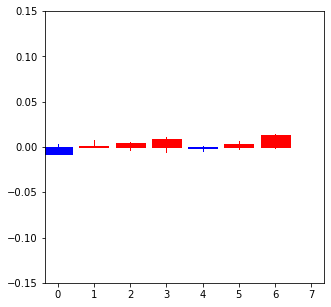

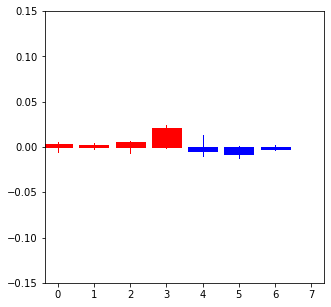

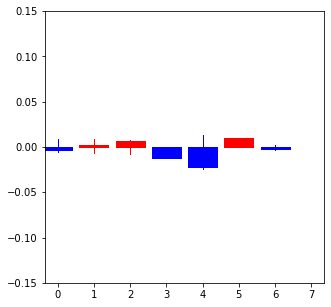

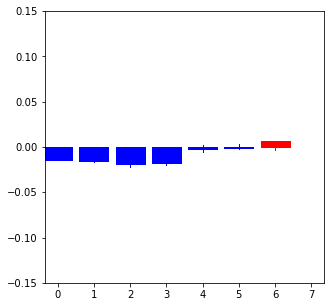

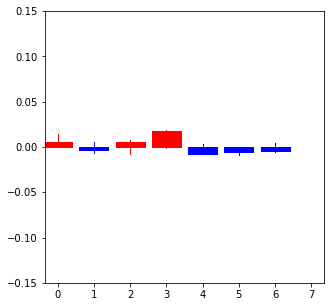

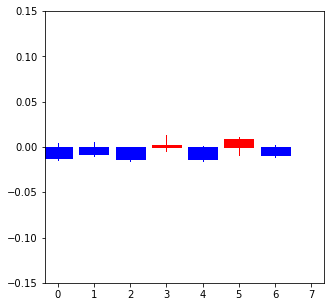

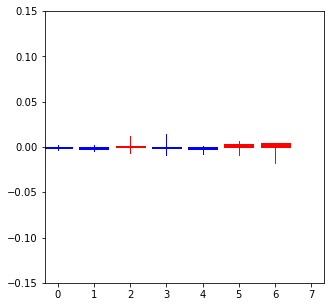

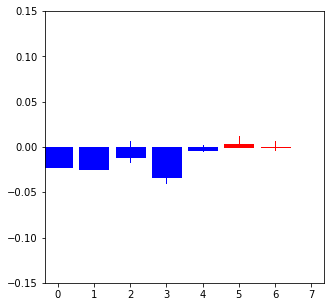

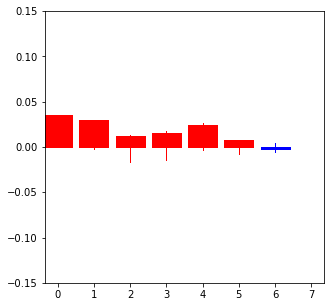

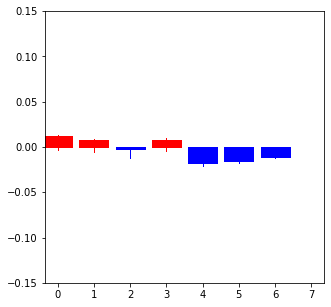

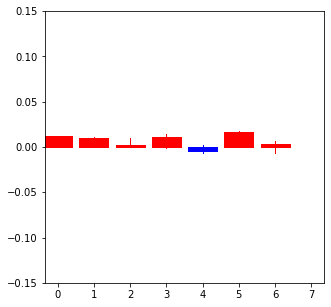

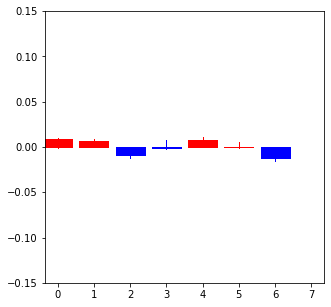

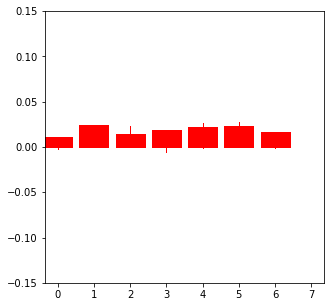

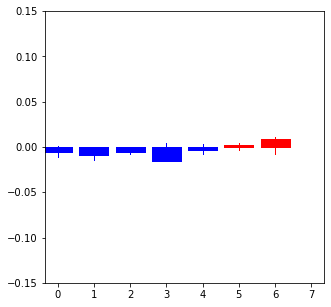

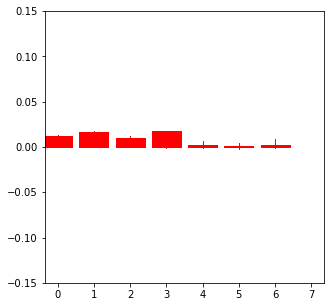

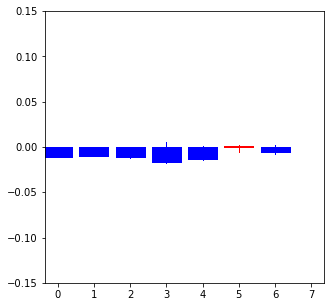

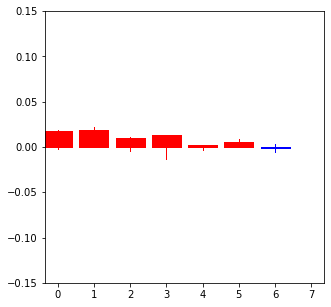

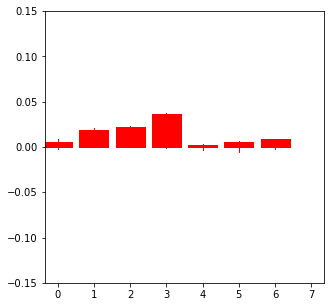

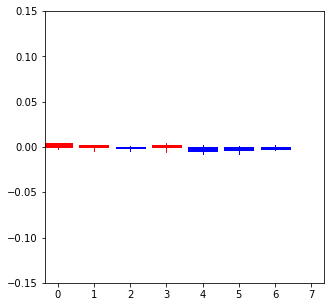

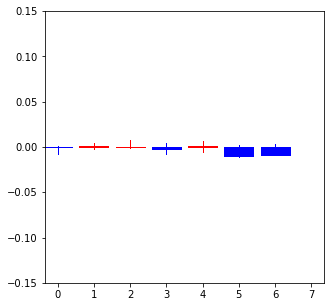

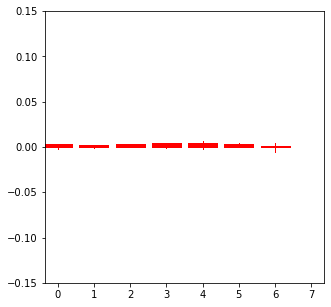

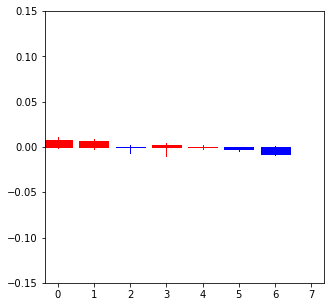

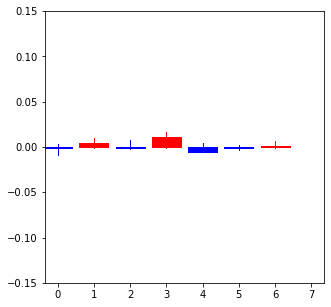

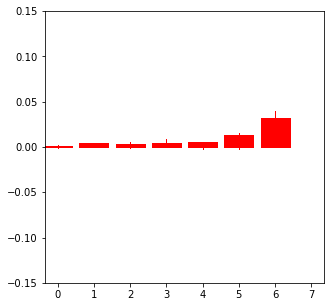

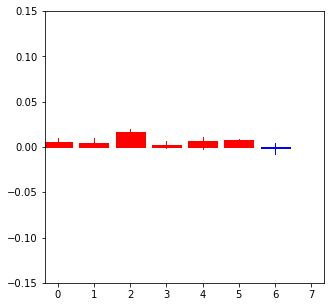

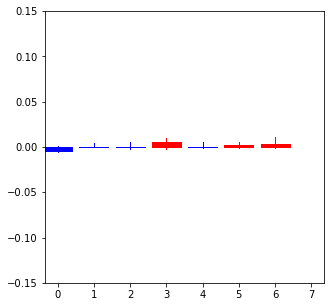

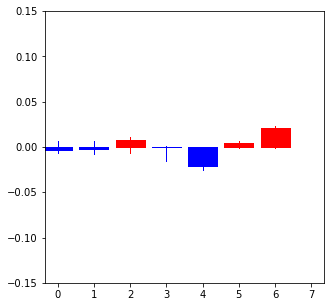

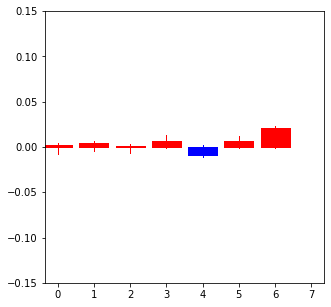

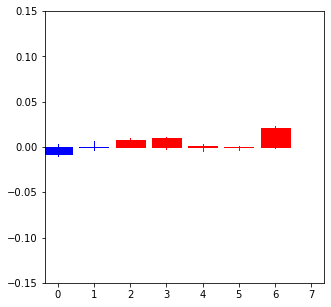

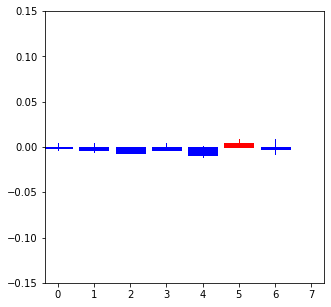

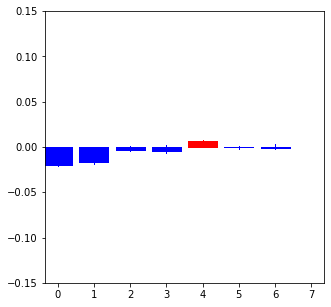

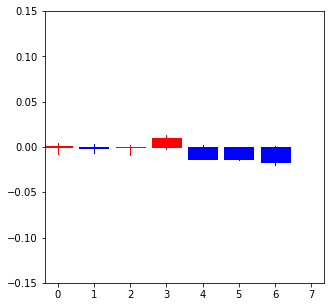

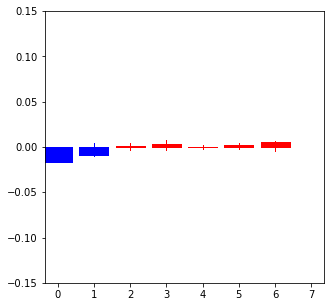

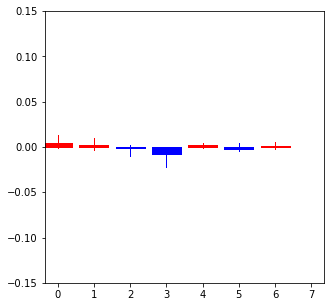

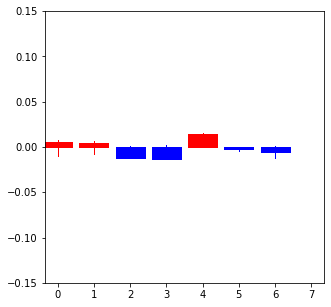

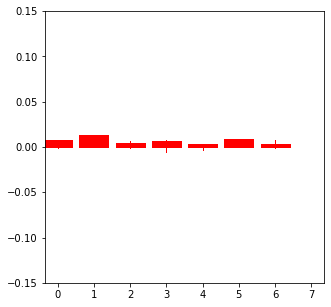

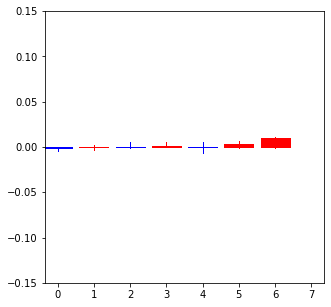

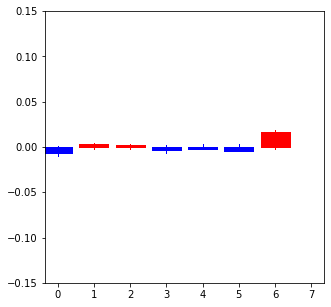

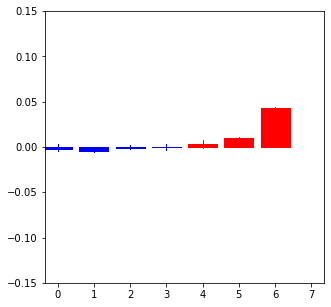

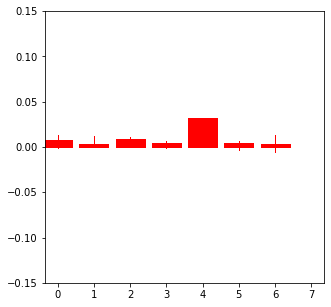

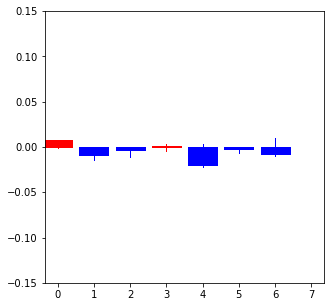

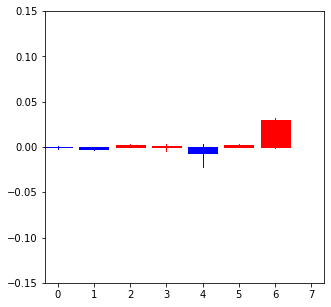

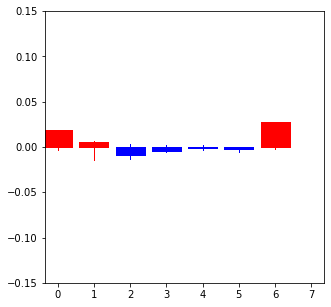

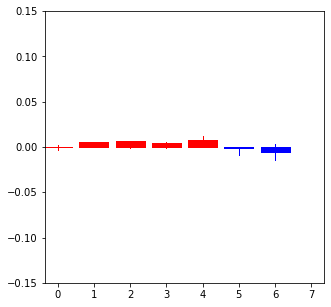

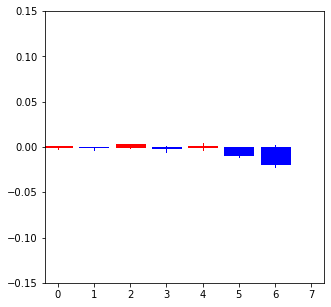

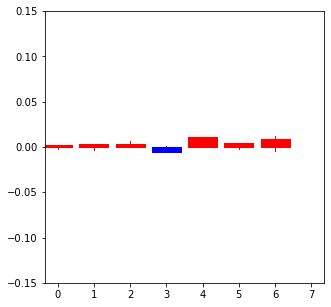

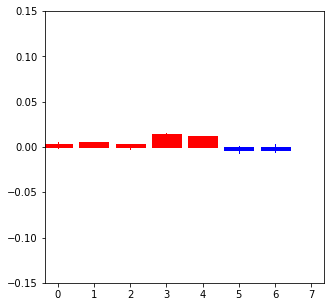

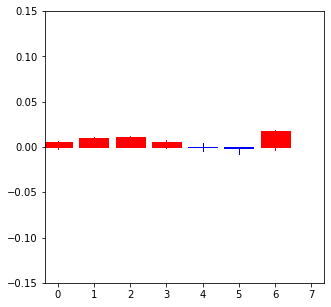

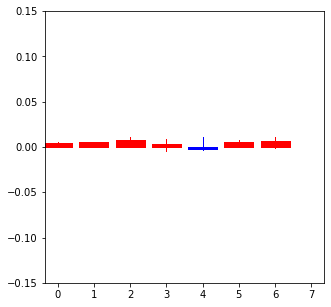

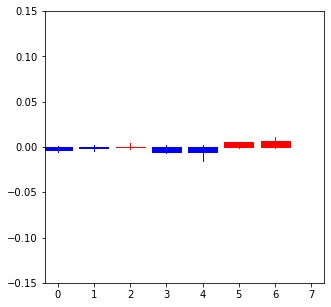

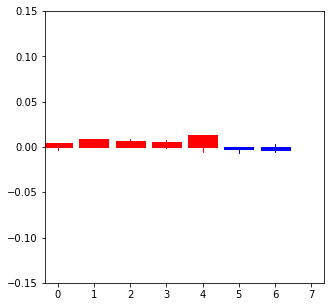

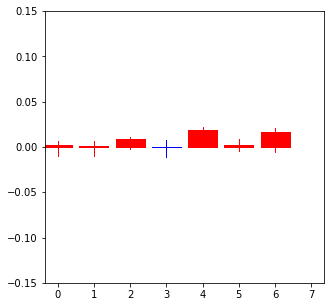

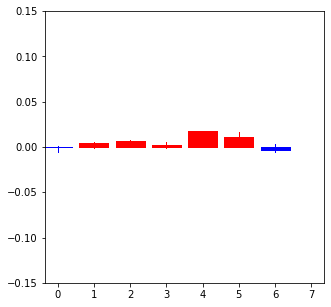

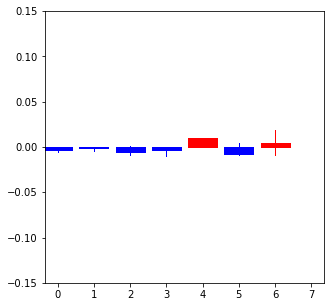

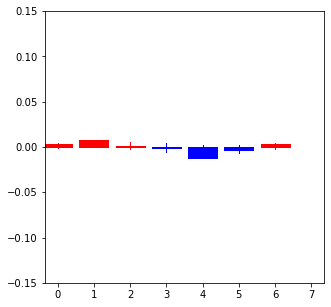

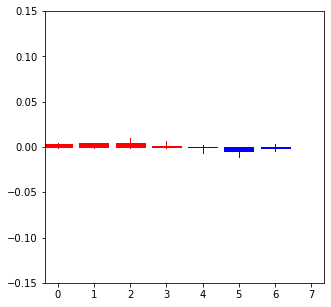

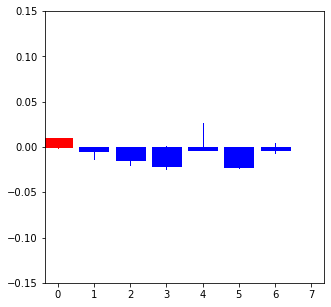

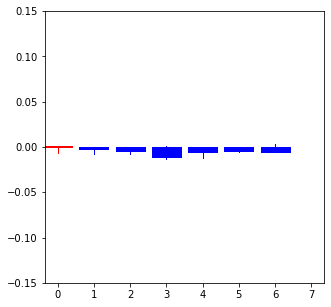

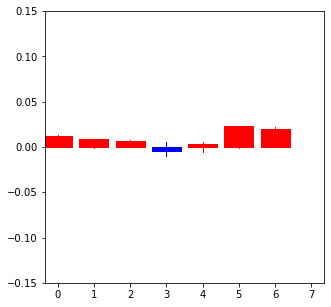

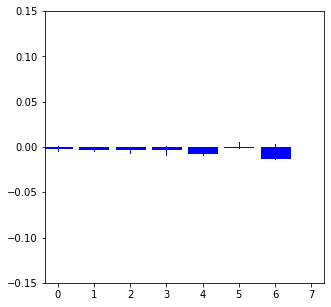

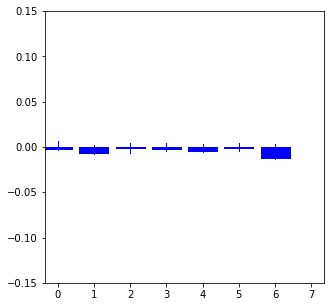

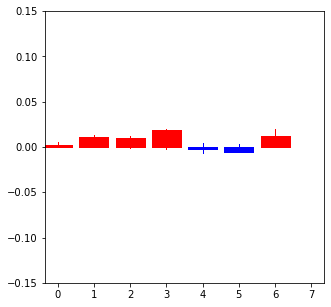

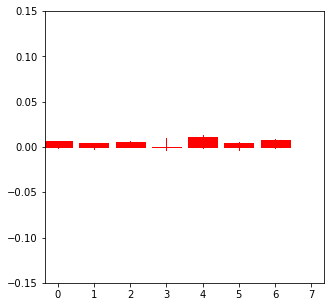

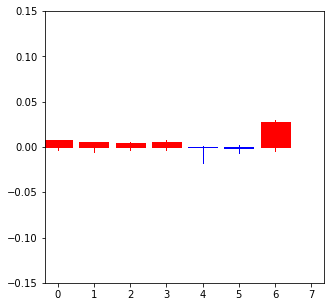

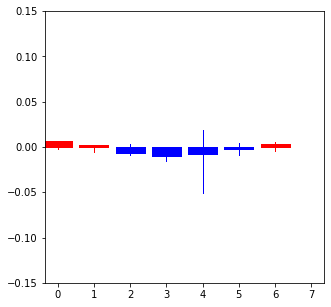

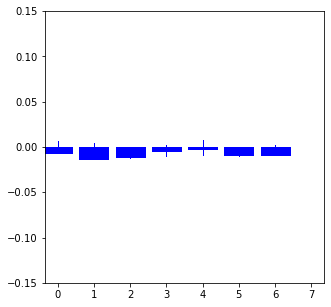

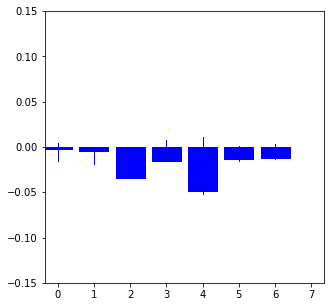

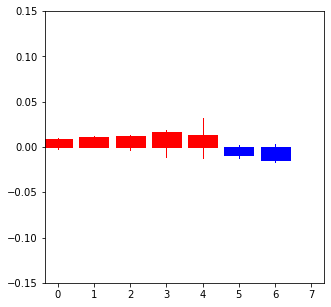

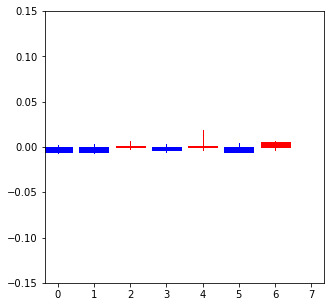

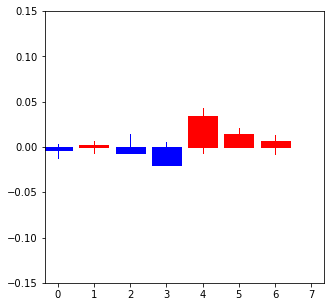

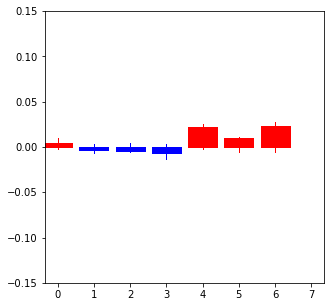

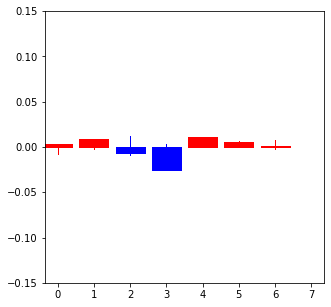

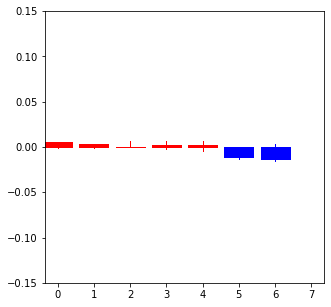

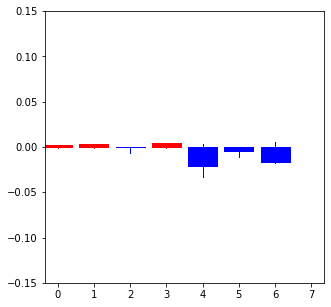

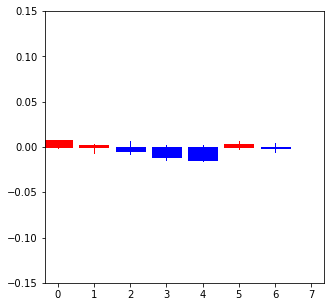

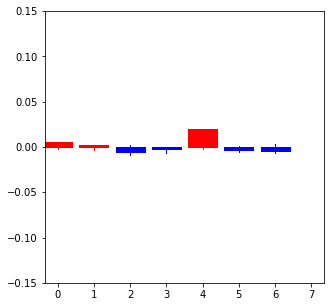

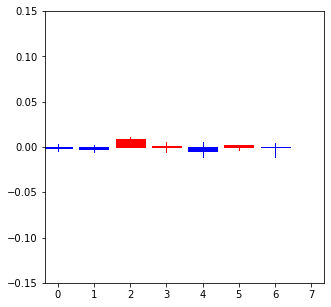

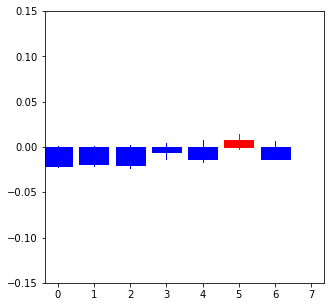

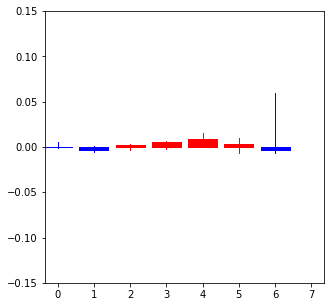

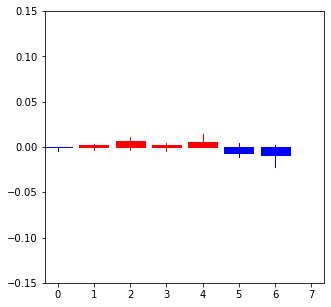

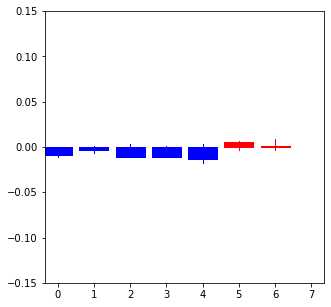

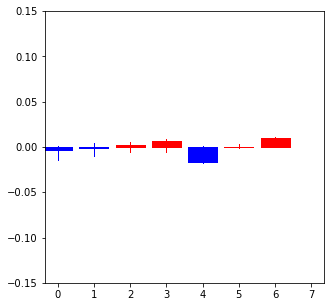

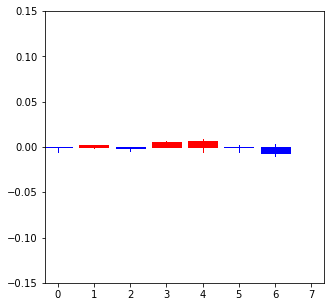

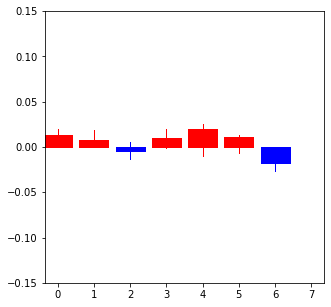

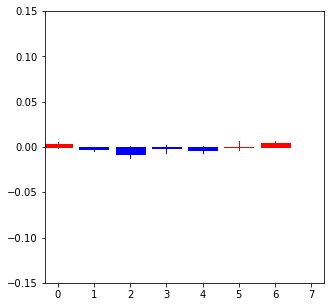

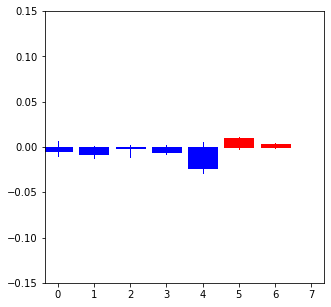

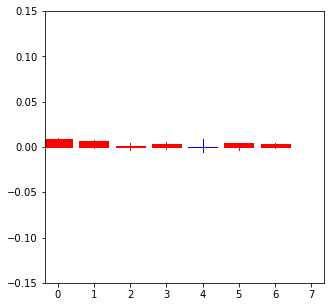

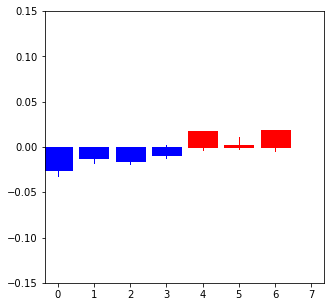

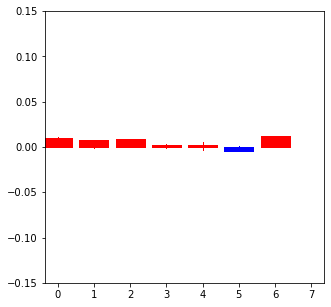

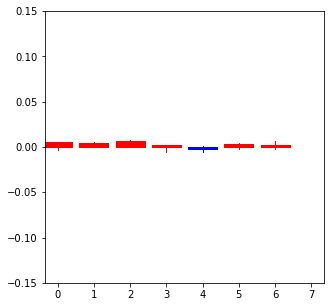

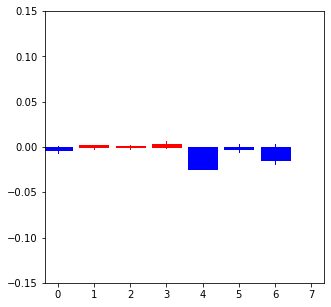

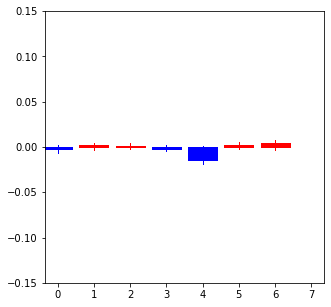

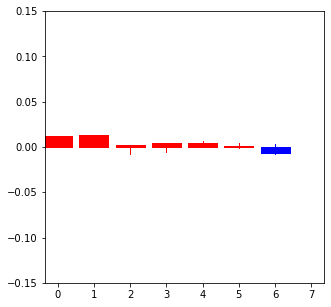

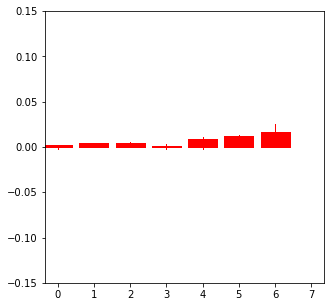

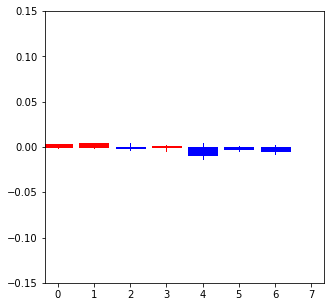

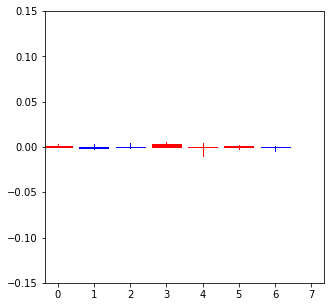

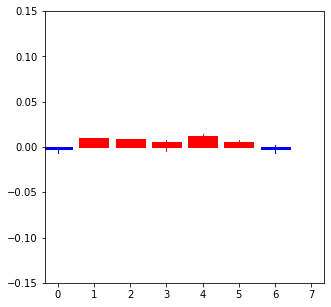

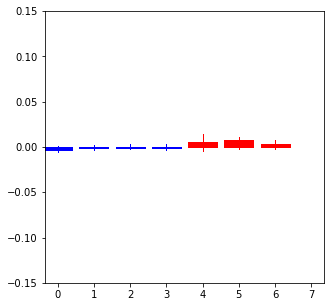

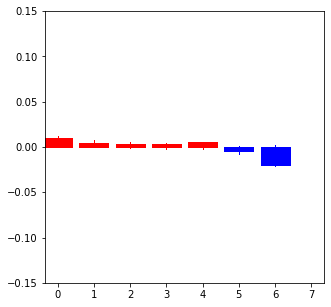

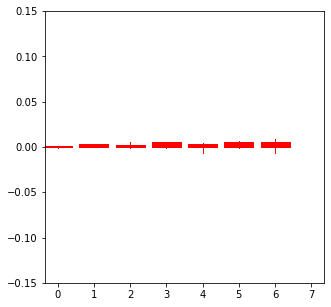

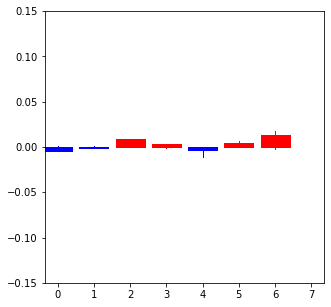

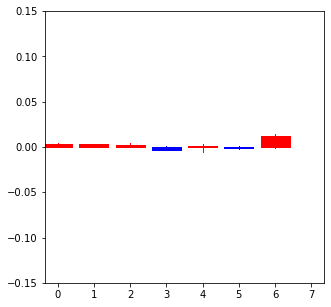

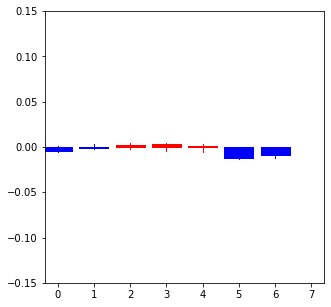

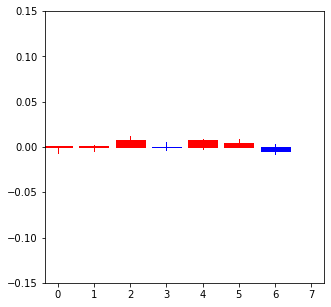

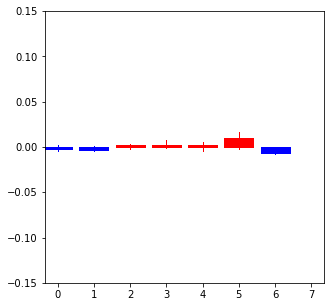

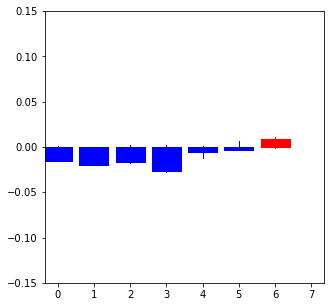

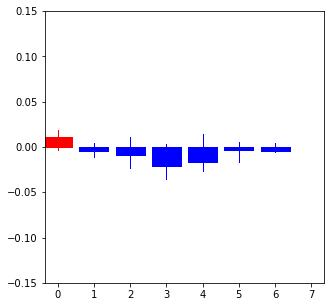

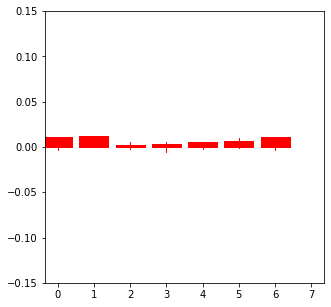

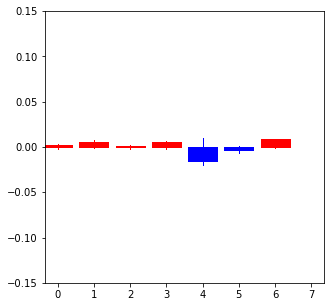

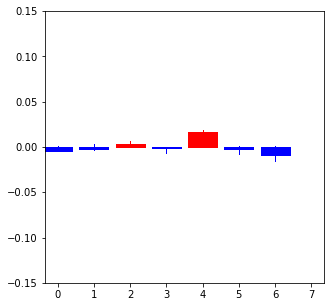

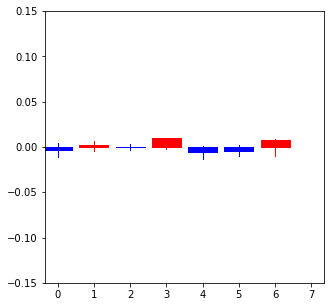

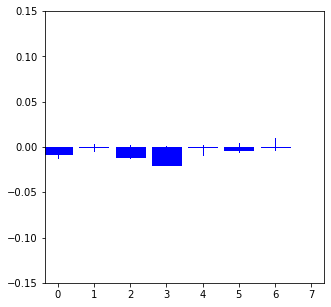

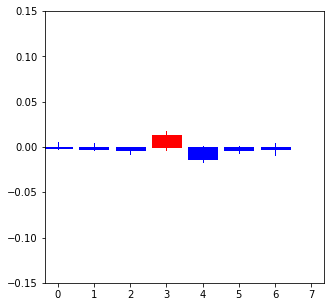

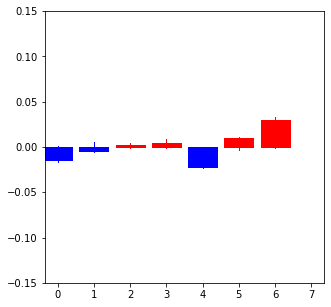

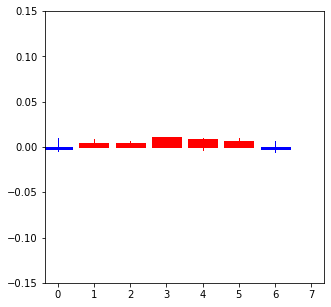

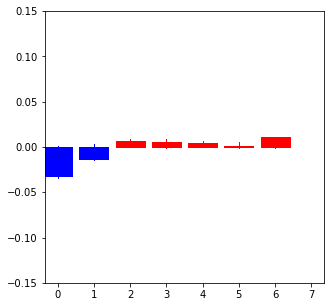

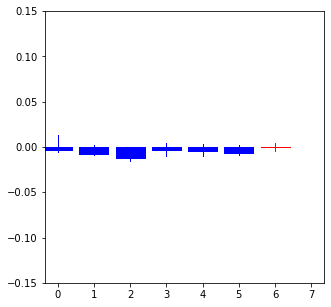

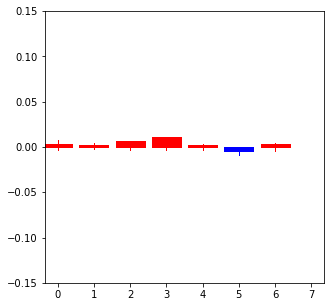

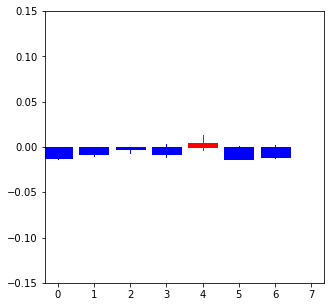

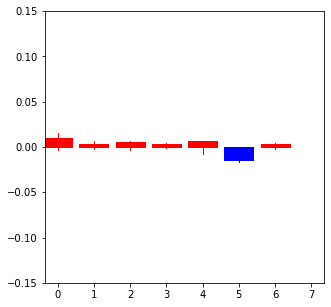

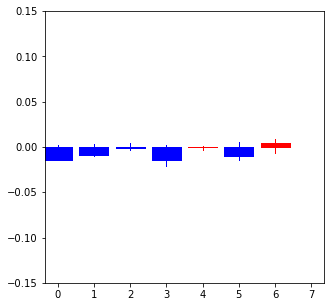

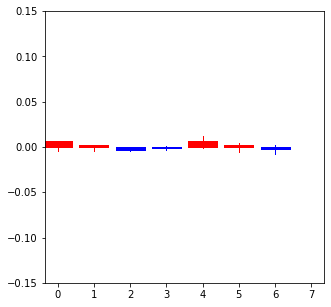

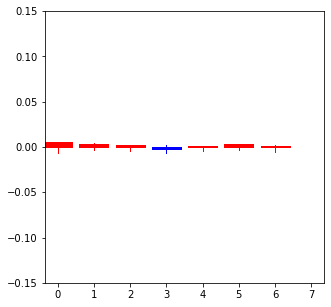

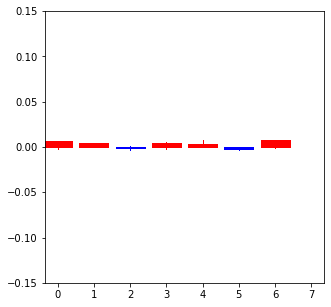

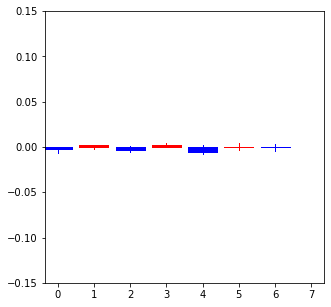

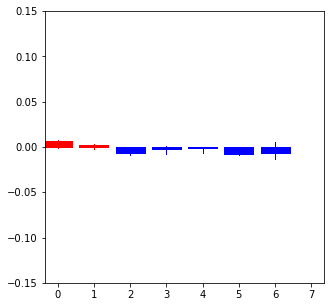

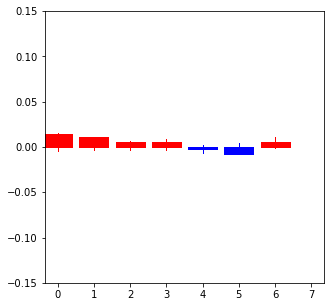

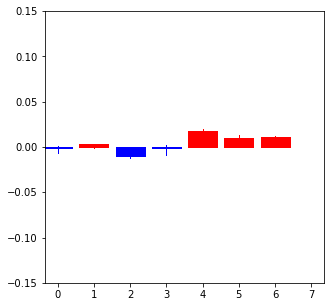

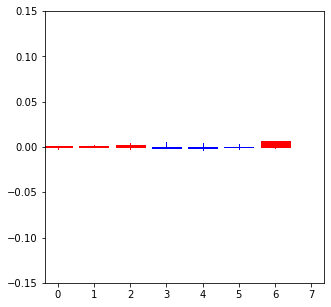

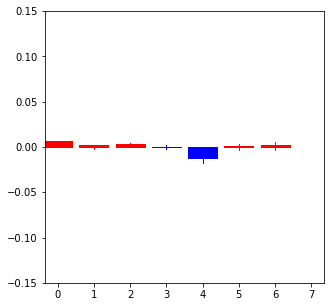

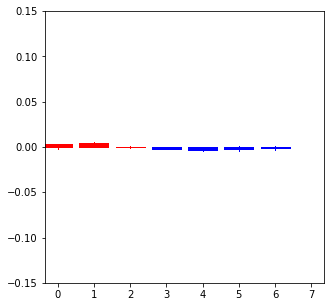

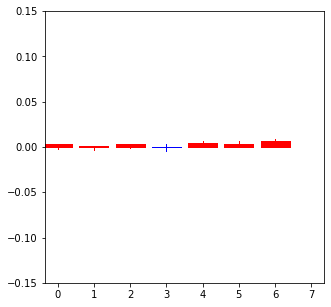

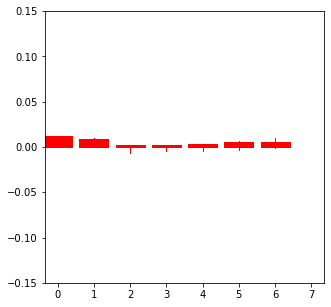

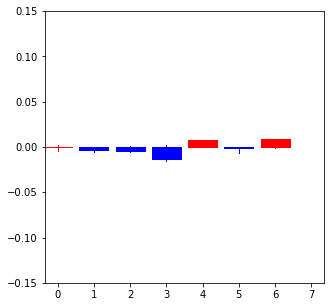

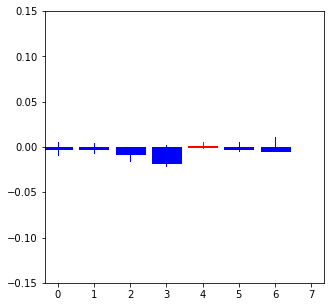

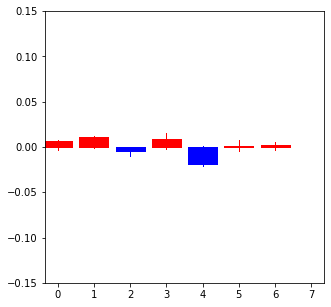

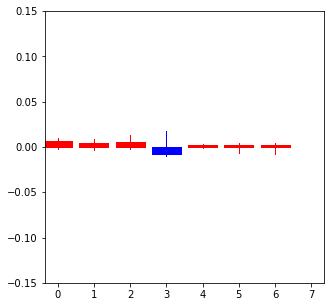

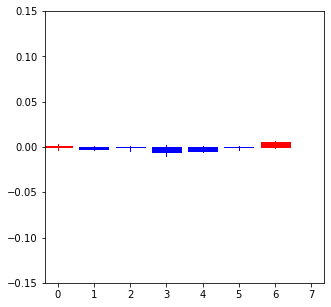

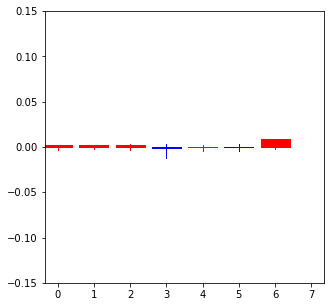

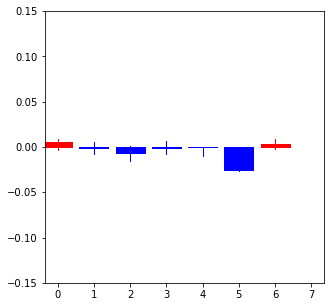

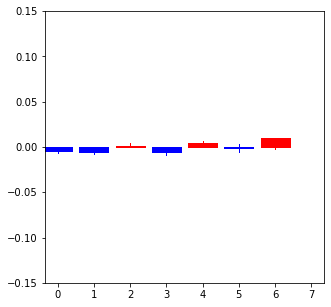

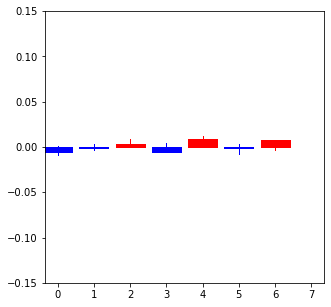

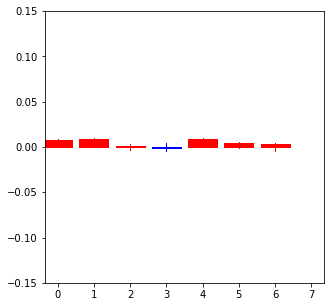

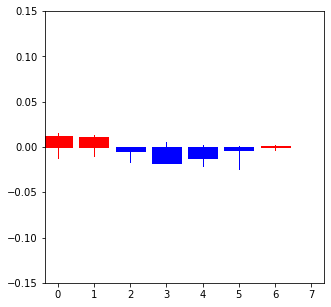

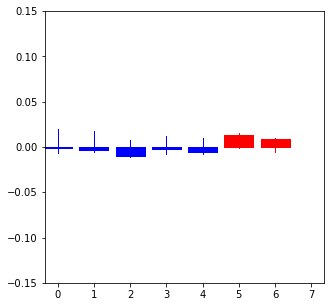

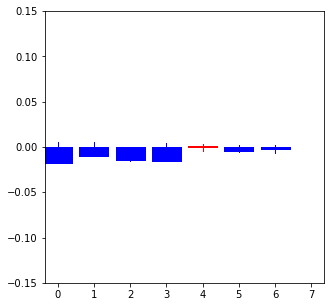

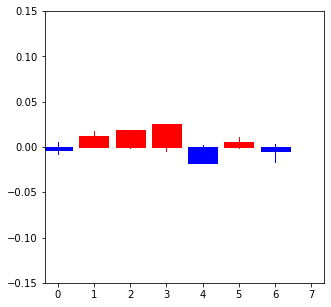

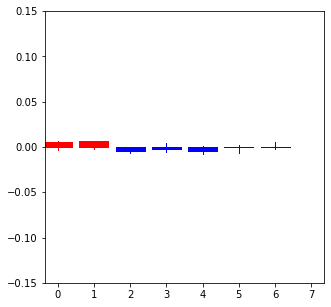

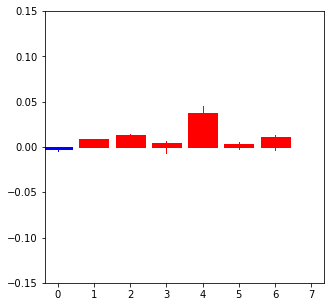

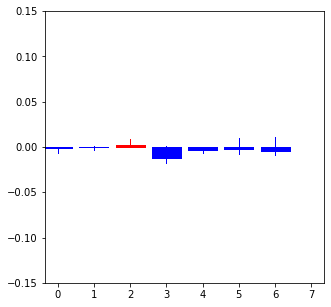

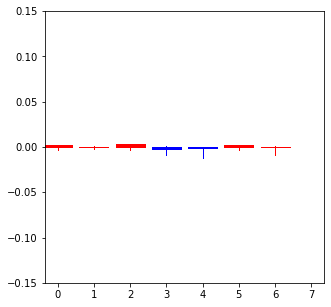

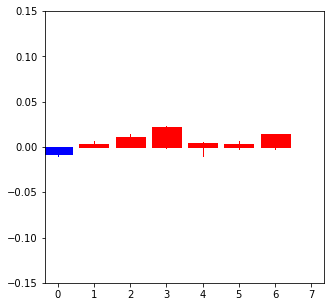

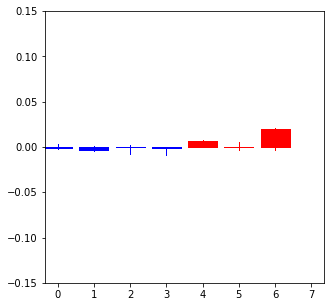

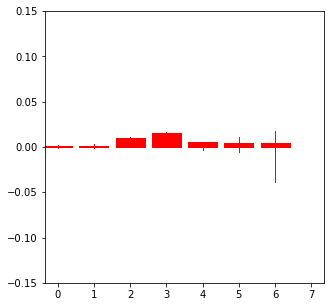

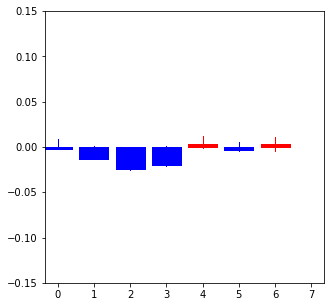

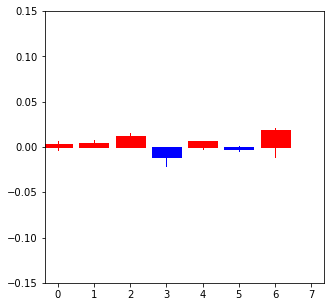

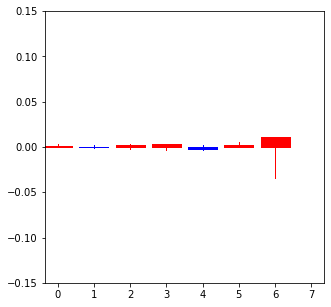

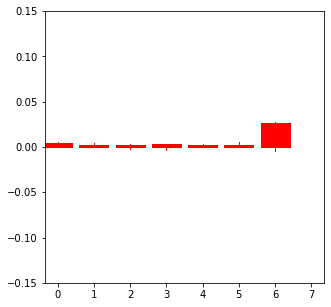

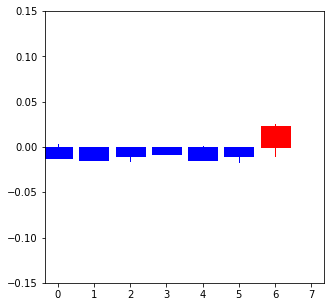

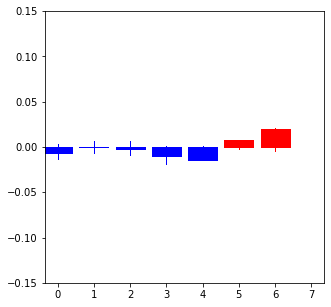

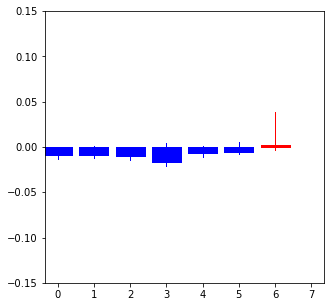

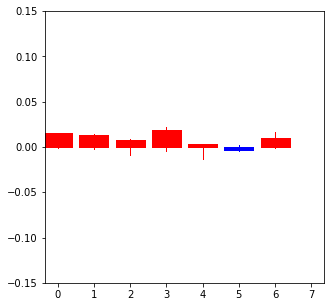

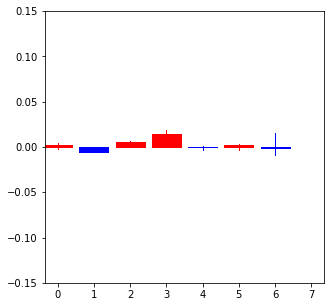

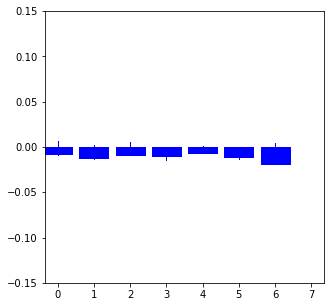

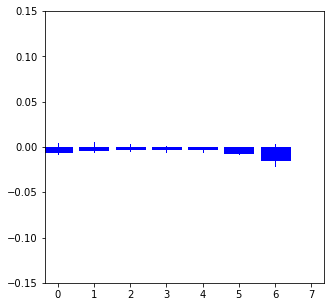

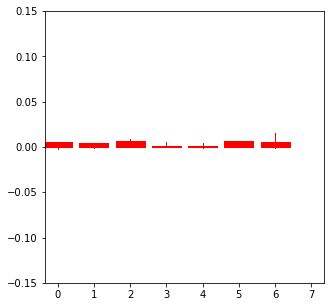

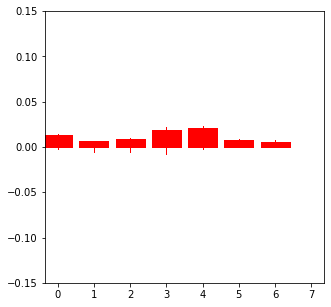

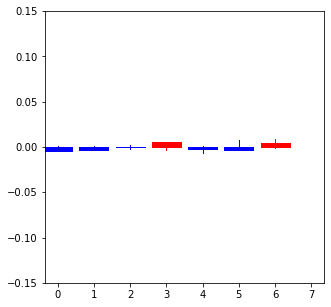

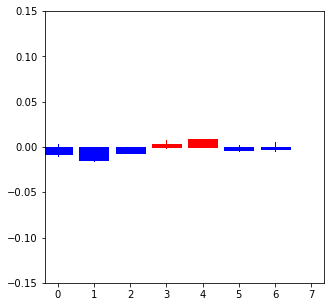

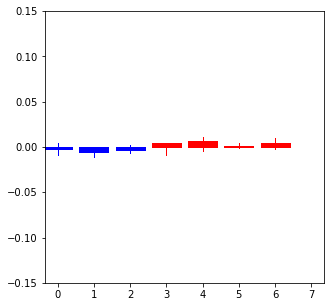

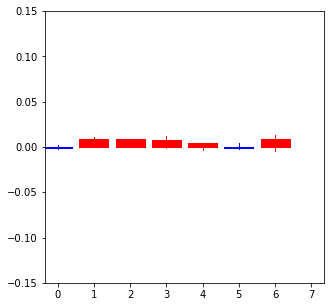

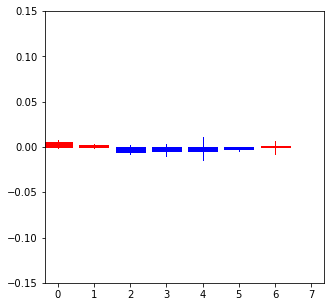

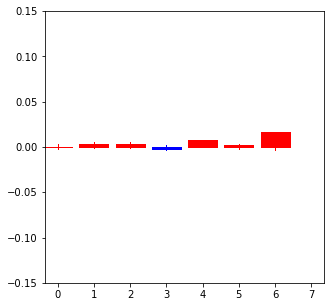

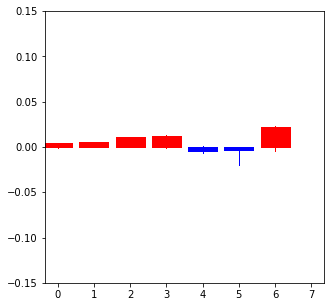

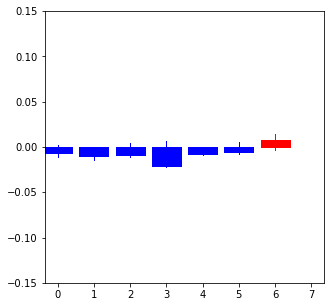

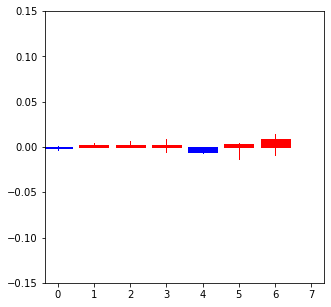

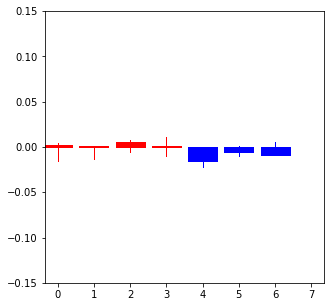

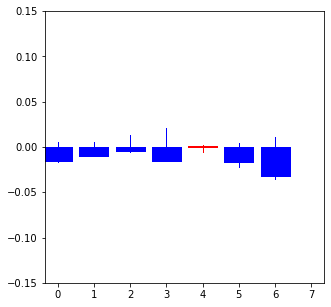

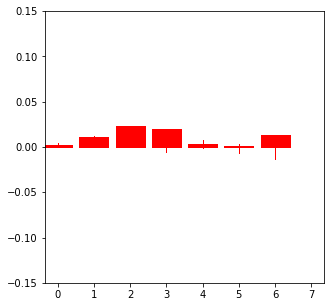

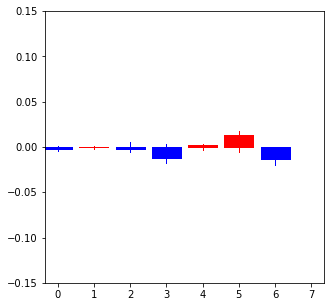

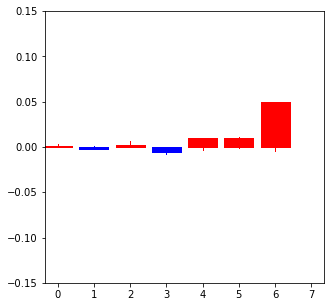

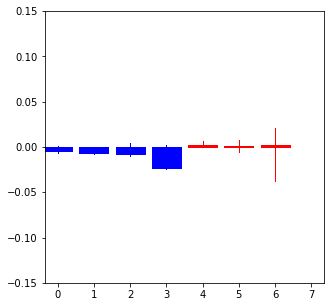

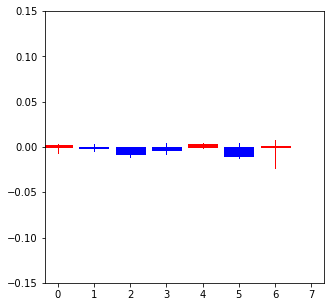

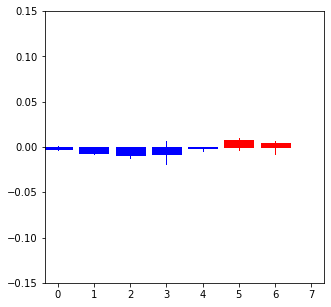

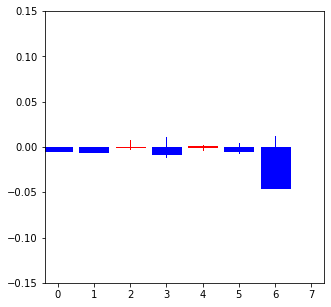

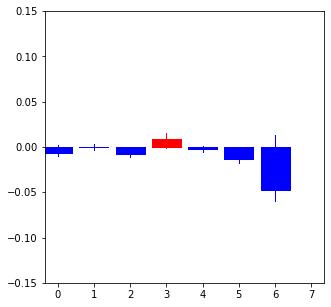

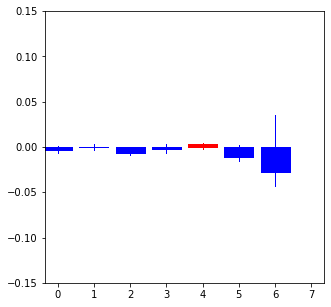

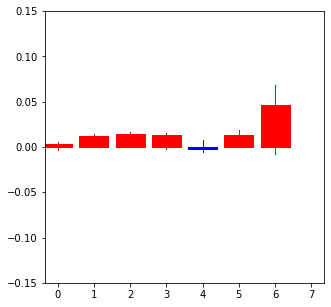

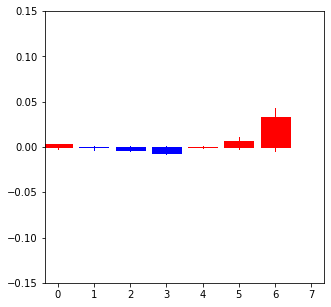

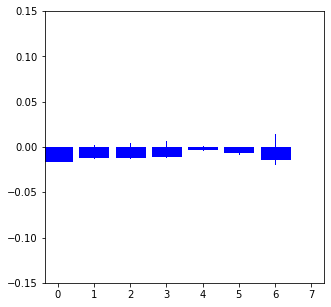

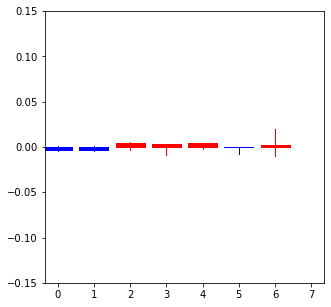

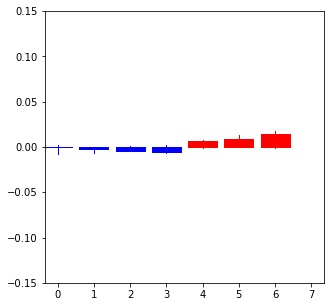

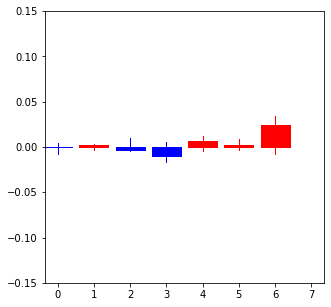

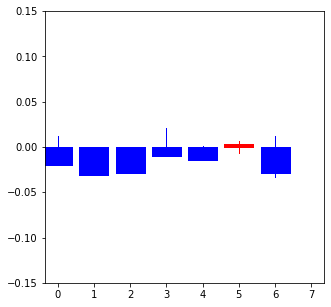

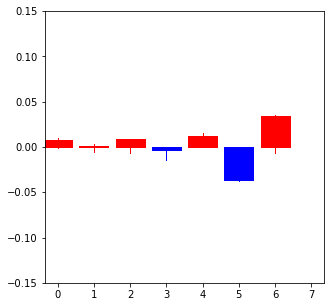

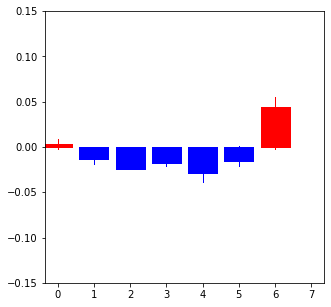

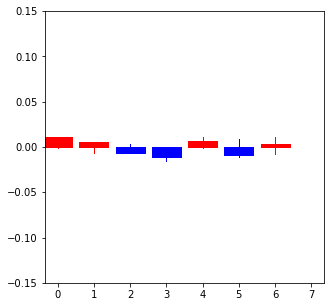

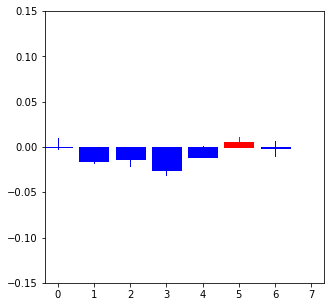

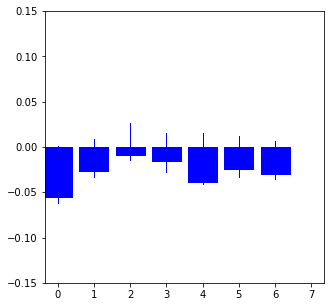

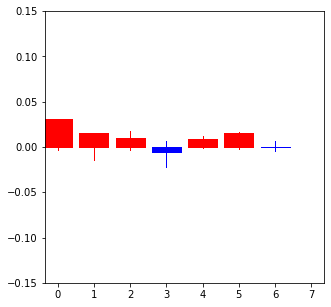

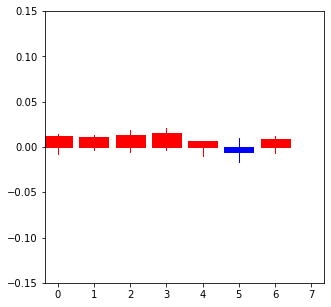

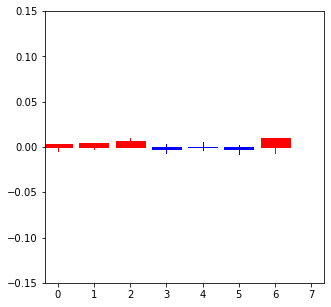

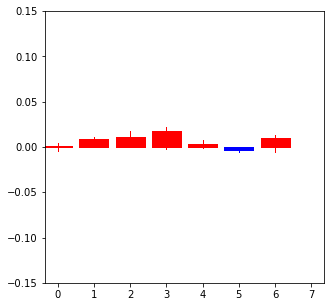

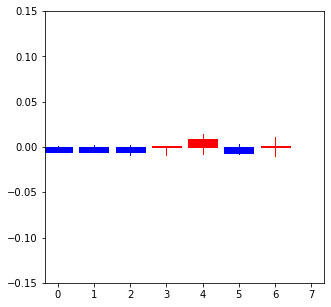

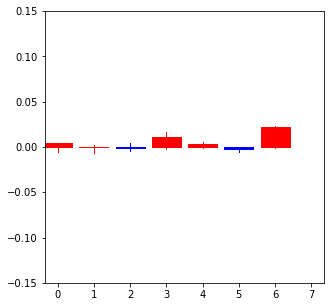

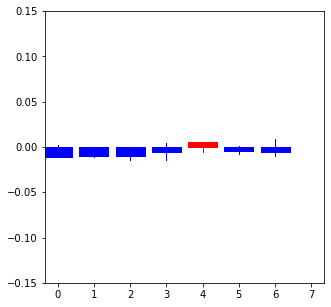

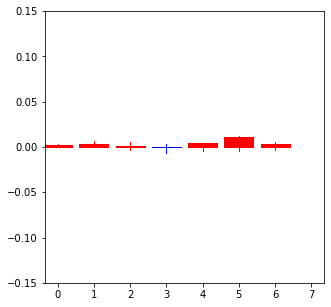

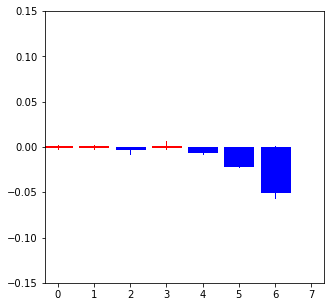

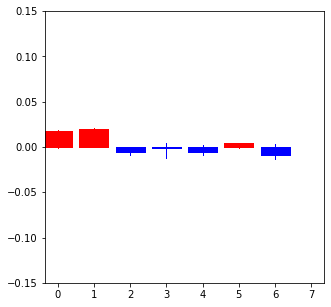

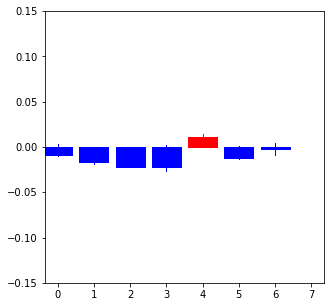

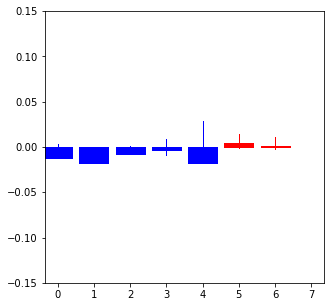

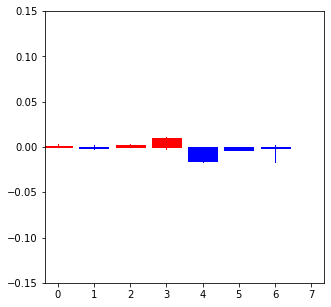

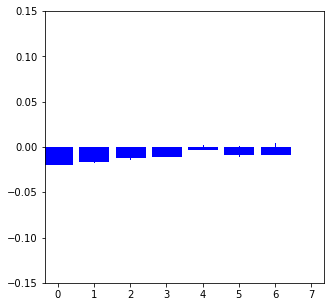

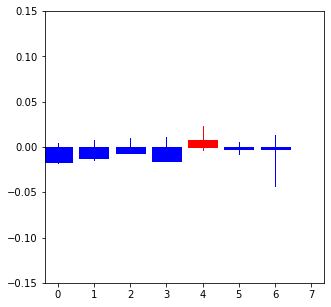

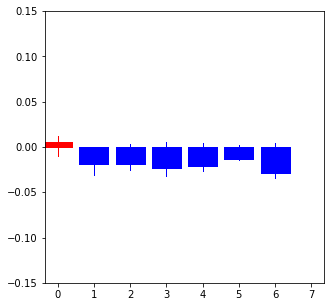

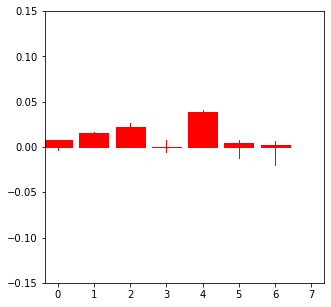

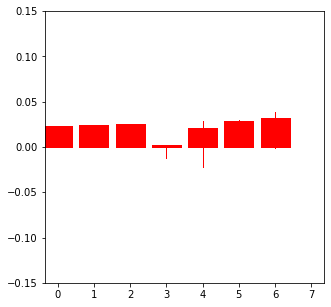

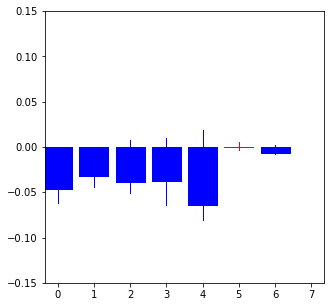

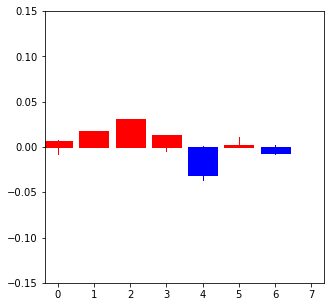

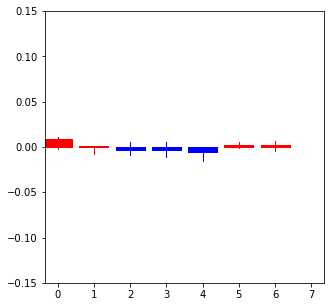

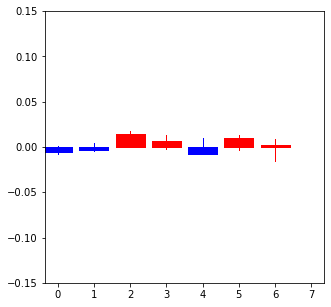

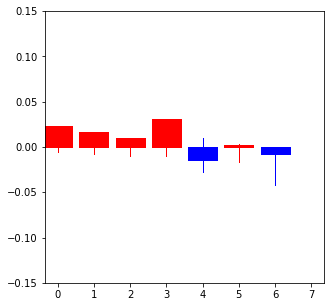

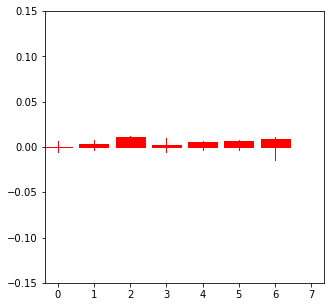

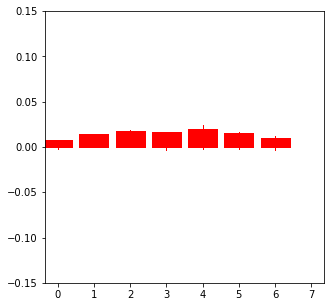

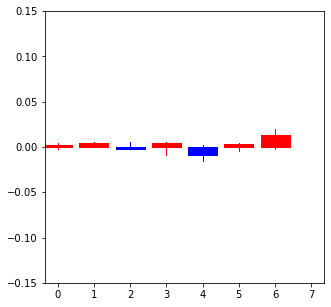

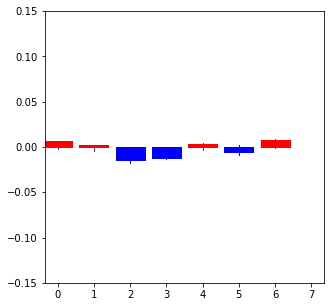

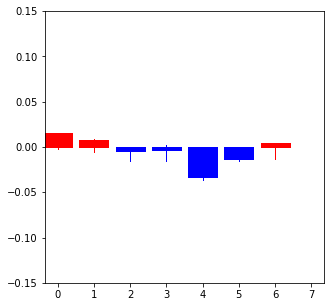

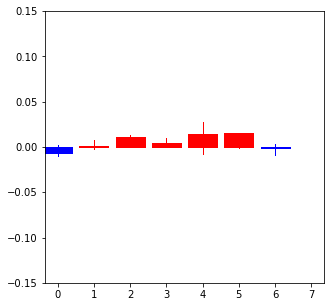

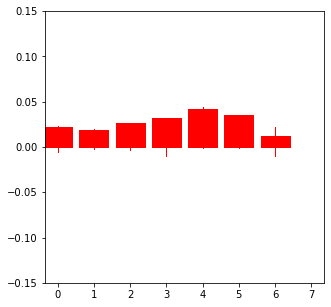

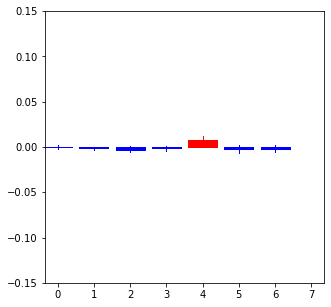

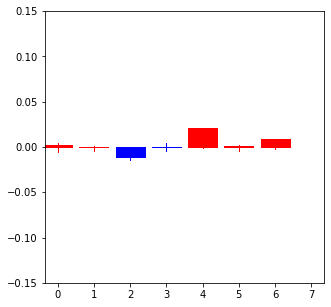

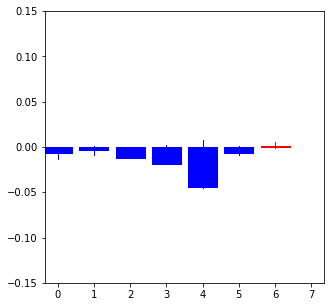

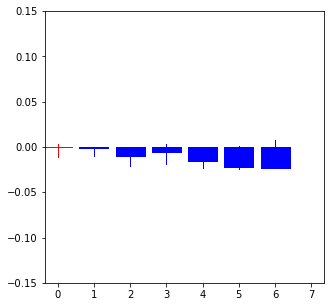

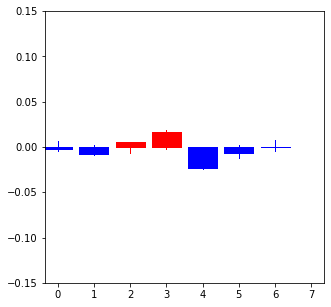

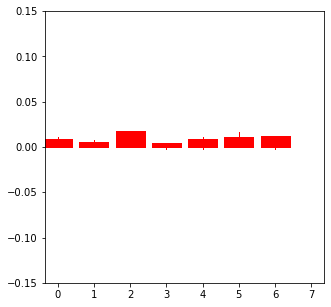

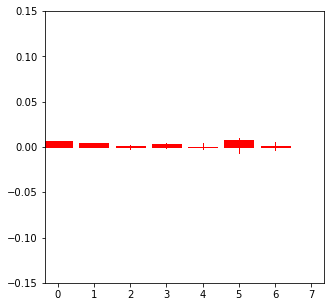

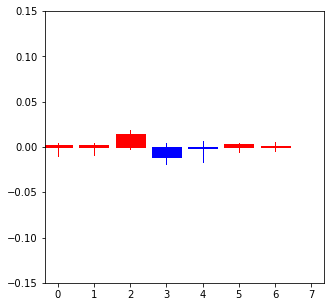

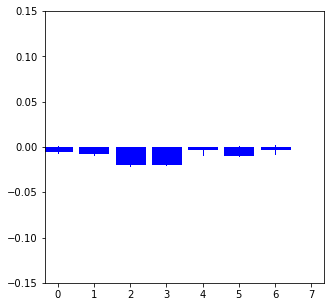

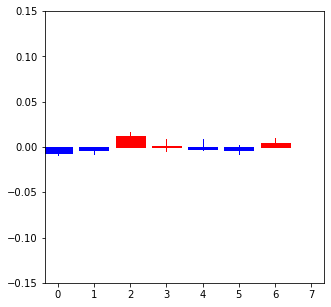

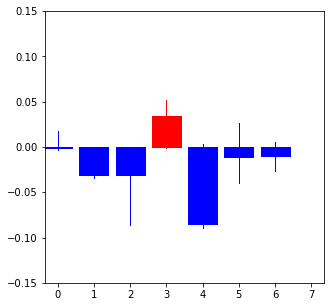

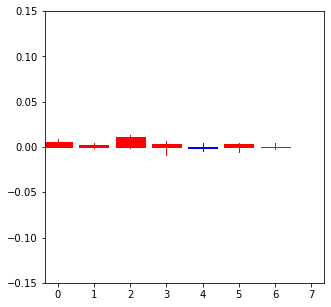

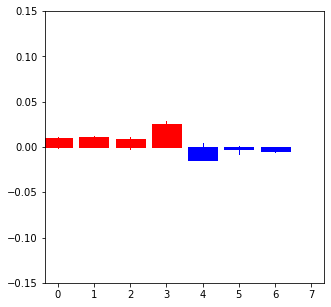

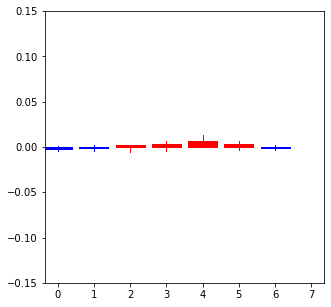

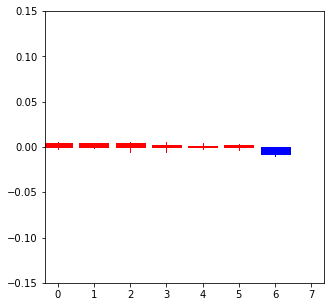

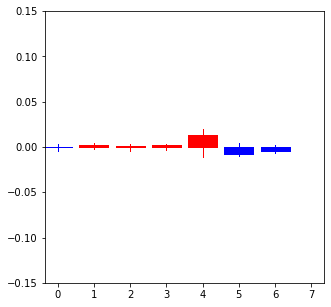

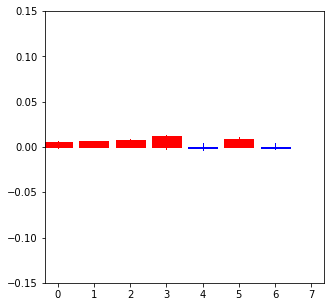

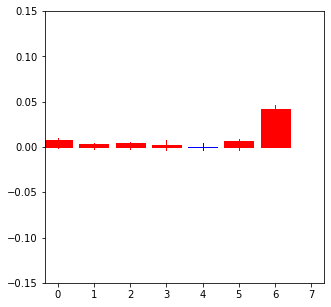

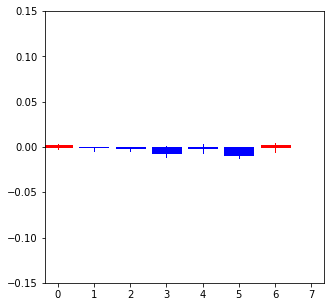

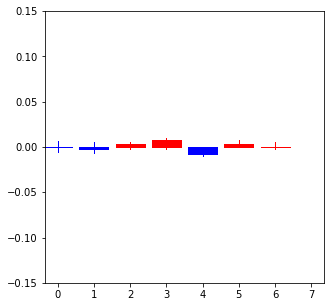

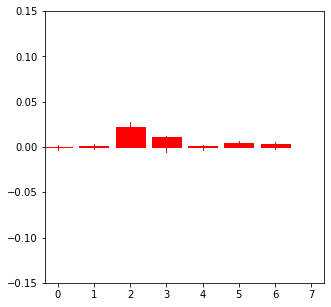

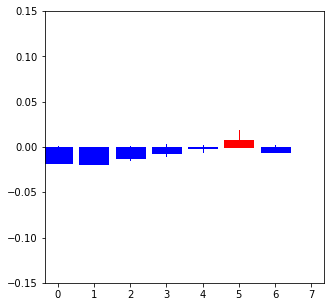

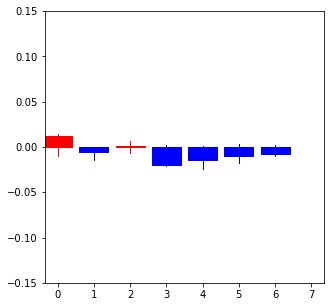

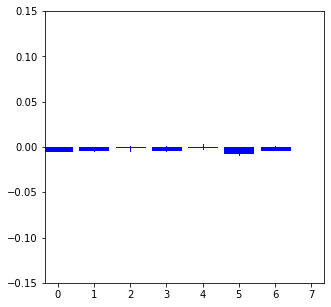

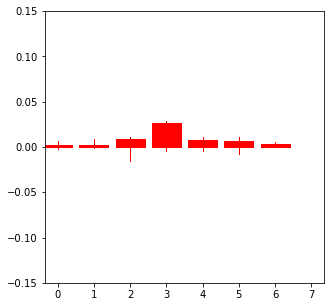

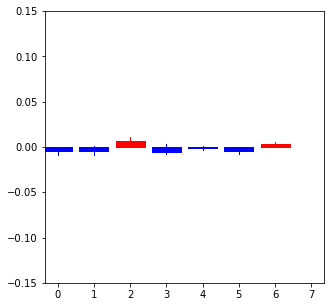

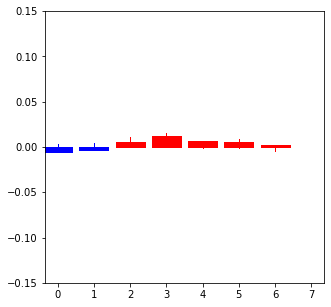

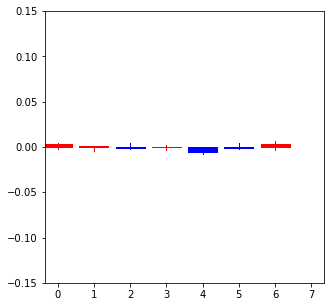

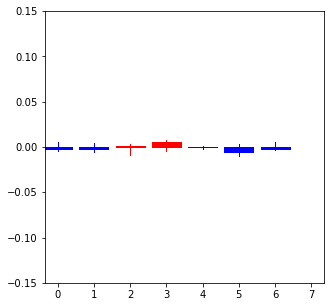

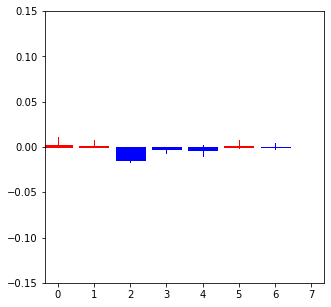

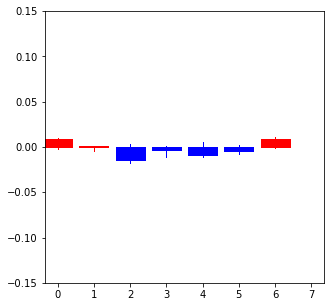

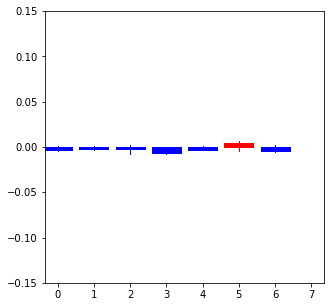

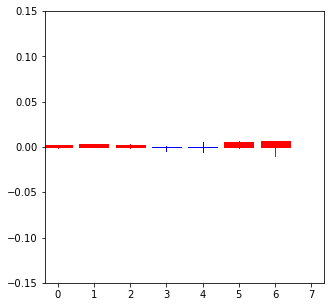

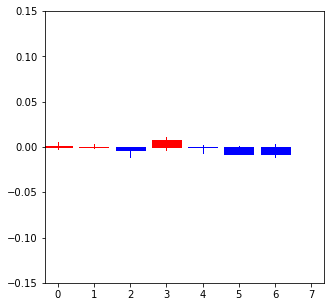

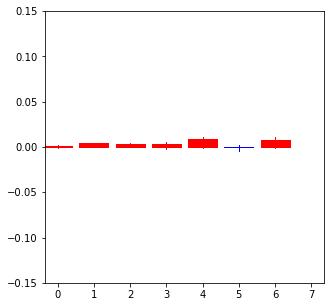

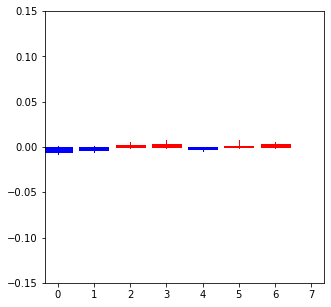

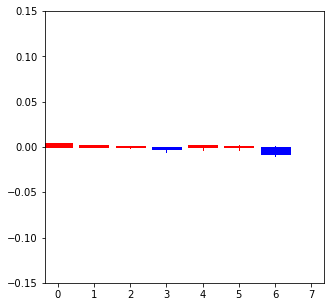

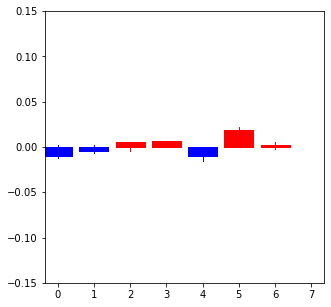

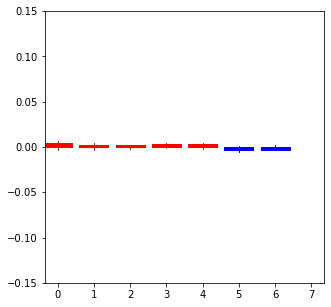

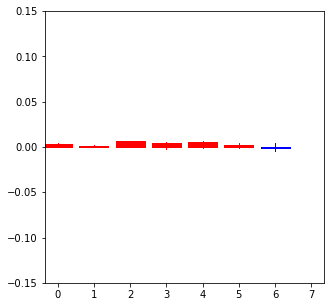

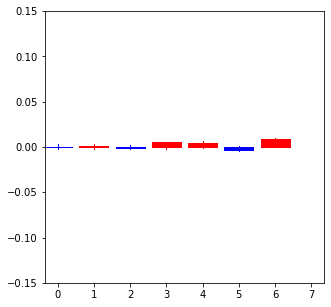

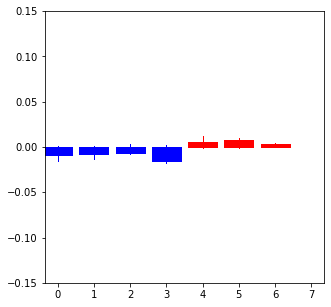

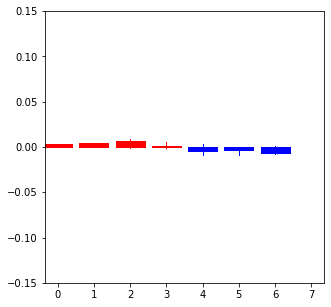

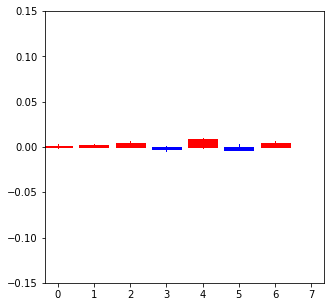

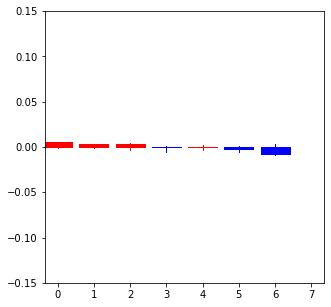

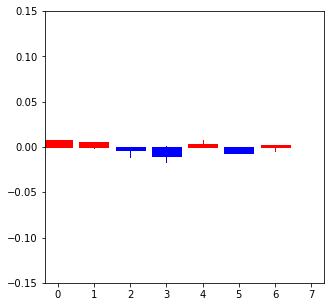

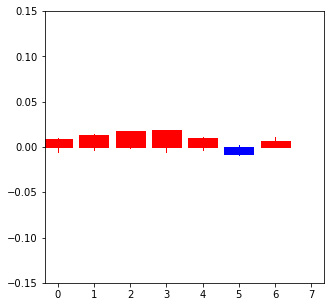

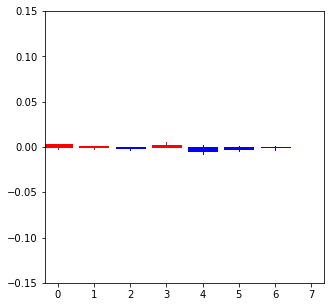

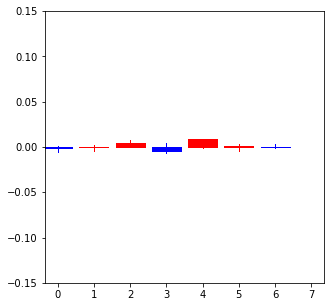

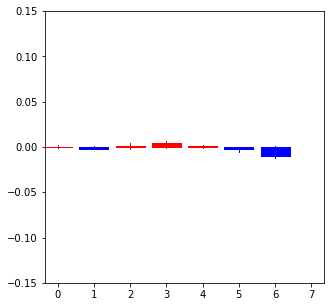

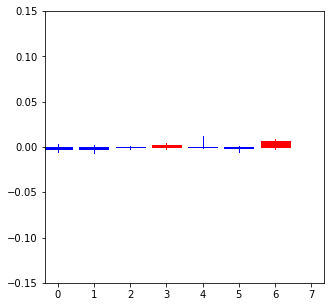

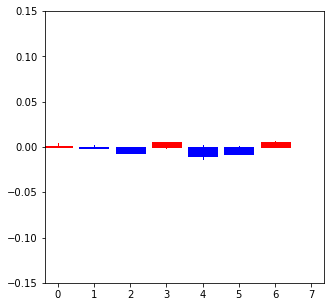

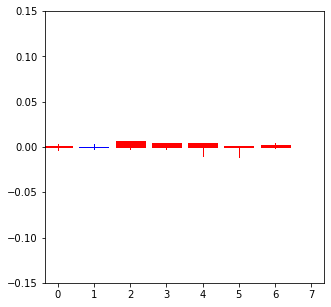

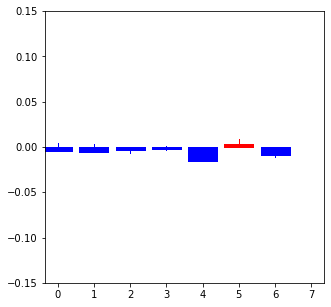

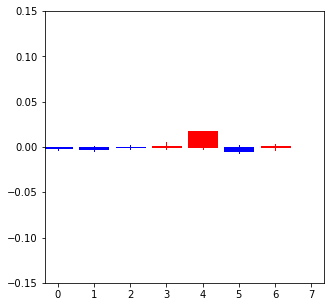

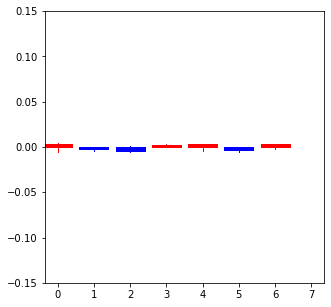

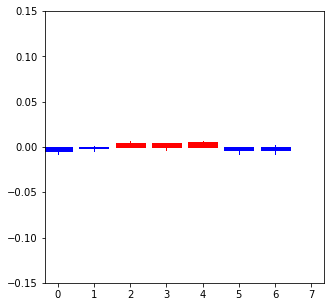

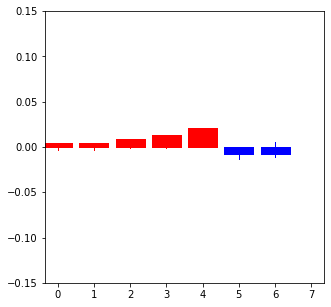

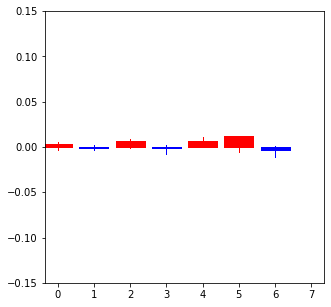

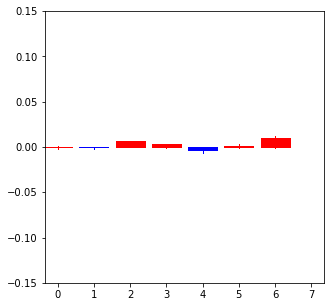

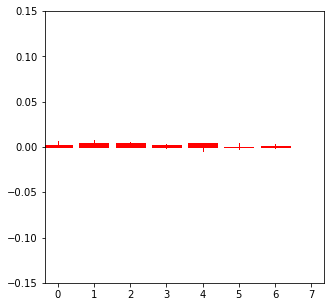

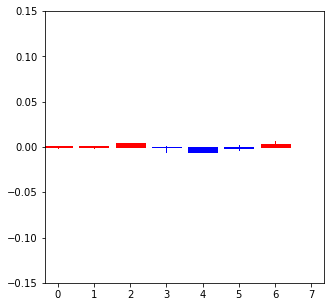

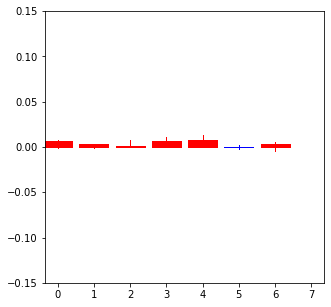

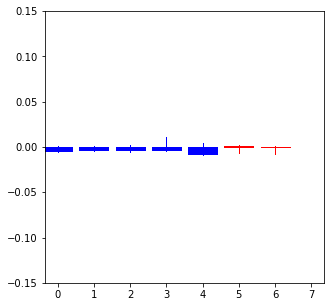

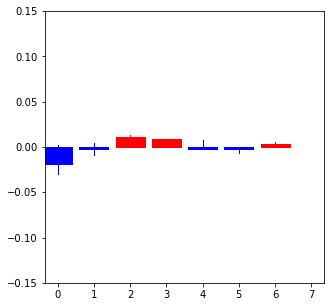

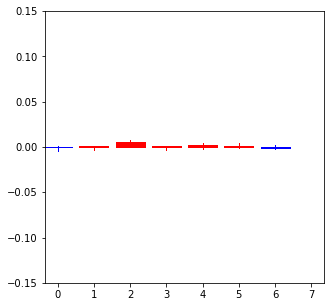

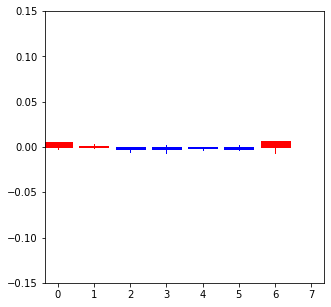

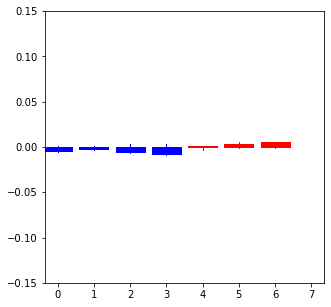

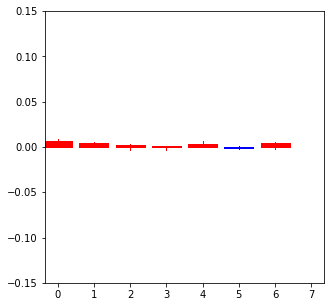

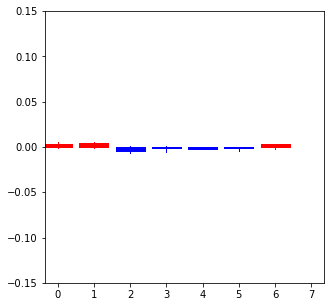

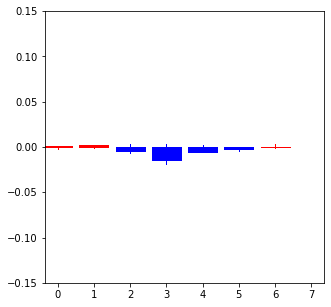

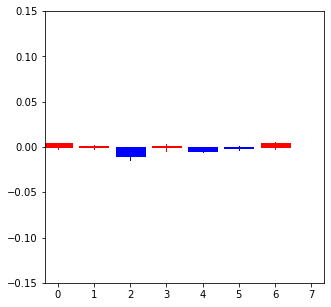

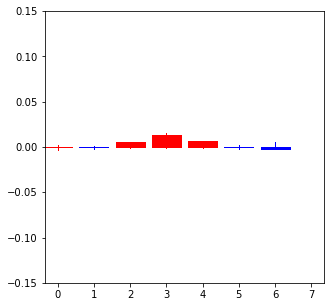

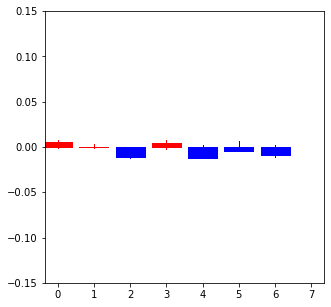

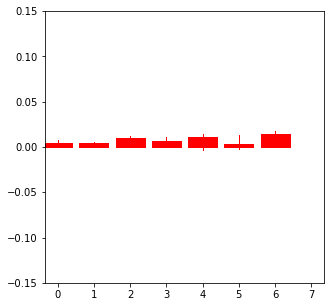

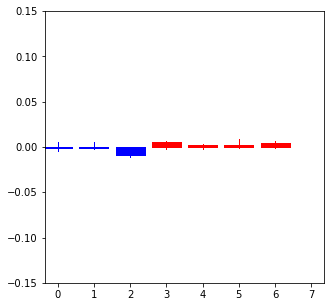

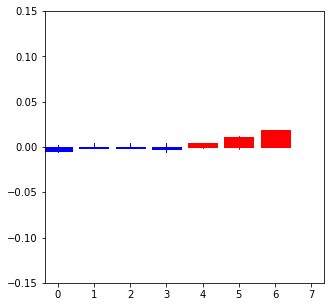

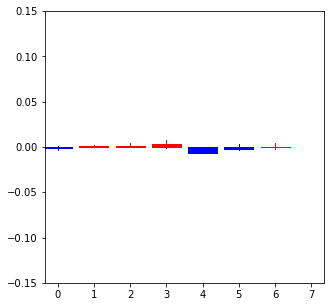

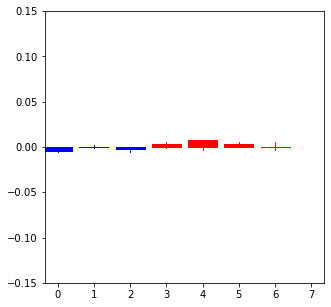

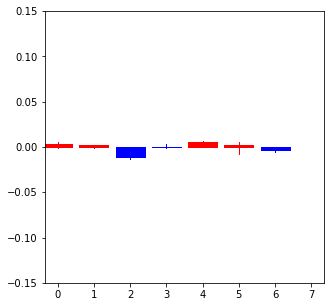

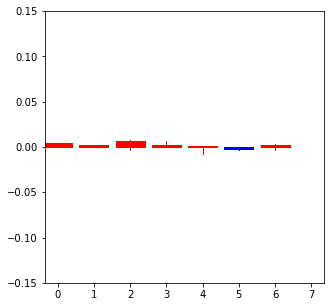

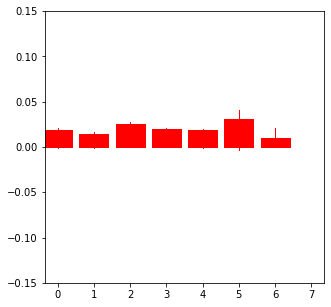

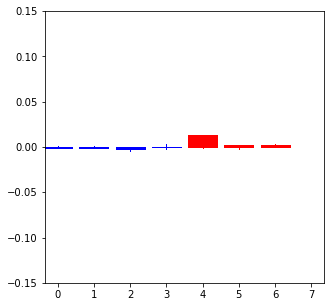

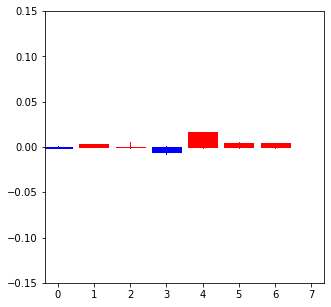

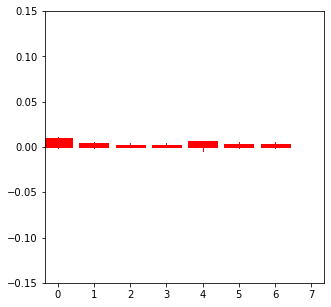

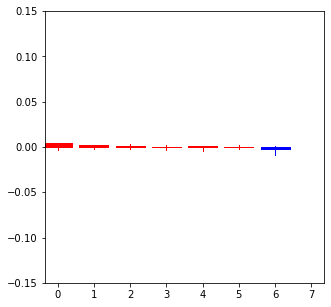

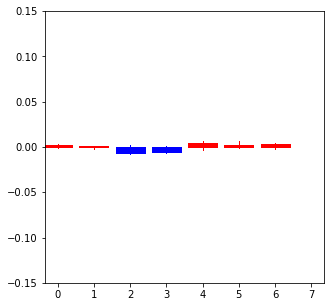

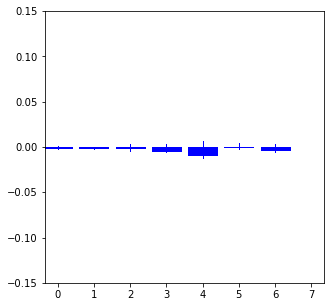

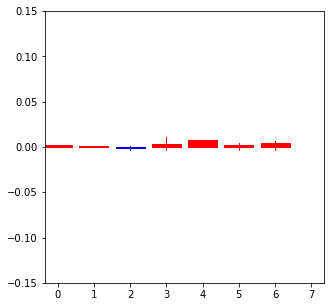

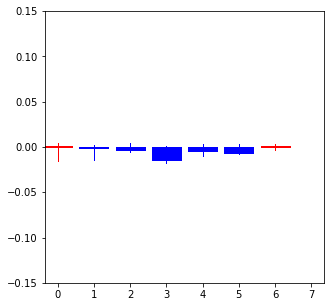

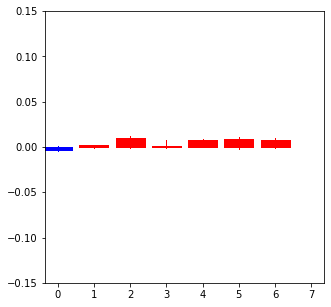

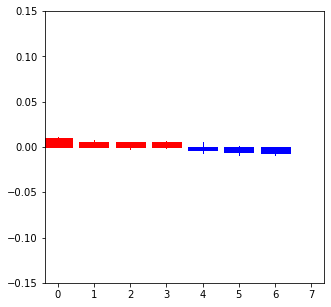

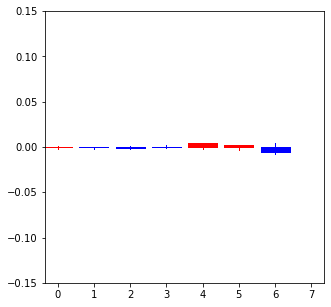

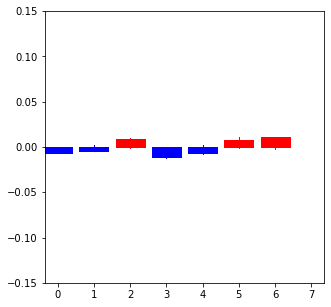

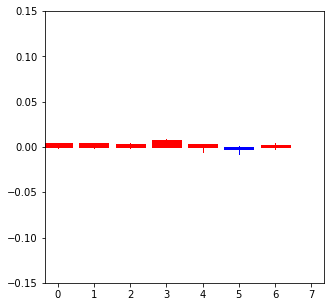

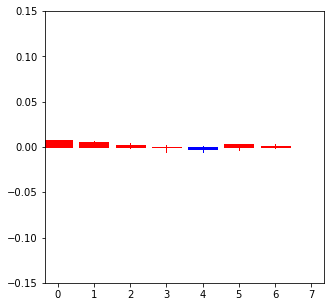

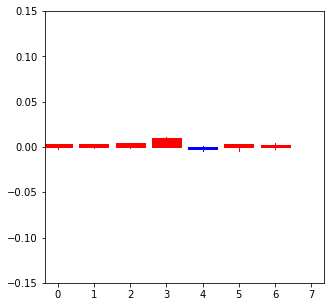

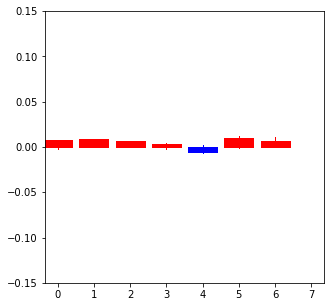

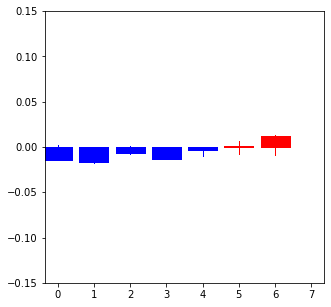

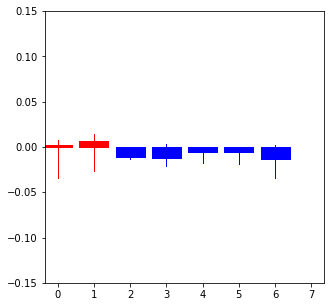

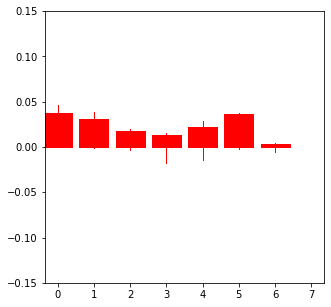

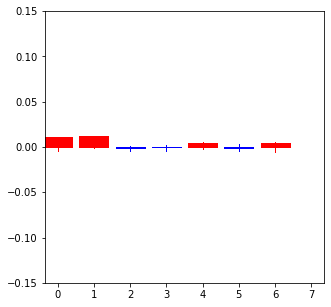

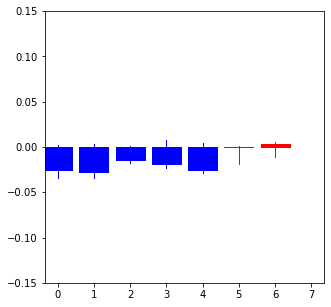

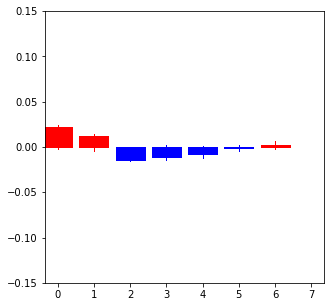

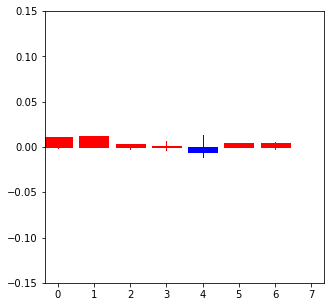

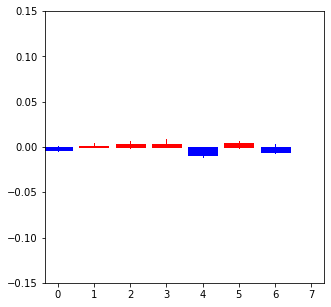

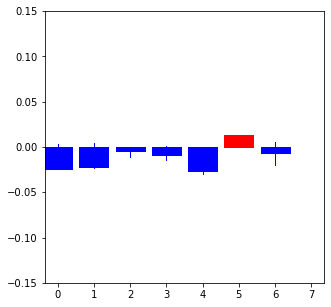

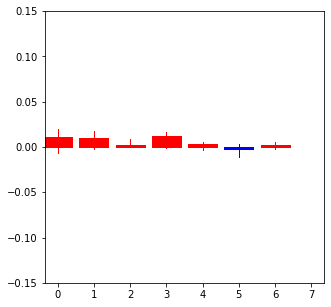

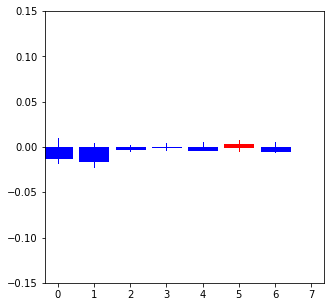

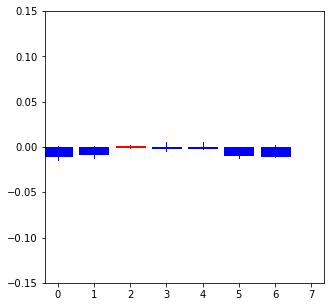

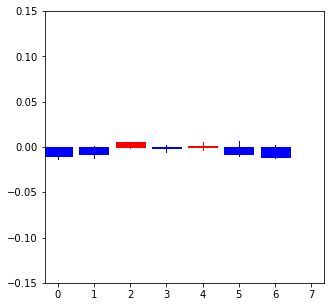

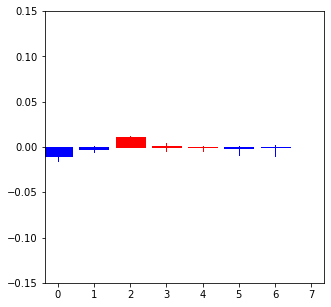

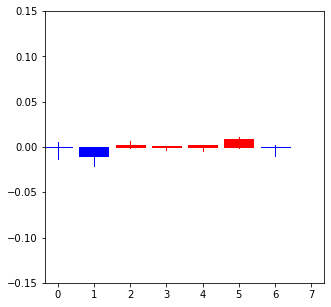

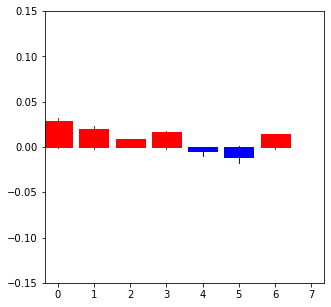

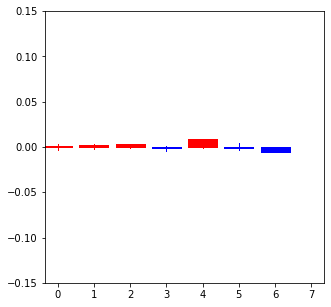

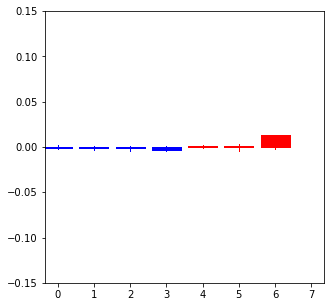

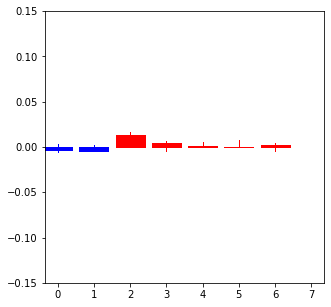

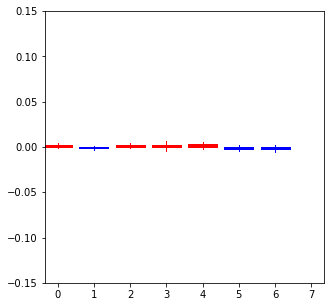

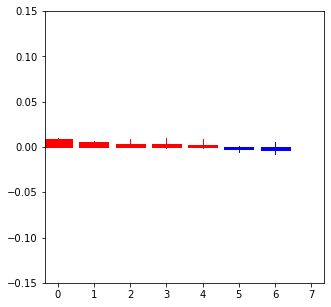

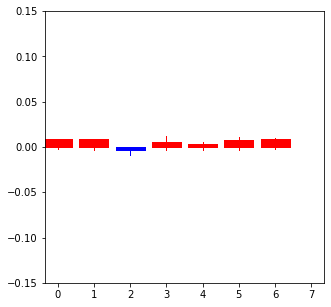

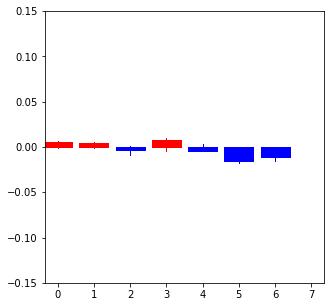

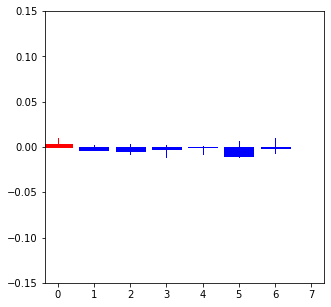

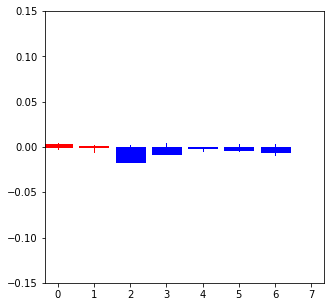

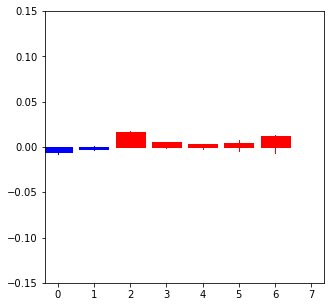

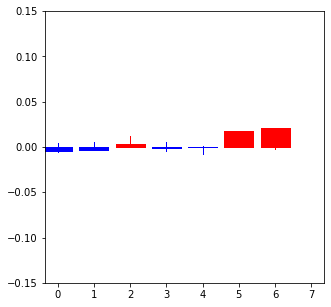

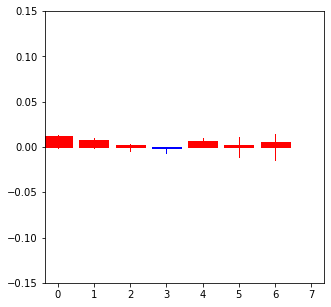

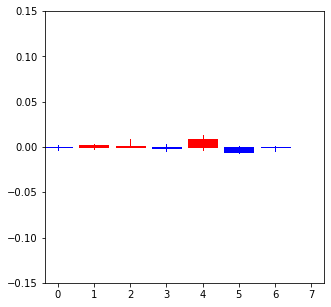

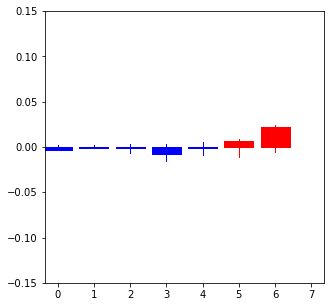

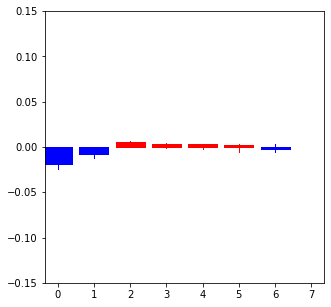

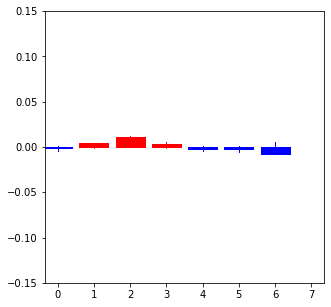

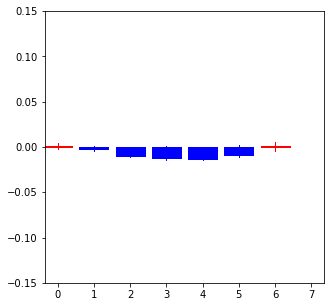

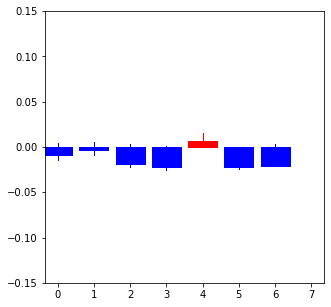

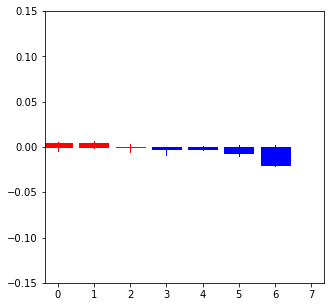

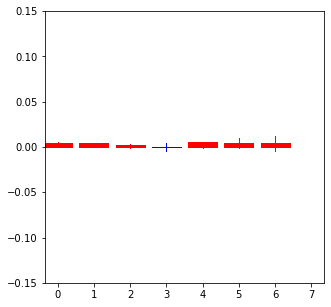

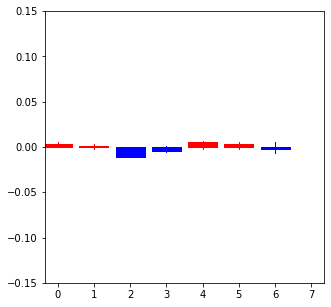

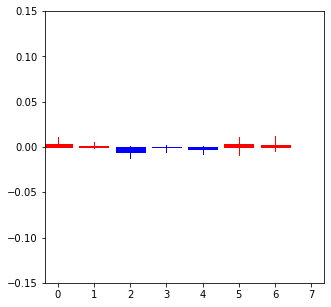

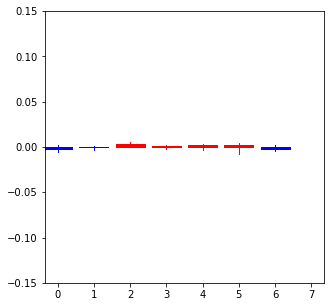

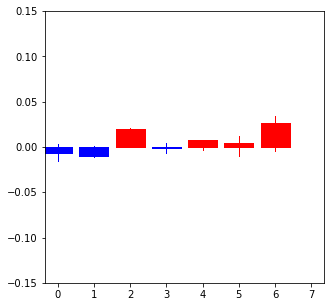

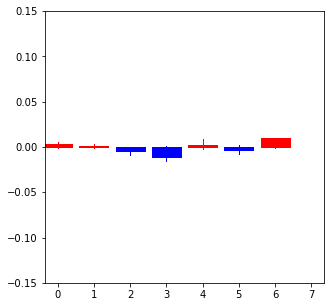

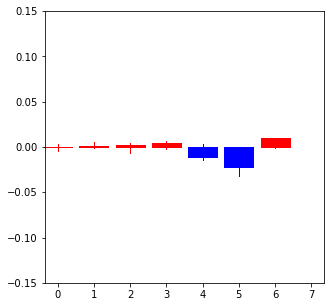

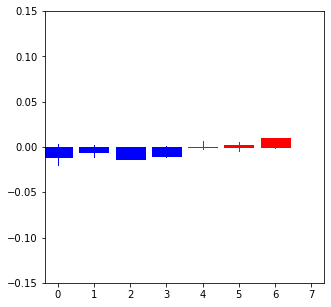

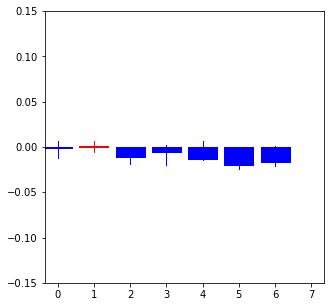

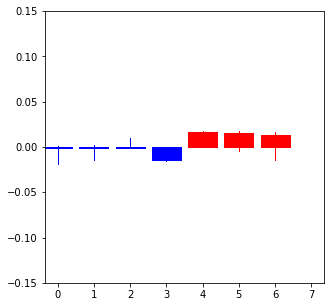

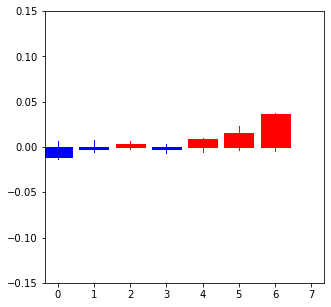

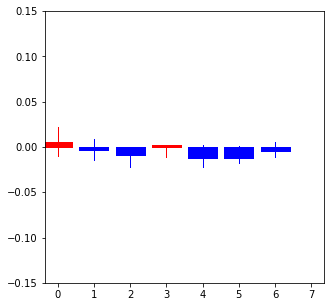

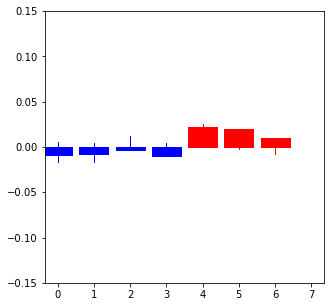

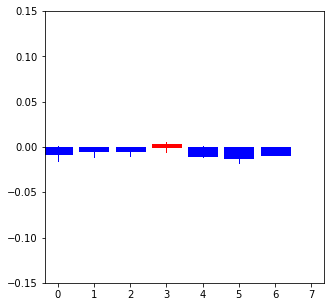

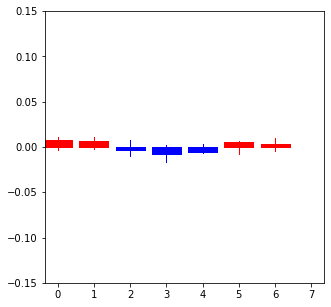

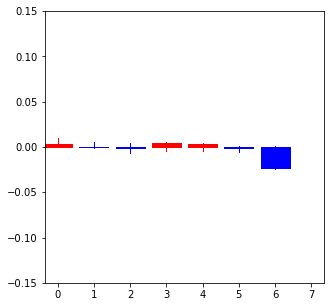

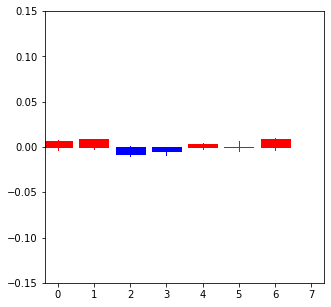

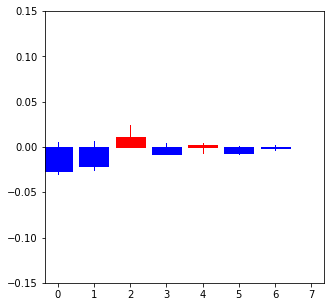

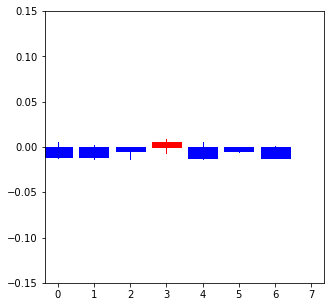

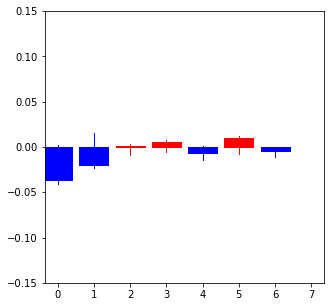

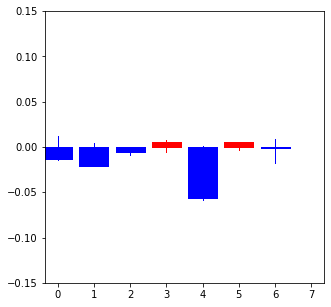

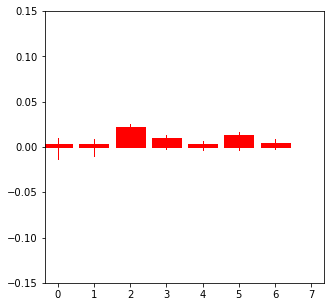

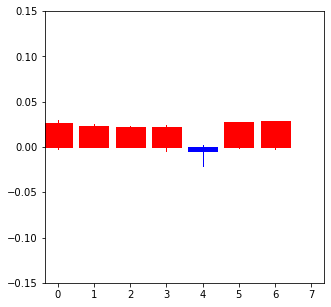

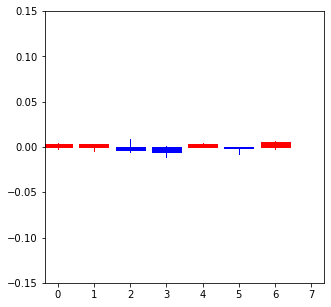

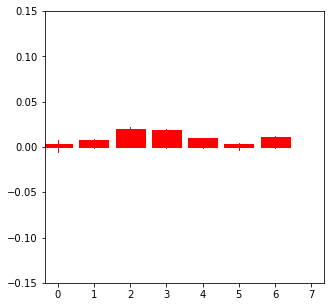

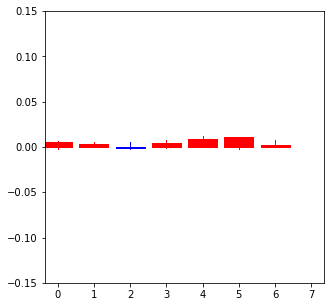

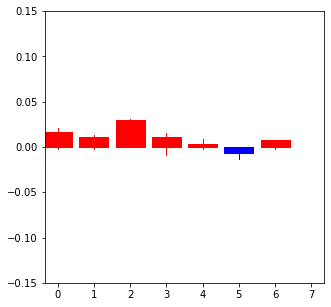

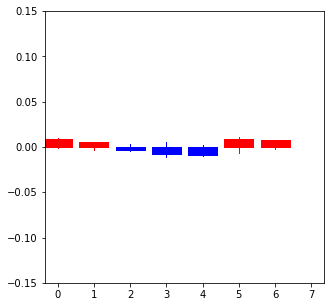

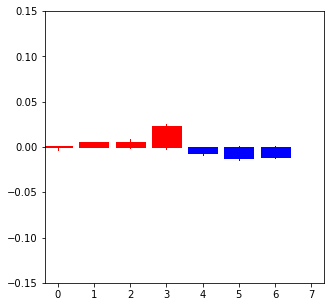

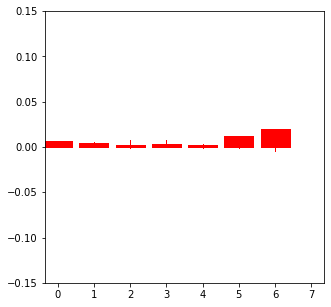

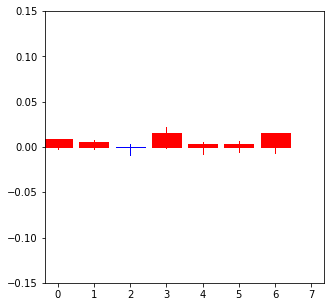

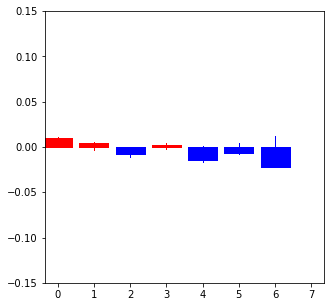

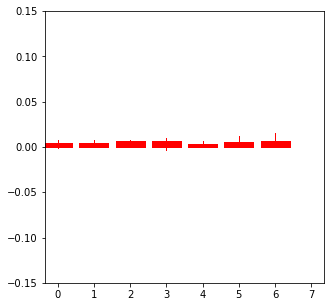

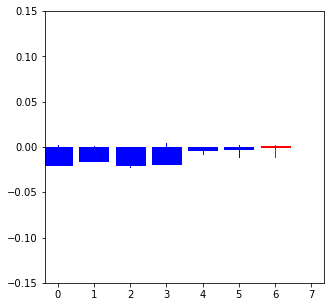

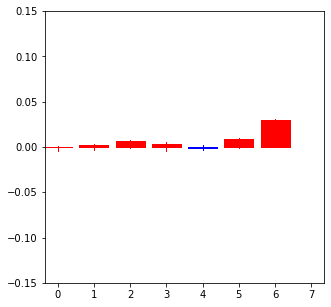

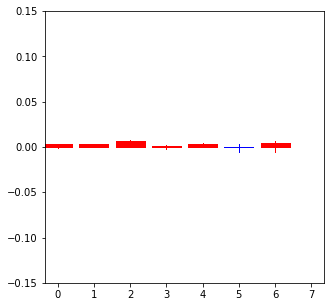

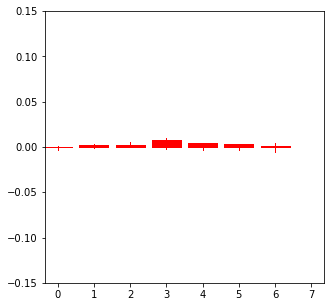

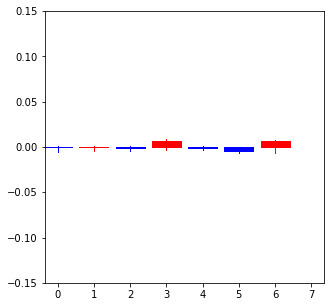

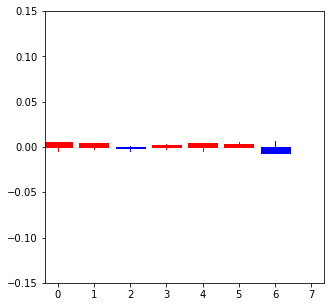

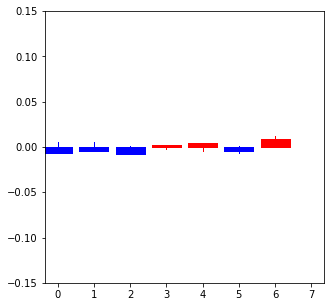

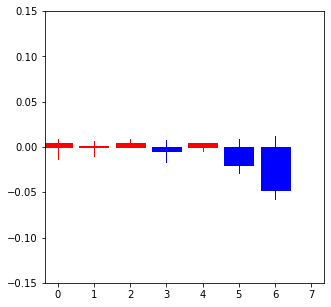

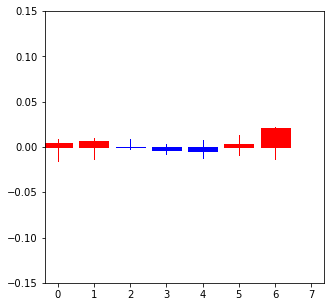

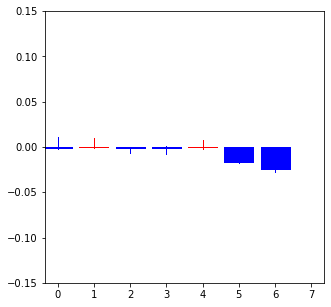

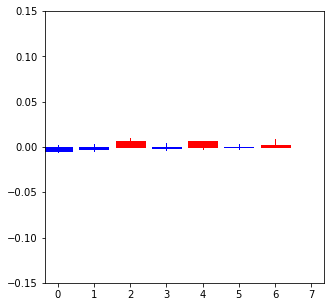

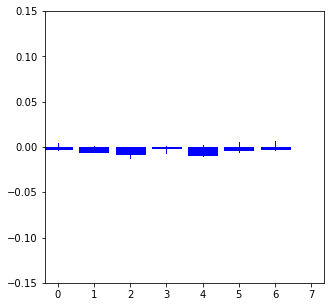

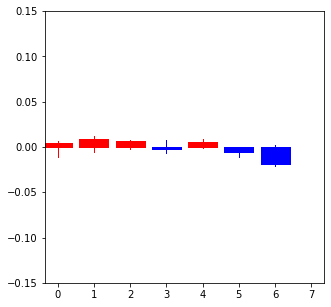

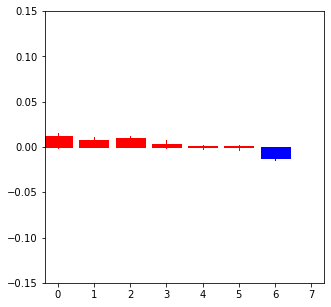

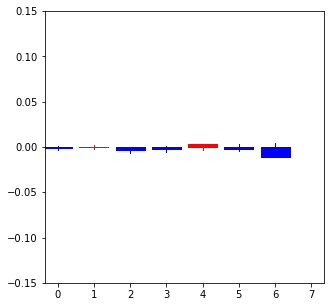

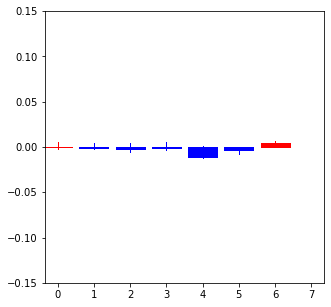

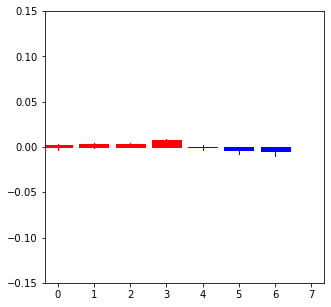

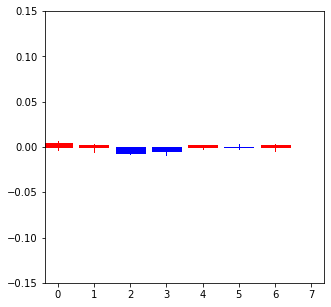

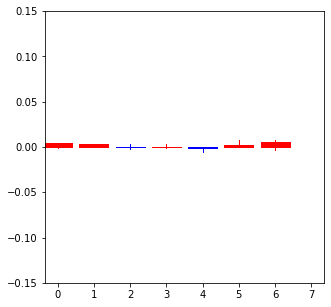

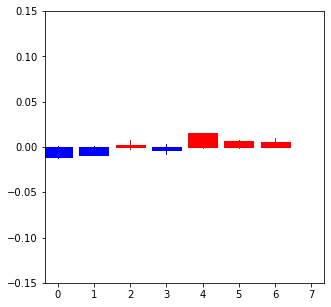

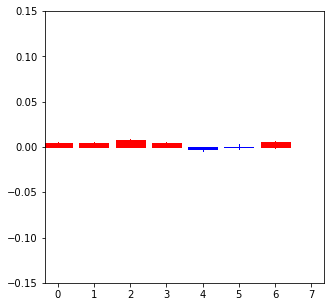

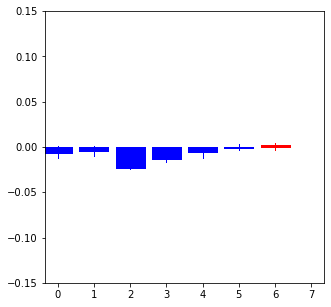

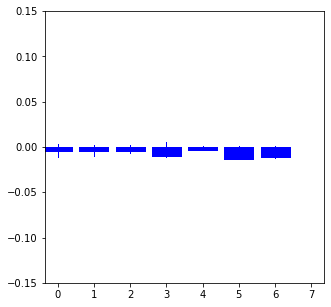

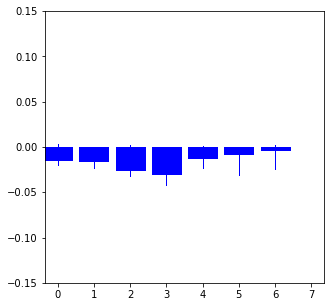

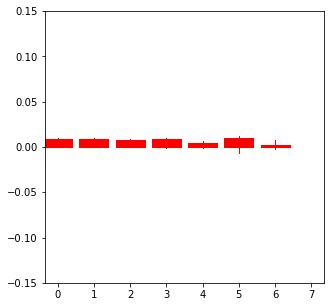

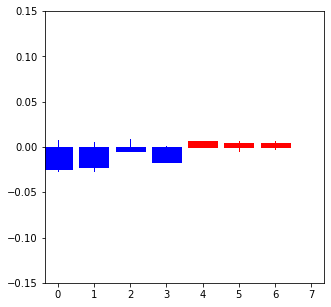

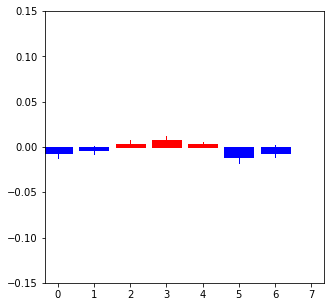

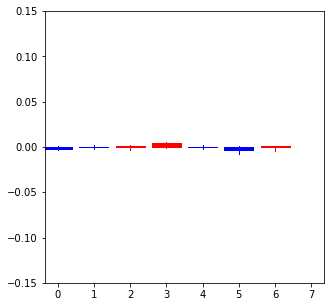

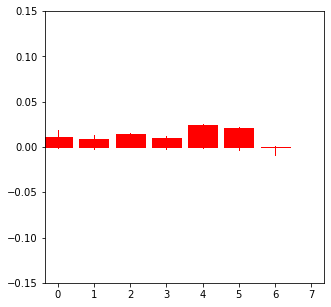

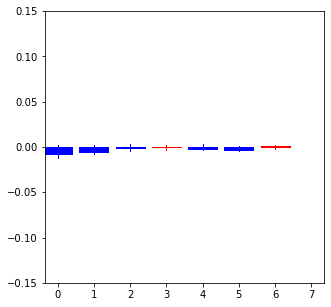

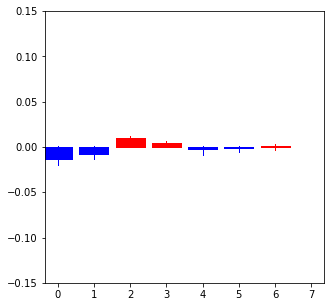

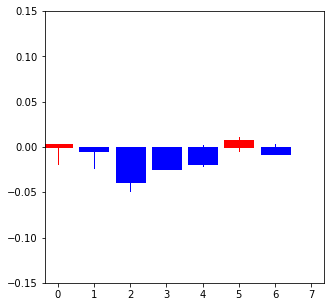

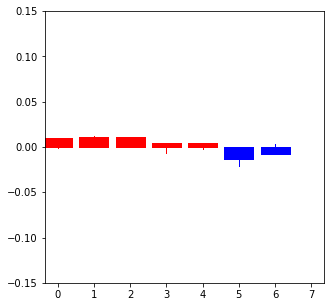

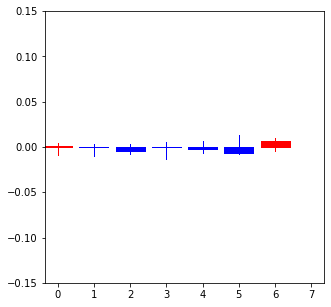

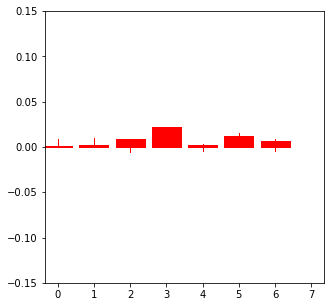

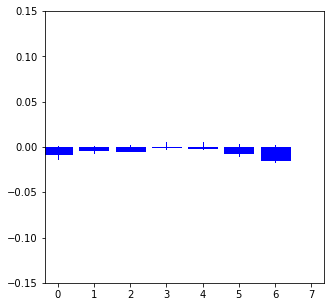

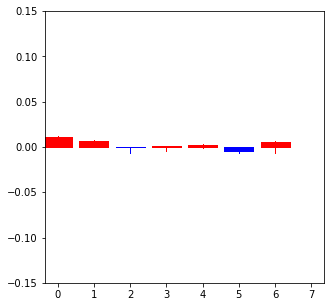

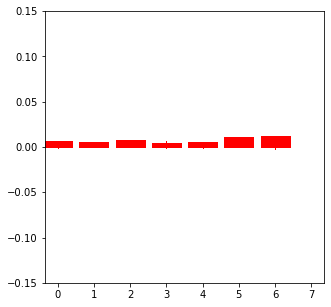

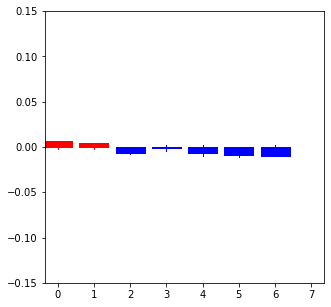

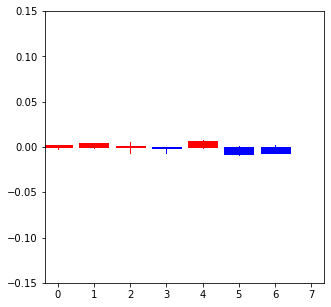

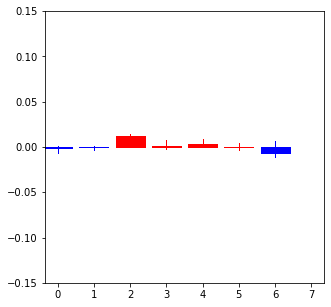

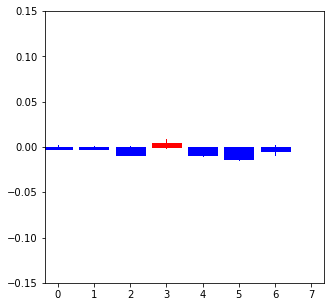

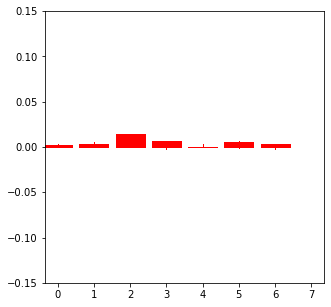

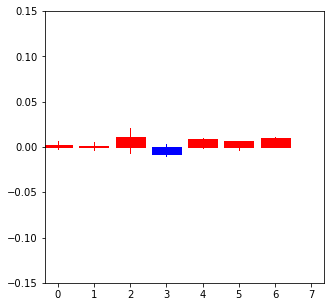

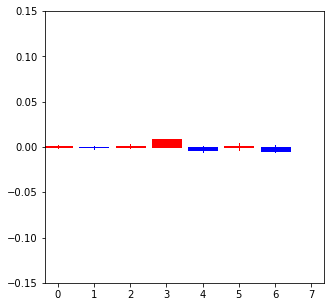

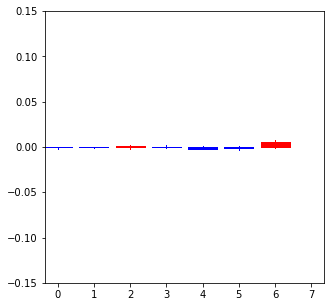

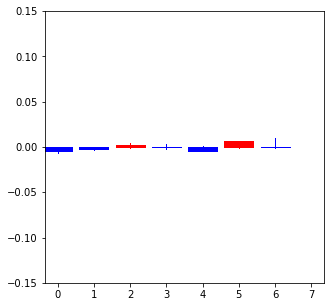

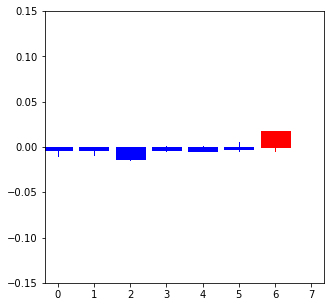

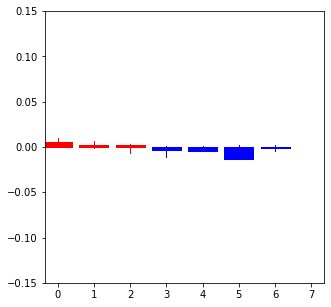

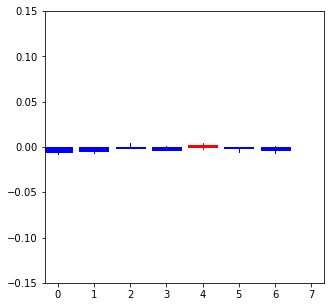

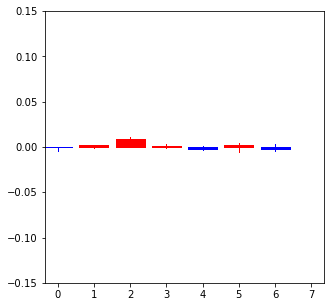

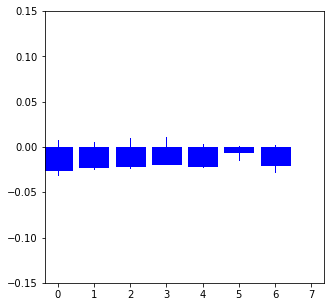

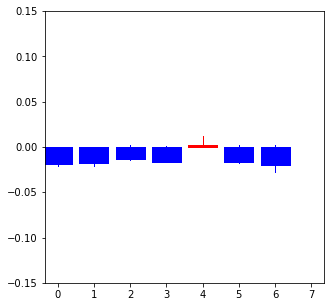

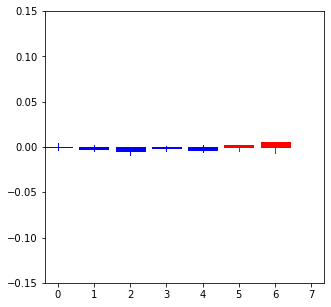

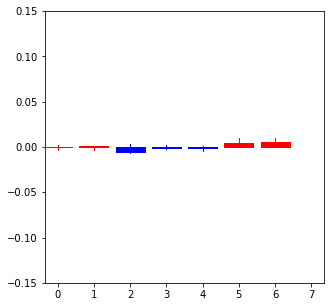

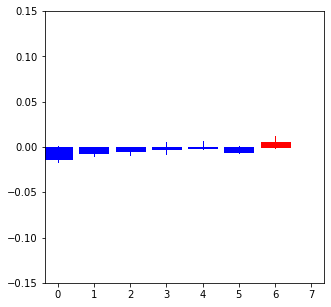

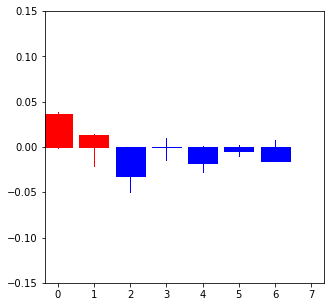

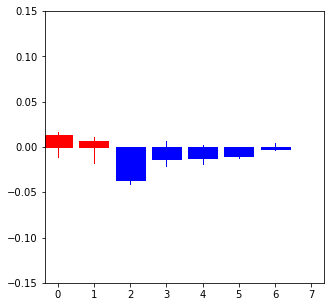

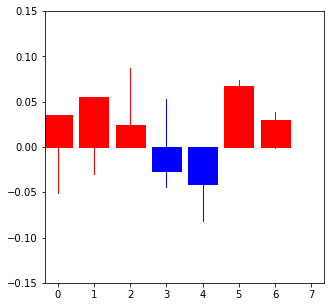

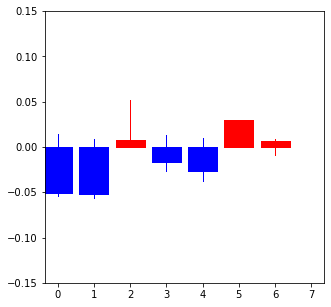

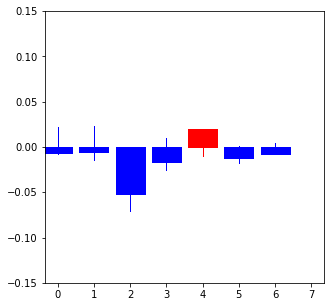

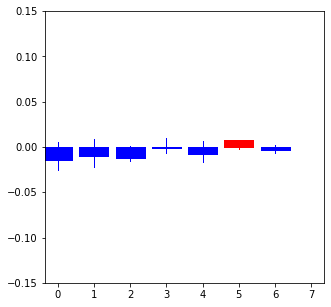

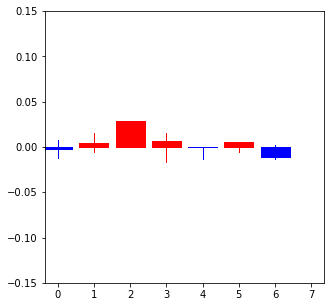

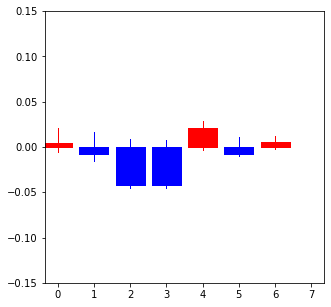

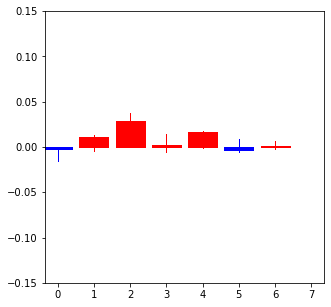

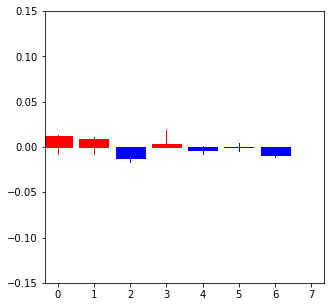

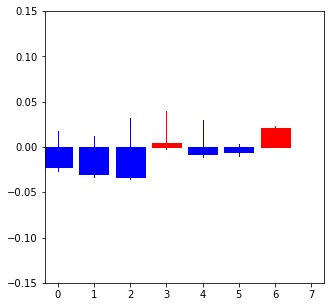

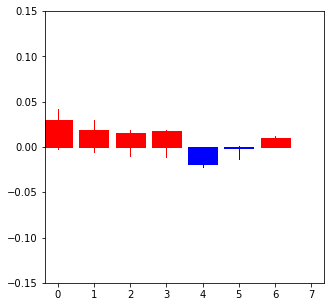

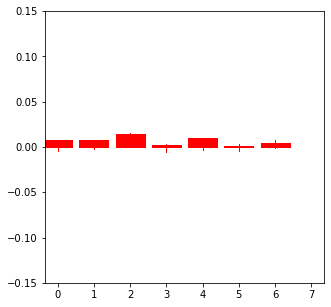

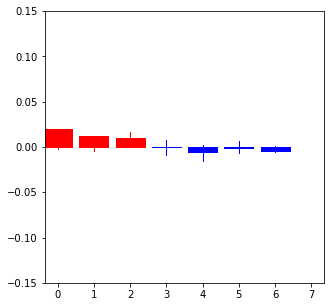

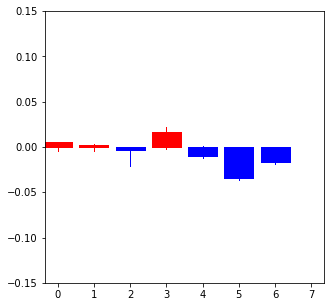

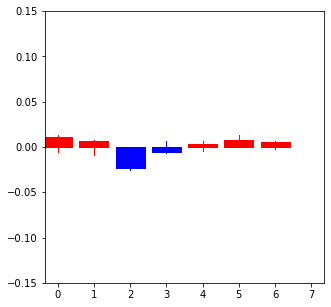

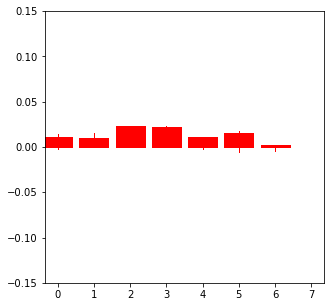

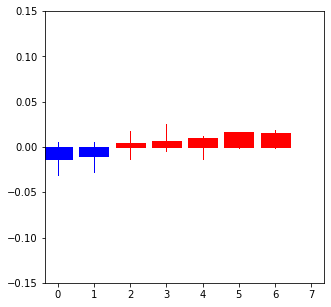

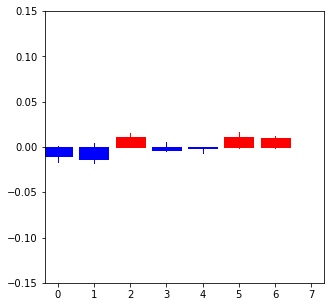

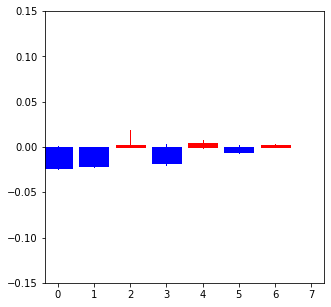

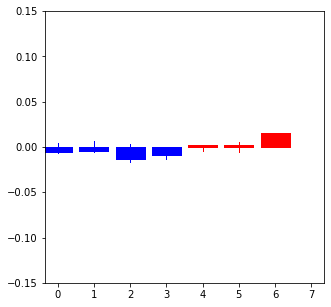

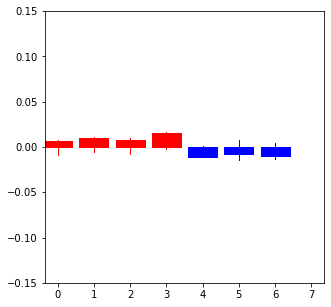

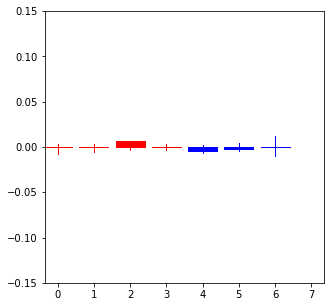

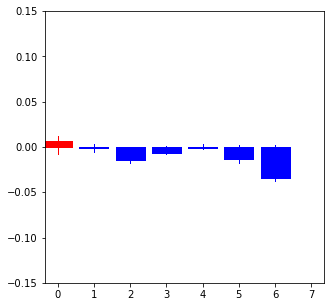

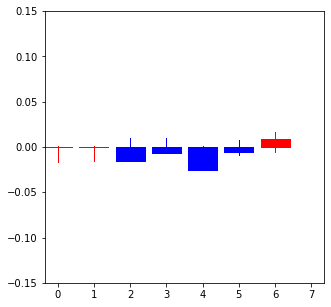

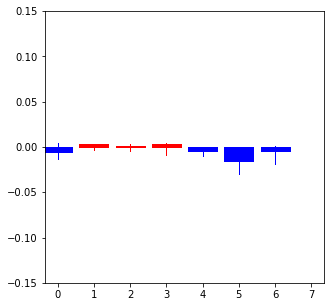

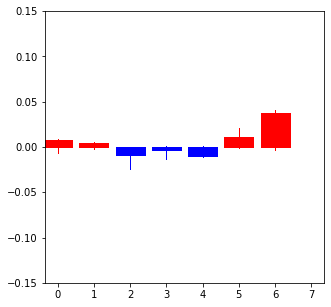

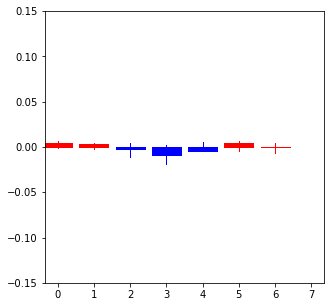

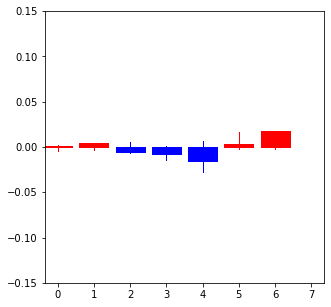

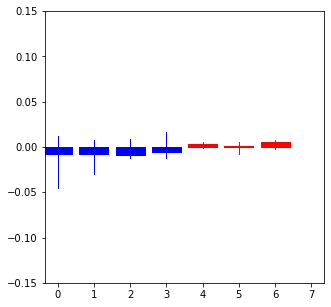

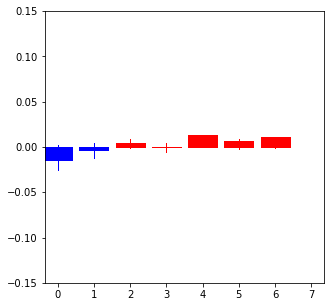

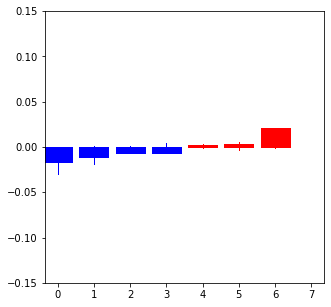

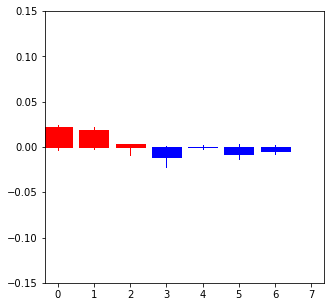

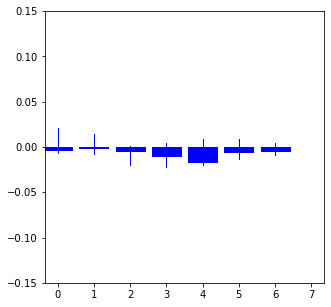

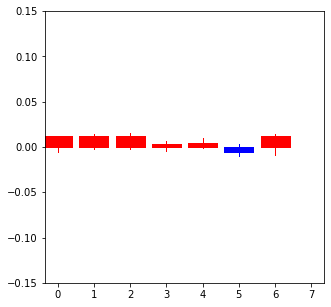

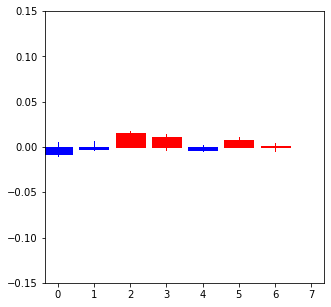

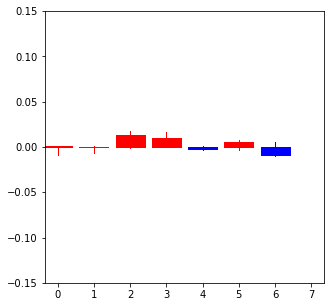

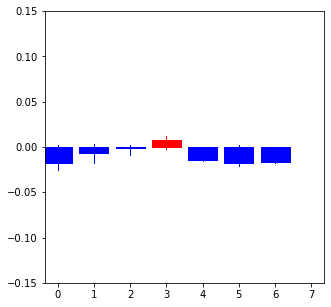

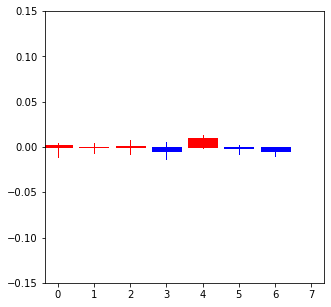

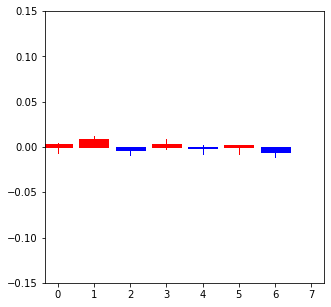

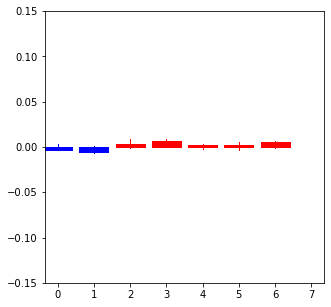

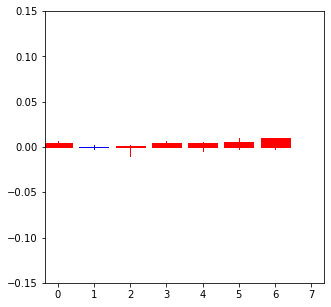

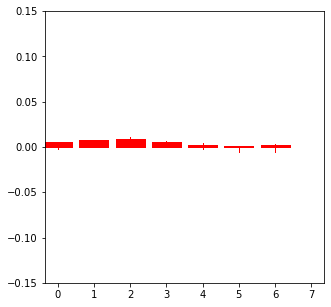

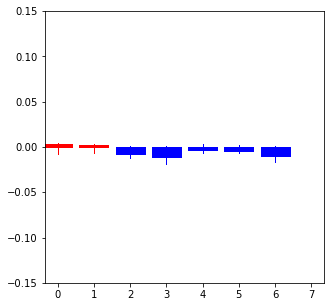

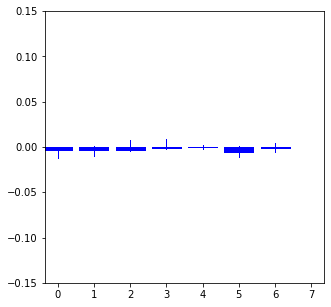

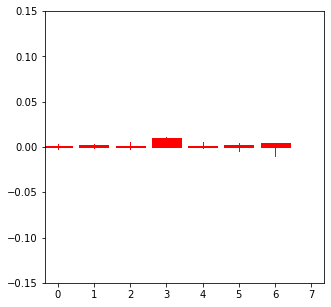

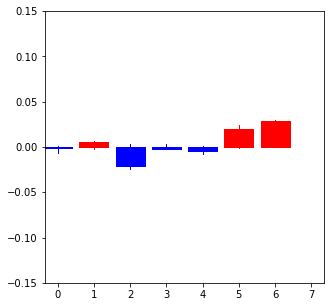

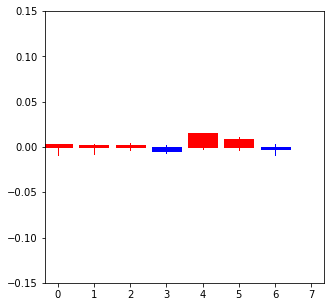

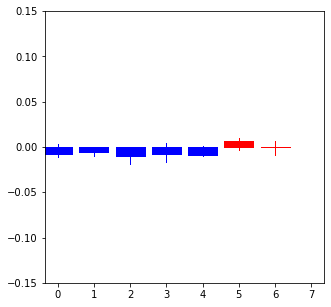

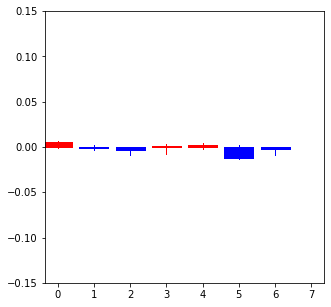

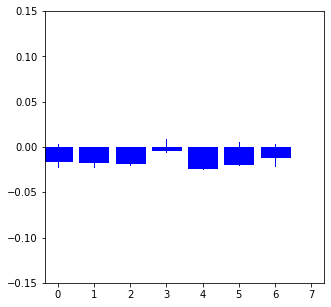

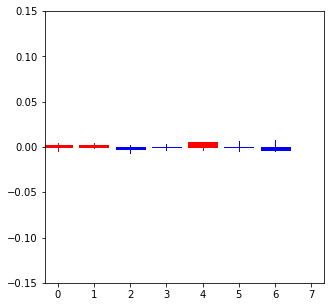

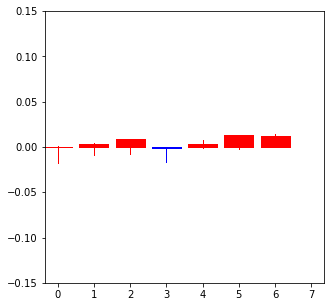

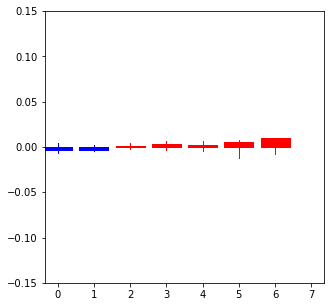

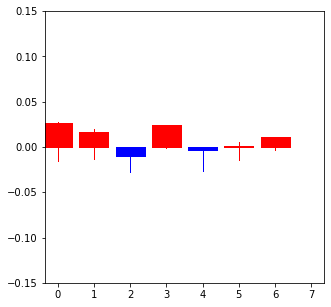

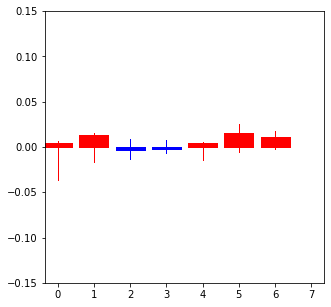

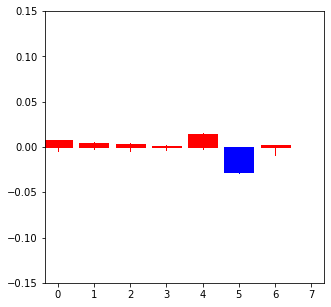

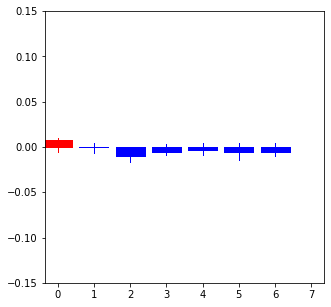

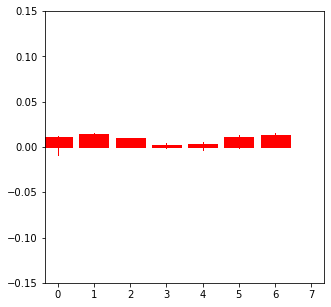

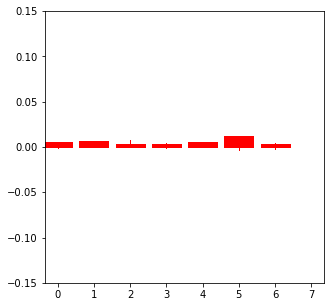

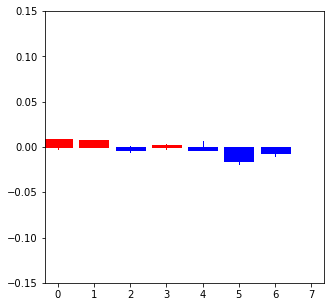

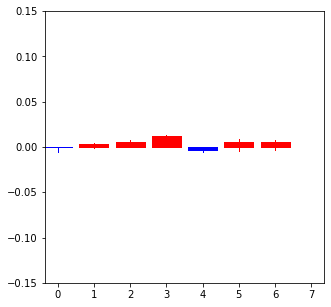

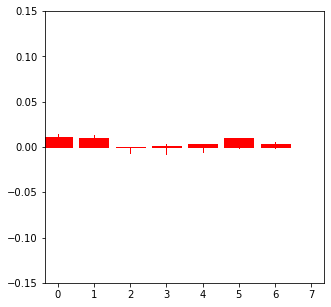

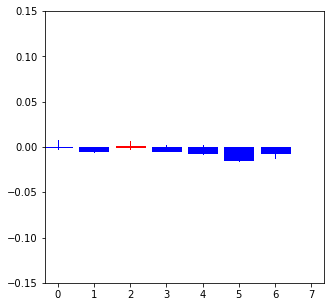

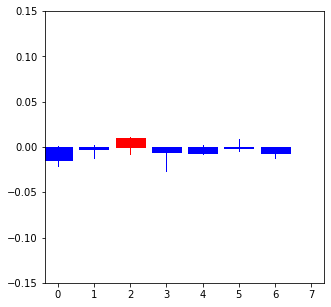

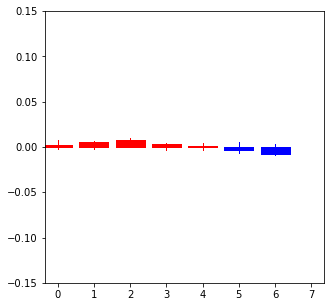

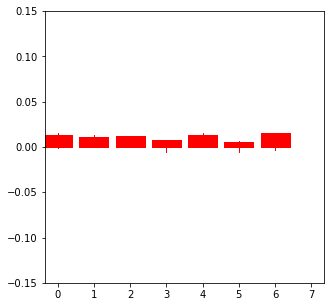

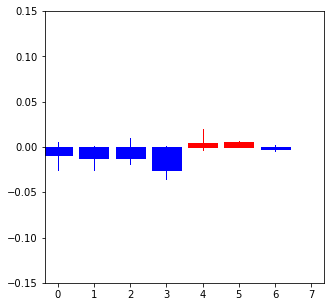

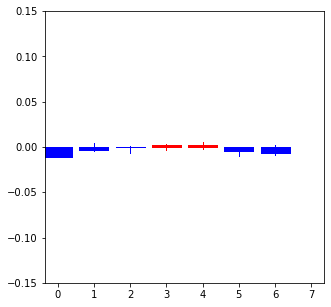

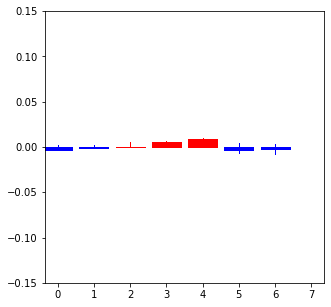

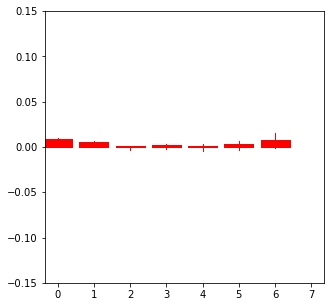

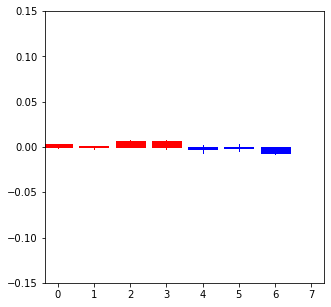

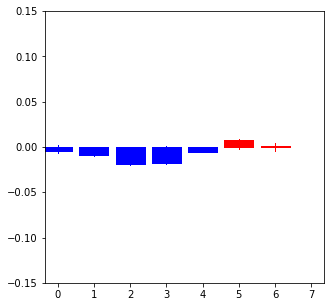

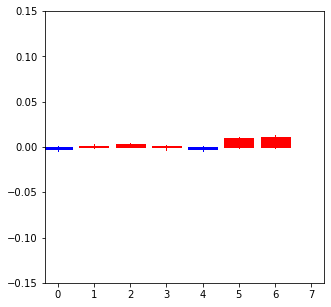

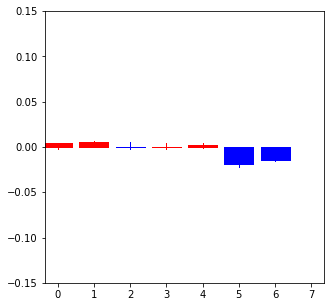

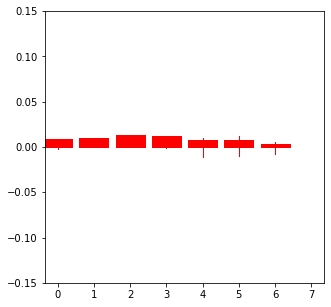

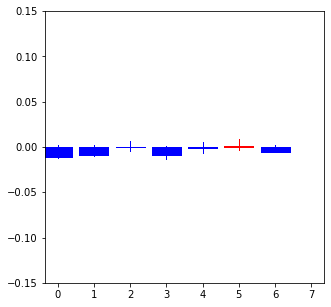

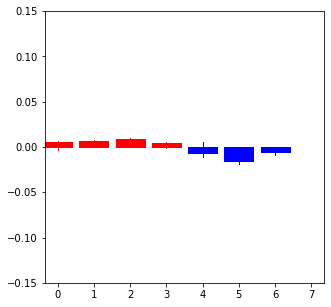

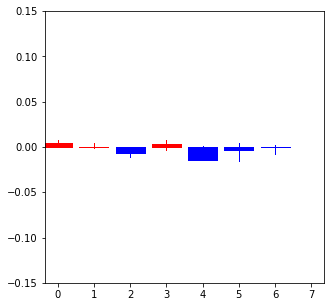

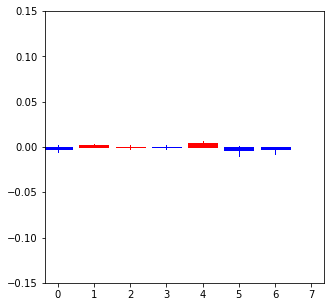

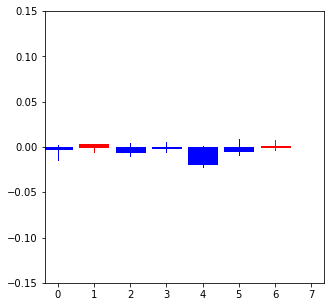

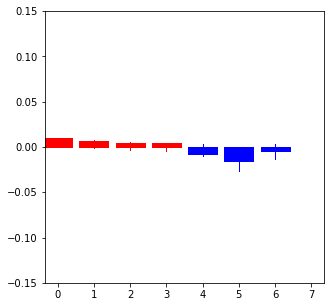

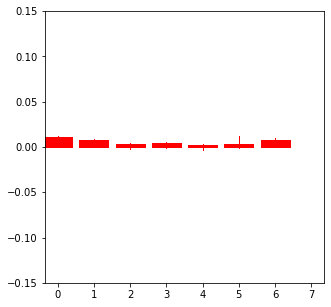

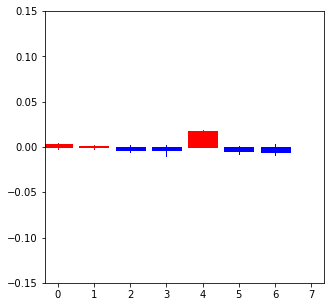

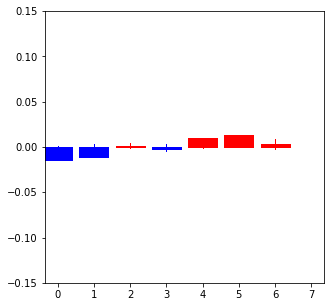

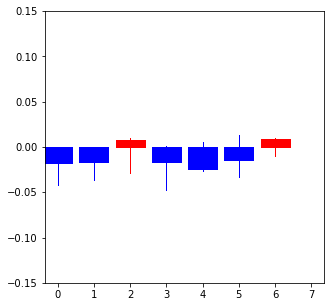

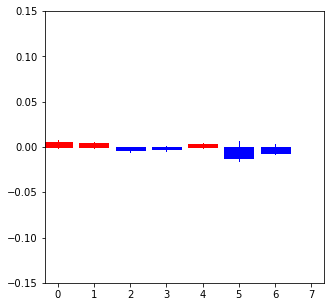

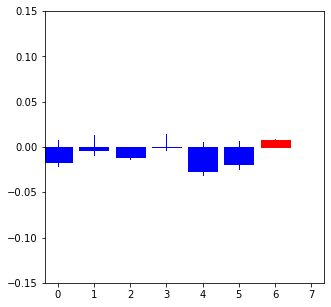

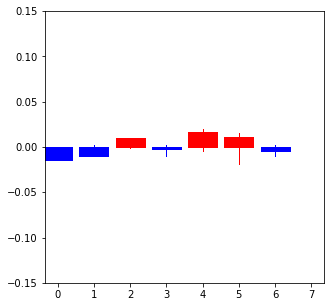

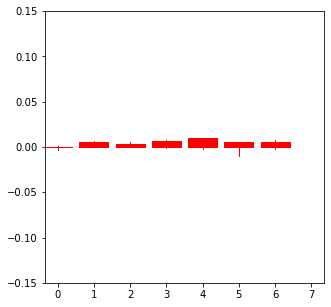

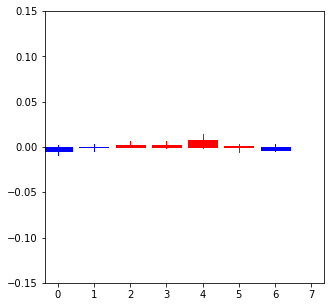

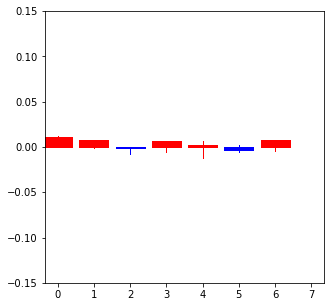

In [27]:
for idx in range(len(holiday_list)):
    oopen = open_df.loc[holiday_list[idx][0]-one_day]
    cclose = close_df.loc[holiday_list[idx][1]]
    hhigh = high_df.loc[holiday_list[idx][0] - one_day : holiday_list[idx][1]].max()
    llow = low_df.loc[holiday_list[idx][0] - one_day : holiday_list[idx][1]].min()

    temp_df = pd.concat([oopen, cclose, hhigh, llow], axis = 1)
    temp_df.columns = ['Open', 'Close', 'High', 'Low']

    temp_df.loc['NASDAQ'] = (temp_df.loc['NASDAQ'] - temp_df.loc['NASDAQ']['Open']) / temp_df.loc['NASDAQ']['Open']
    temp_df.loc['S&P500'] = (temp_df.loc['S&P500'] - temp_df.loc['S&P500']['Open']) / temp_df.loc['S&P500']['Open']
    temp_df.loc['FTSE'] = (temp_df.loc['FTSE'] - temp_df.loc['FTSE']['Open']) / temp_df.loc['FTSE']['Open']
    temp_df.loc['DAX'] = (temp_df.loc['DAX'] - temp_df.loc['DAX']['Open']) / temp_df.loc['DAX']['Open']
    temp_df.loc['NIKKEI'] = (temp_df.loc['NIKKEI'] - temp_df.loc['NIKKEI']['Open']) / temp_df.loc['NIKKEI']['Open']
    temp_df.loc['HANGSENG'] = (temp_df.loc['HANGSENG']- temp_df.loc['HANGSENG']['Open']) / temp_df.loc['HANGSENG']['Open']
    temp_df.loc['SANGHAI'] = (temp_df.loc['SANGHAI'] - temp_df.loc['SANGHAI']['Open']) / temp_df.loc['SANGHAI']['Open']

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.set_ylim(-0.15,0.15)
#     ax.set_xticklabels(['', 'NASDAQ', 'S&P500', 'FTSE', 'DAX', 'NIKKEI', 'HANGSENG', 'SANGHAI'])
    mpl_finance.candlestick2_ochl(ax, temp_df['Open'],
                                  temp_df['Close'],
                                  temp_df['High'],
                                  temp_df['Low'],
                                  width=0.8,
                                  alpha=None,
                                  colorup='r', colordown='b')
    plt.savefig(f'/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/pic_data/{idx}.png')
#     plt.show()
#     break